## Molecular Connectome Assembly

This notebook demonstrates how to assemble molecular connectomes by combining:
- **Release data**: Which neurons release a neurotransmitter/neuropeptide
- **Receptor data**: Which neurons express receptors for that molecule
- **Pairing info**: Which receptor-ligand pairs are valid

### Assembly Logic
```
Connectome[source, target] = Release[source, molecule] AND Receptor[target, receptor]
where (molecule, receptor) is a valid pair from pairing_info
```

In [1]:
import pub_utils as pu
import pandas as pd
import numpy as np
import json
from datetime import datetime
import getpass
username = getpass.getuser()
print(f'You are using this assembly pipeline as {username}')

You are using this assembly pipeline as candy


## 1. Neurotransmitter (NT) Connectome Assembly

### Available Data Sources

**Release sources** (format: `method:dataset`):
- `literature:Bentley2016` - Monoamine markers (cat-2, tdc-1, tbh-1, tph-1, etc.)
- `reporter:Wang2024` - Fluorescent reporter data
- `staining:Wang2024` - Antibody staining data

**Receptor sources**:
- `sequencing:Fenyves2020` - ACh, GABA, Glutamate ionotropic receptors
- `reporter:HobertLab` - ACh metabotropic, GABA receptors  
- `reporter:Muralidhara2025` - Dopamine receptors
- `literature:Bentley2016` - All monoamine receptors
- `reporter:Dag2023` - Serotonin receptors

Release sites: ['CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'ADEL', 'ADER', 'PDEL', 'PDER']
Saved metadata to ../connectomes/candy_assembly/dopamine_01_metadata.json


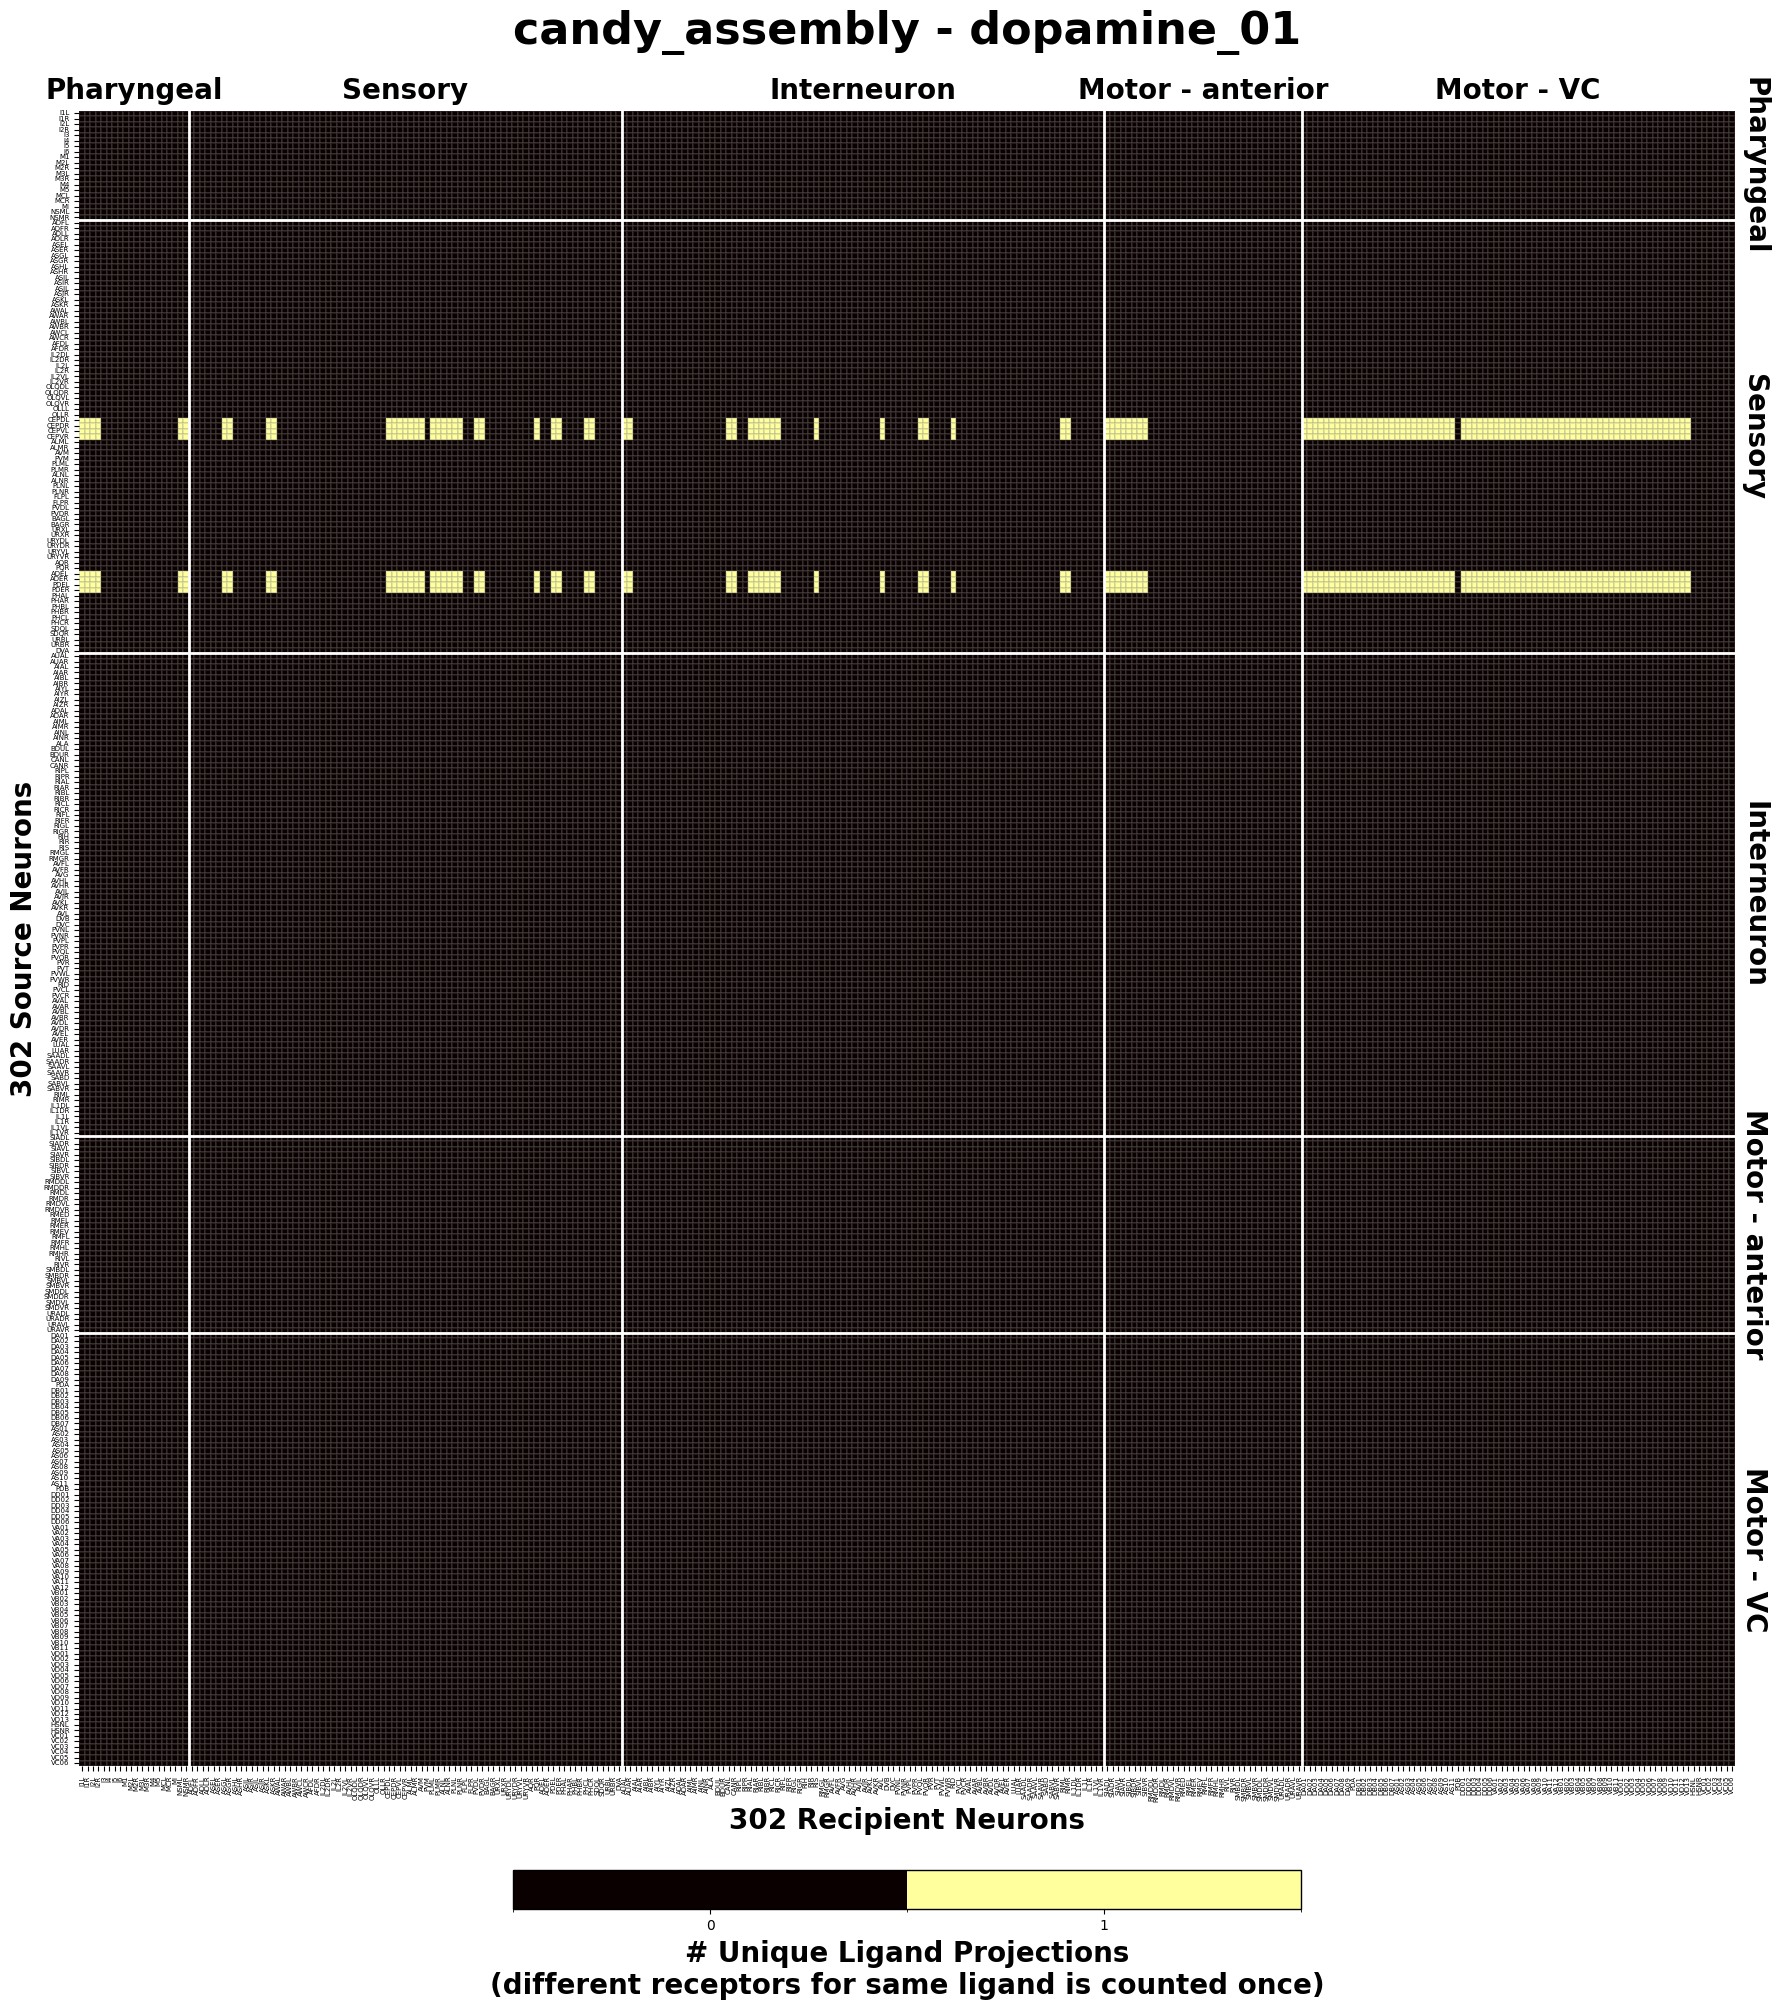

Saved custom connectome to ../connectomes/candy_assembly/dopamine_01_binary.csv


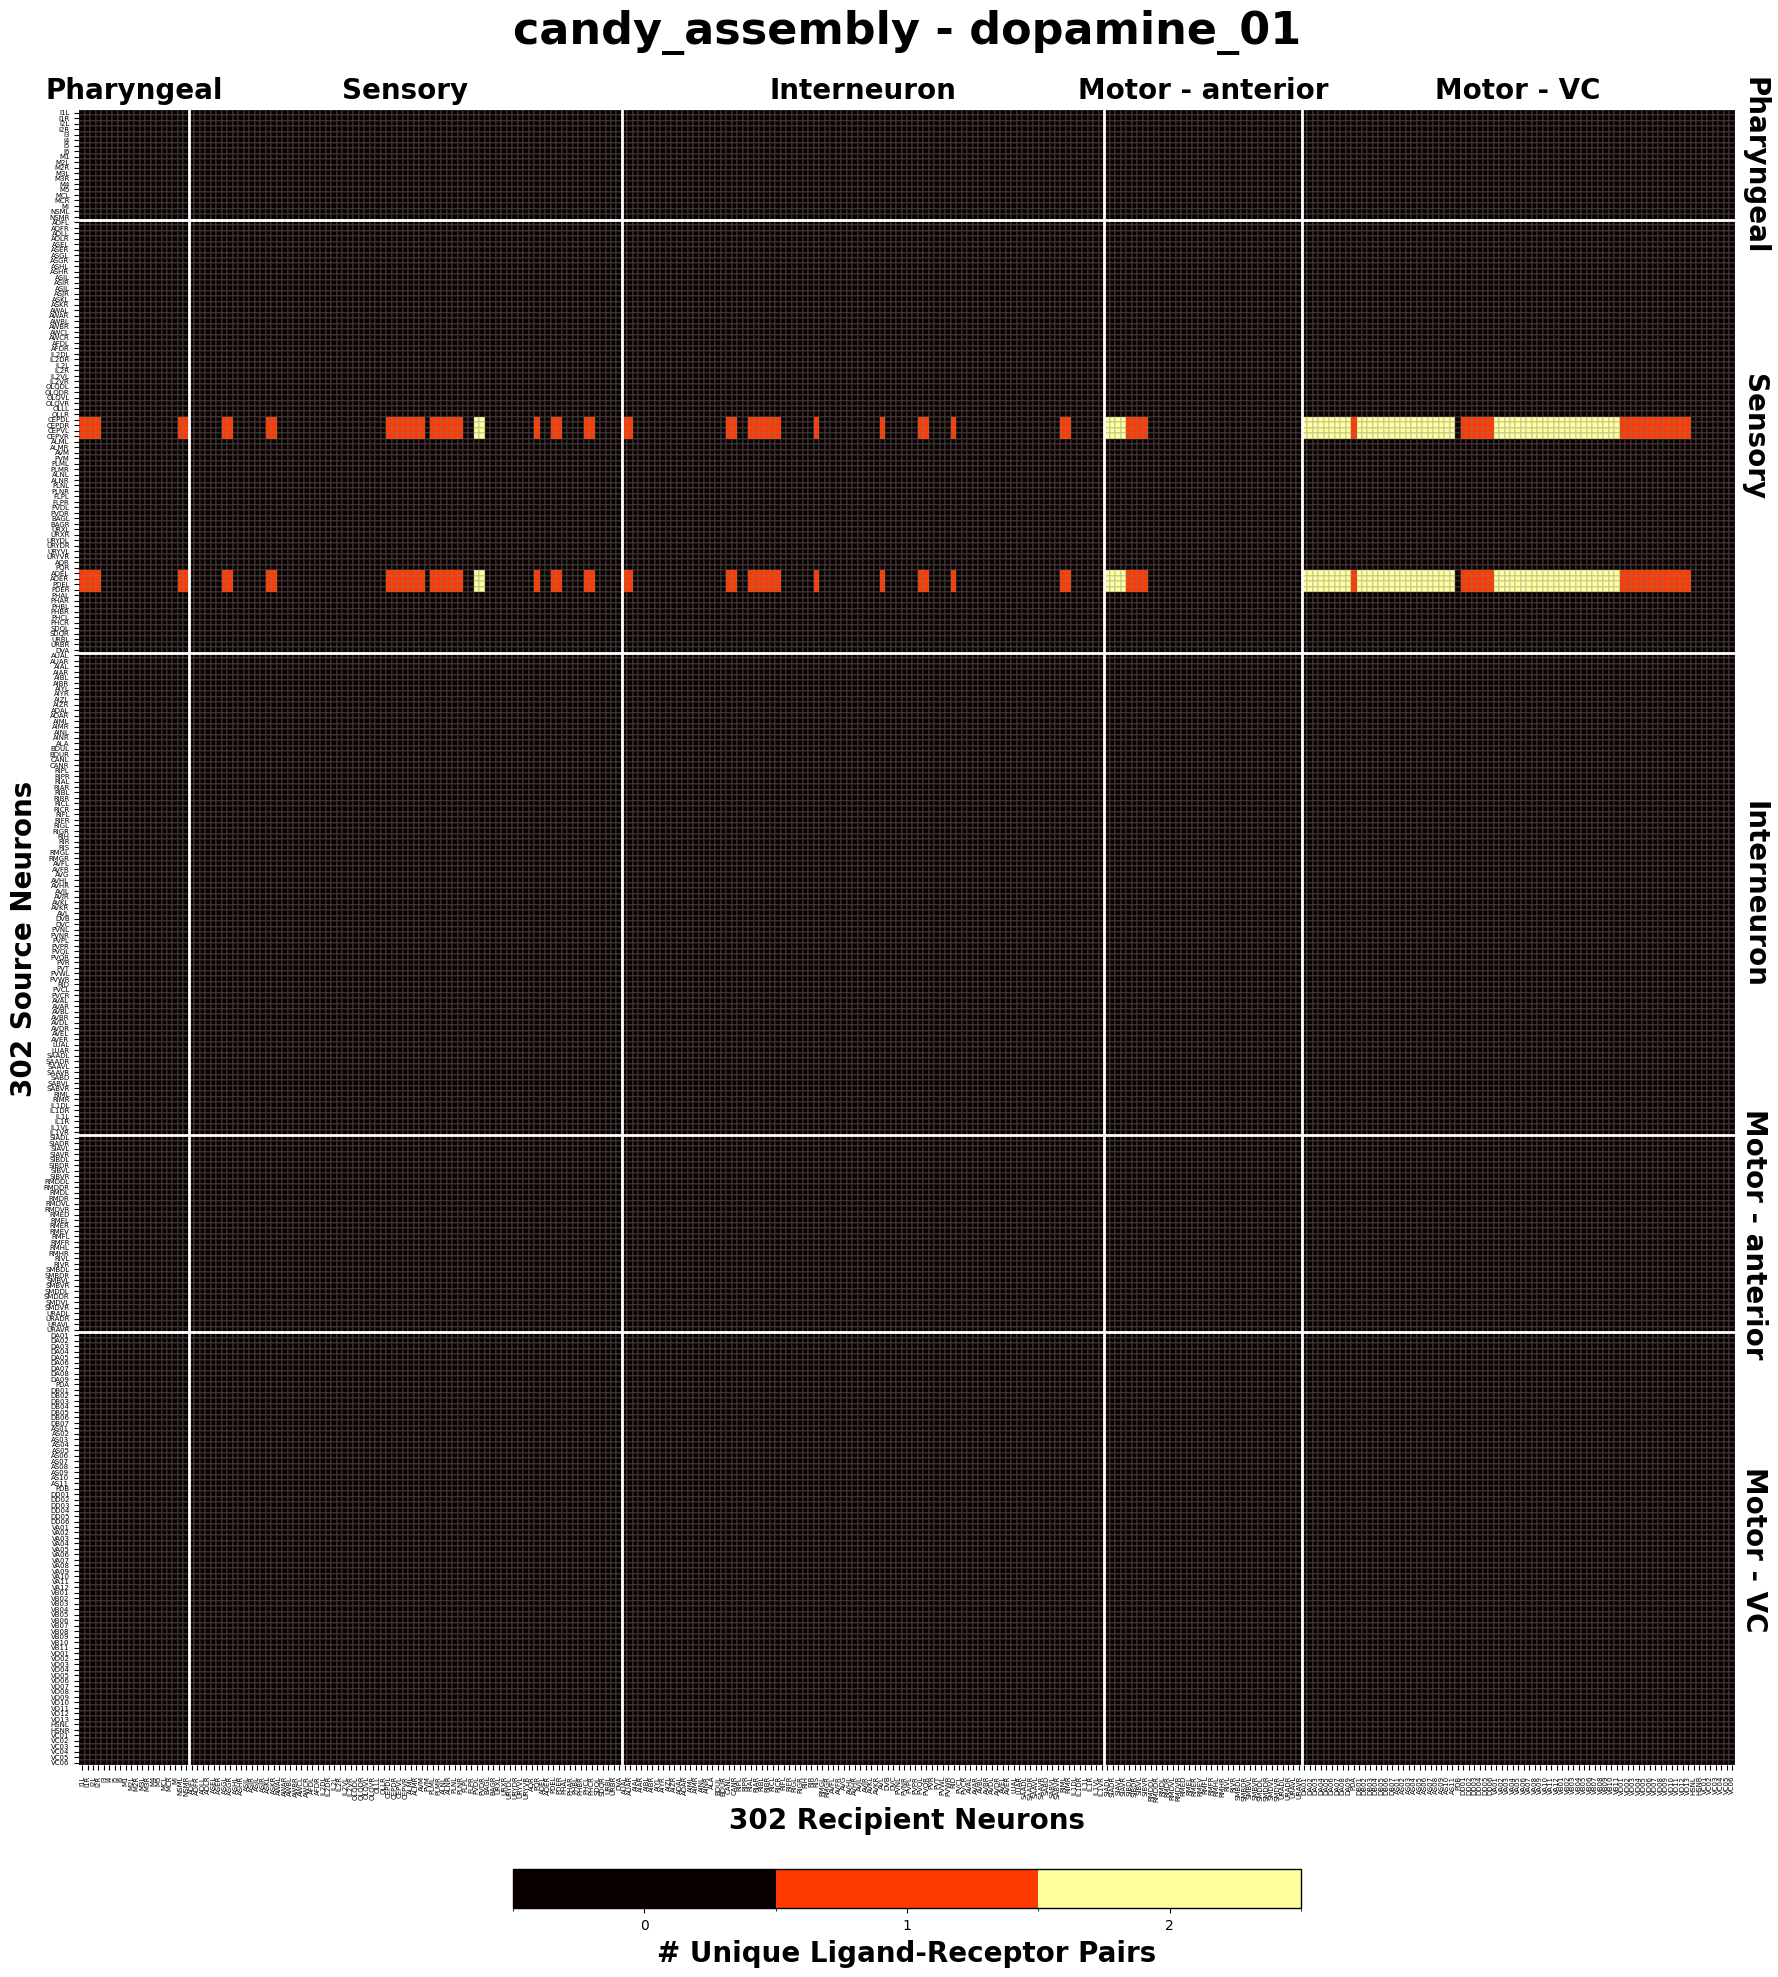

Saved custom connectome to ../connectomes/candy_assembly/dopamine_01_count.csv


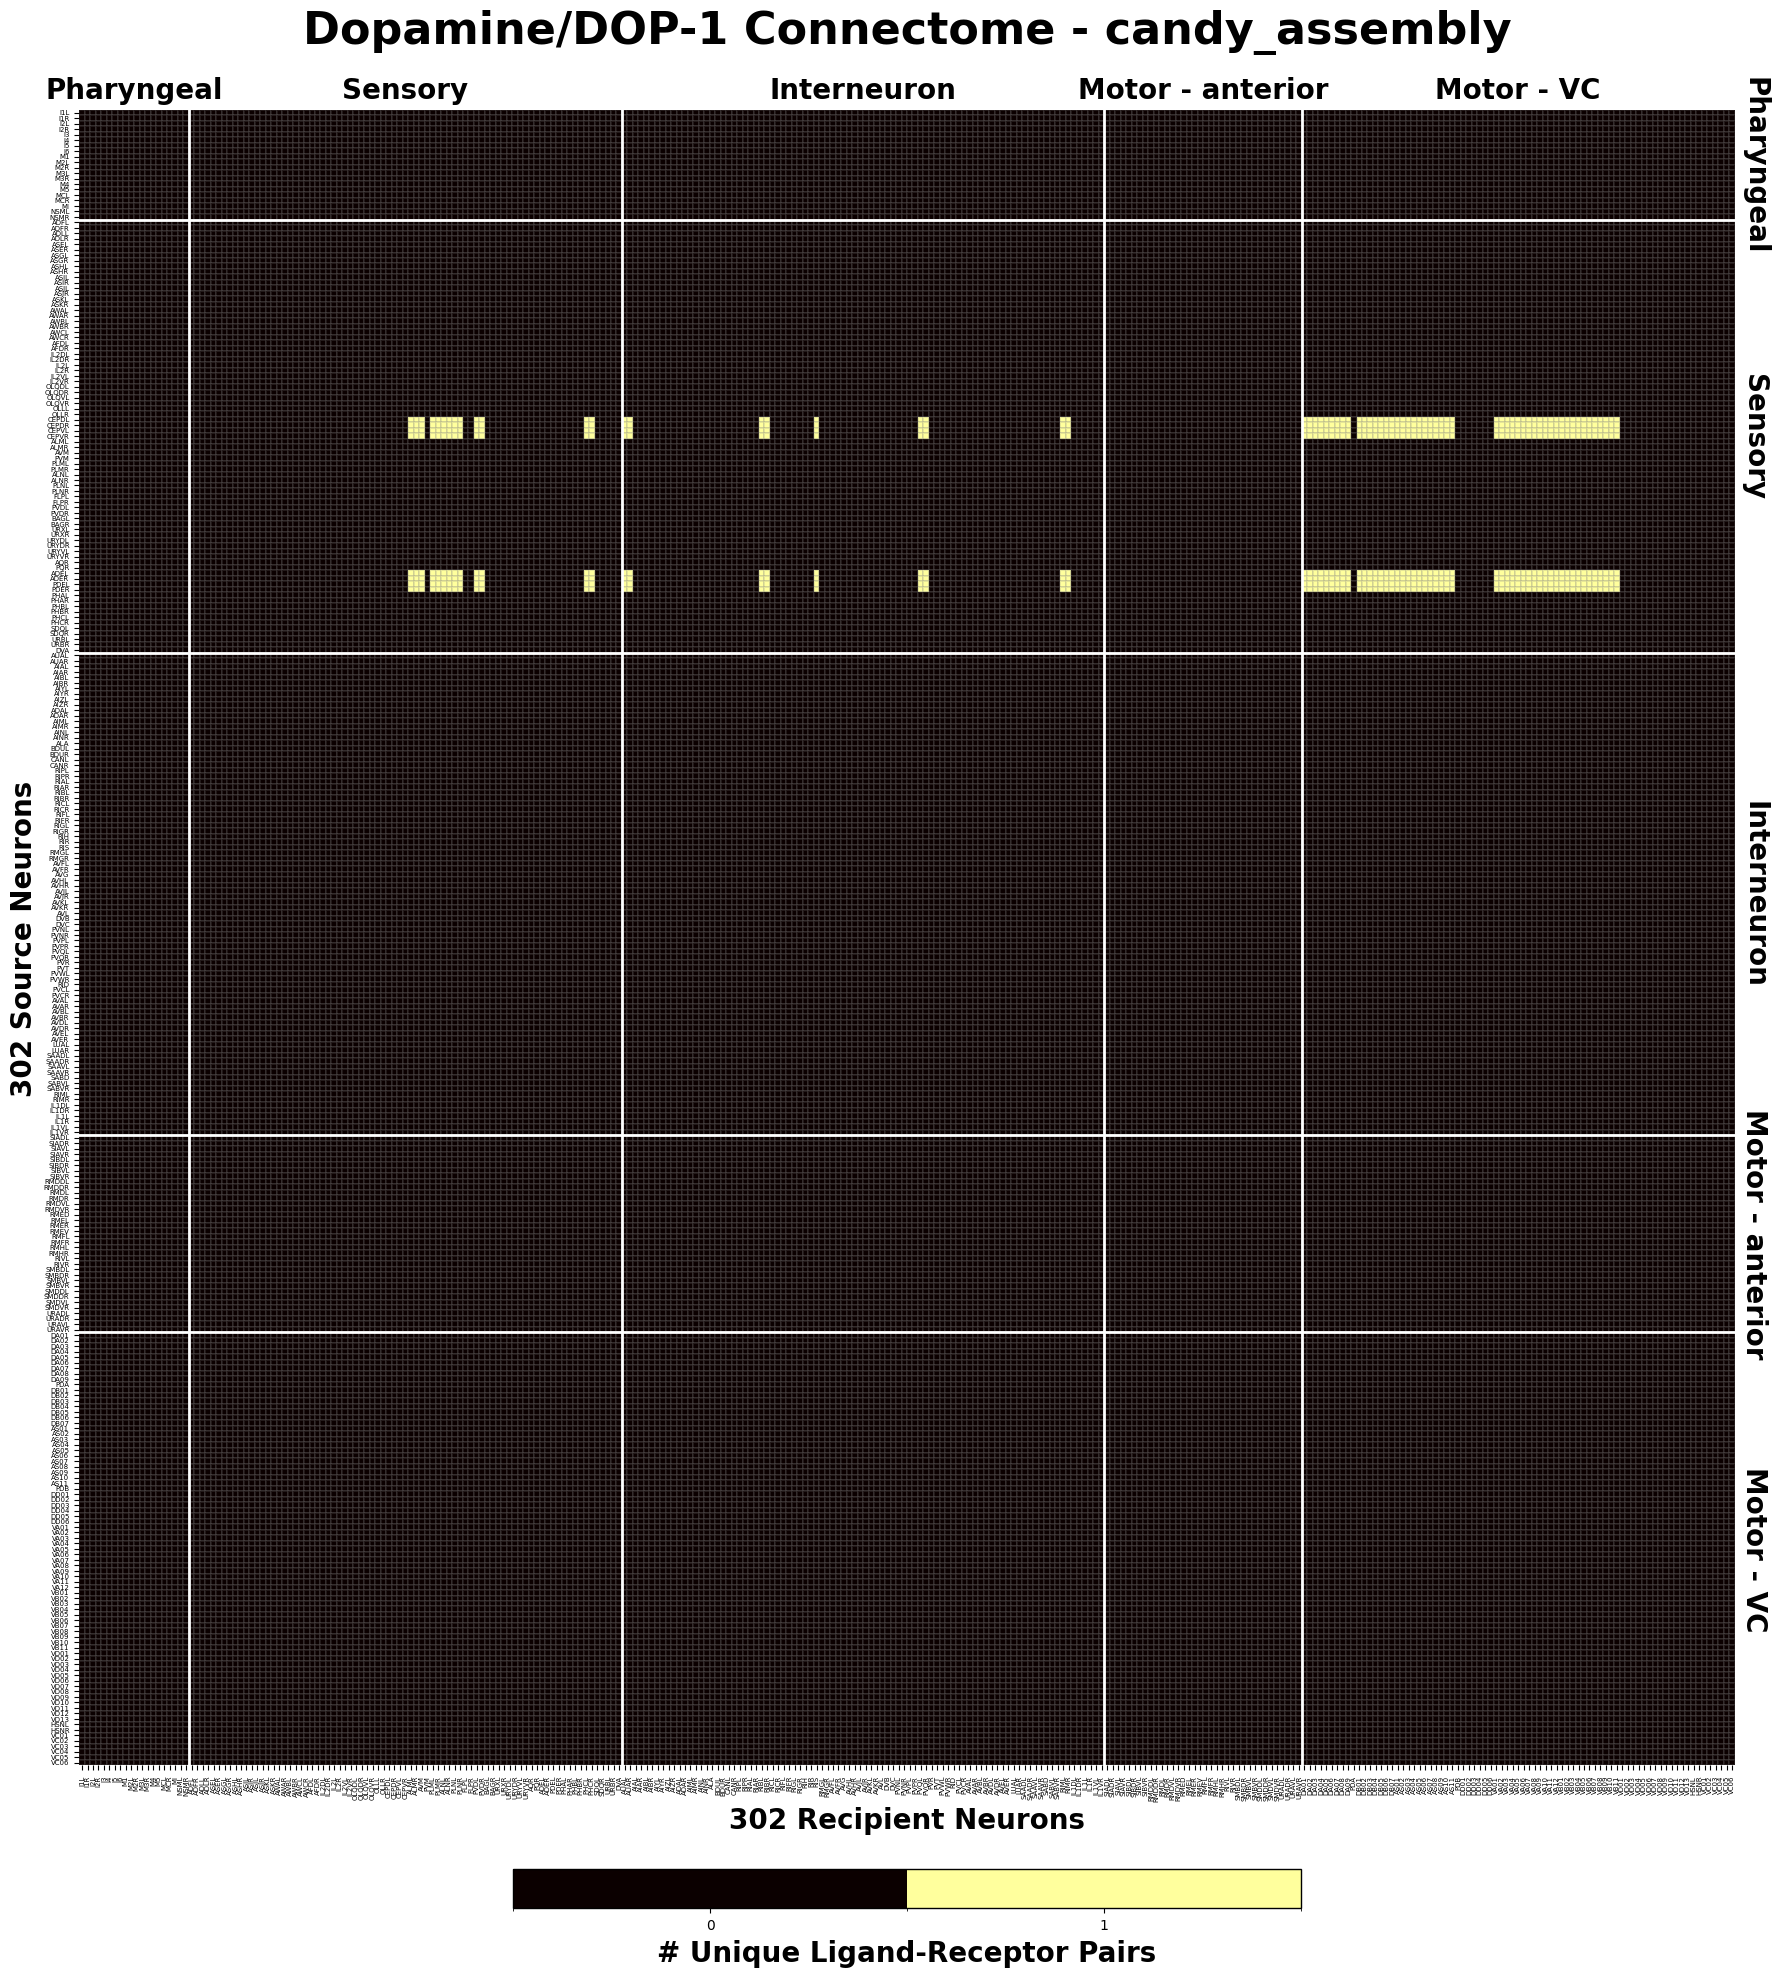

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/dopamine_01_dop-1.csv


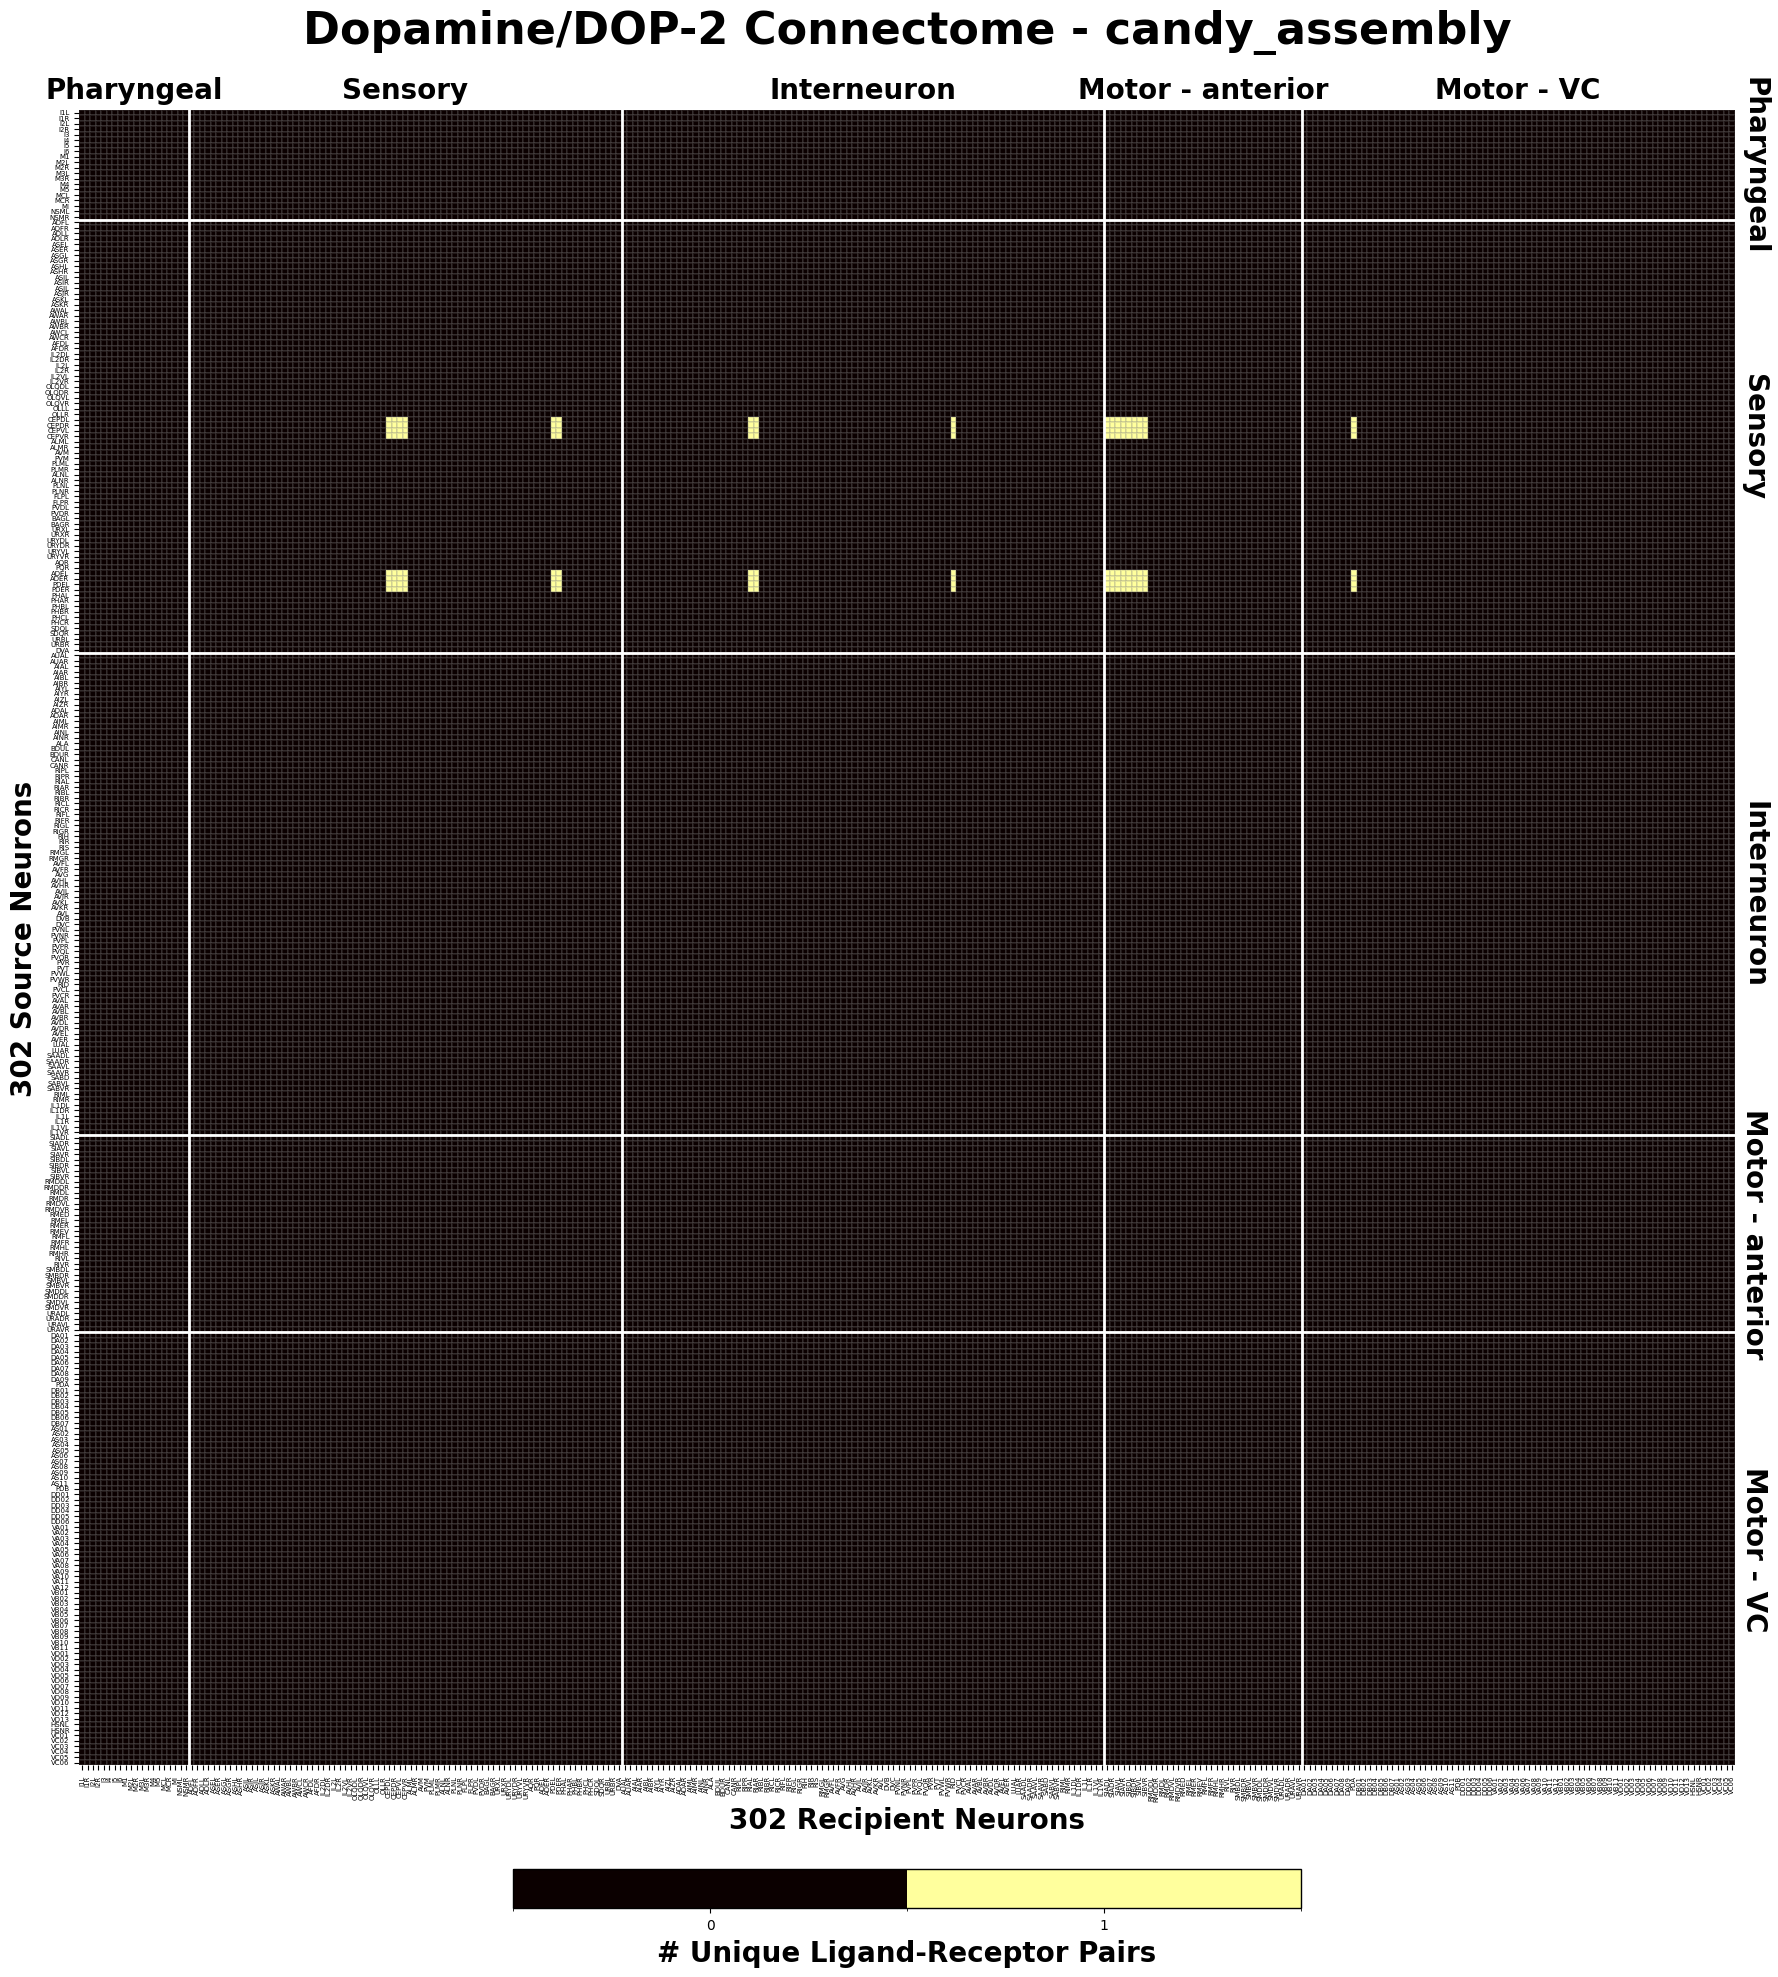

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/dopamine_01_dop-2.csv


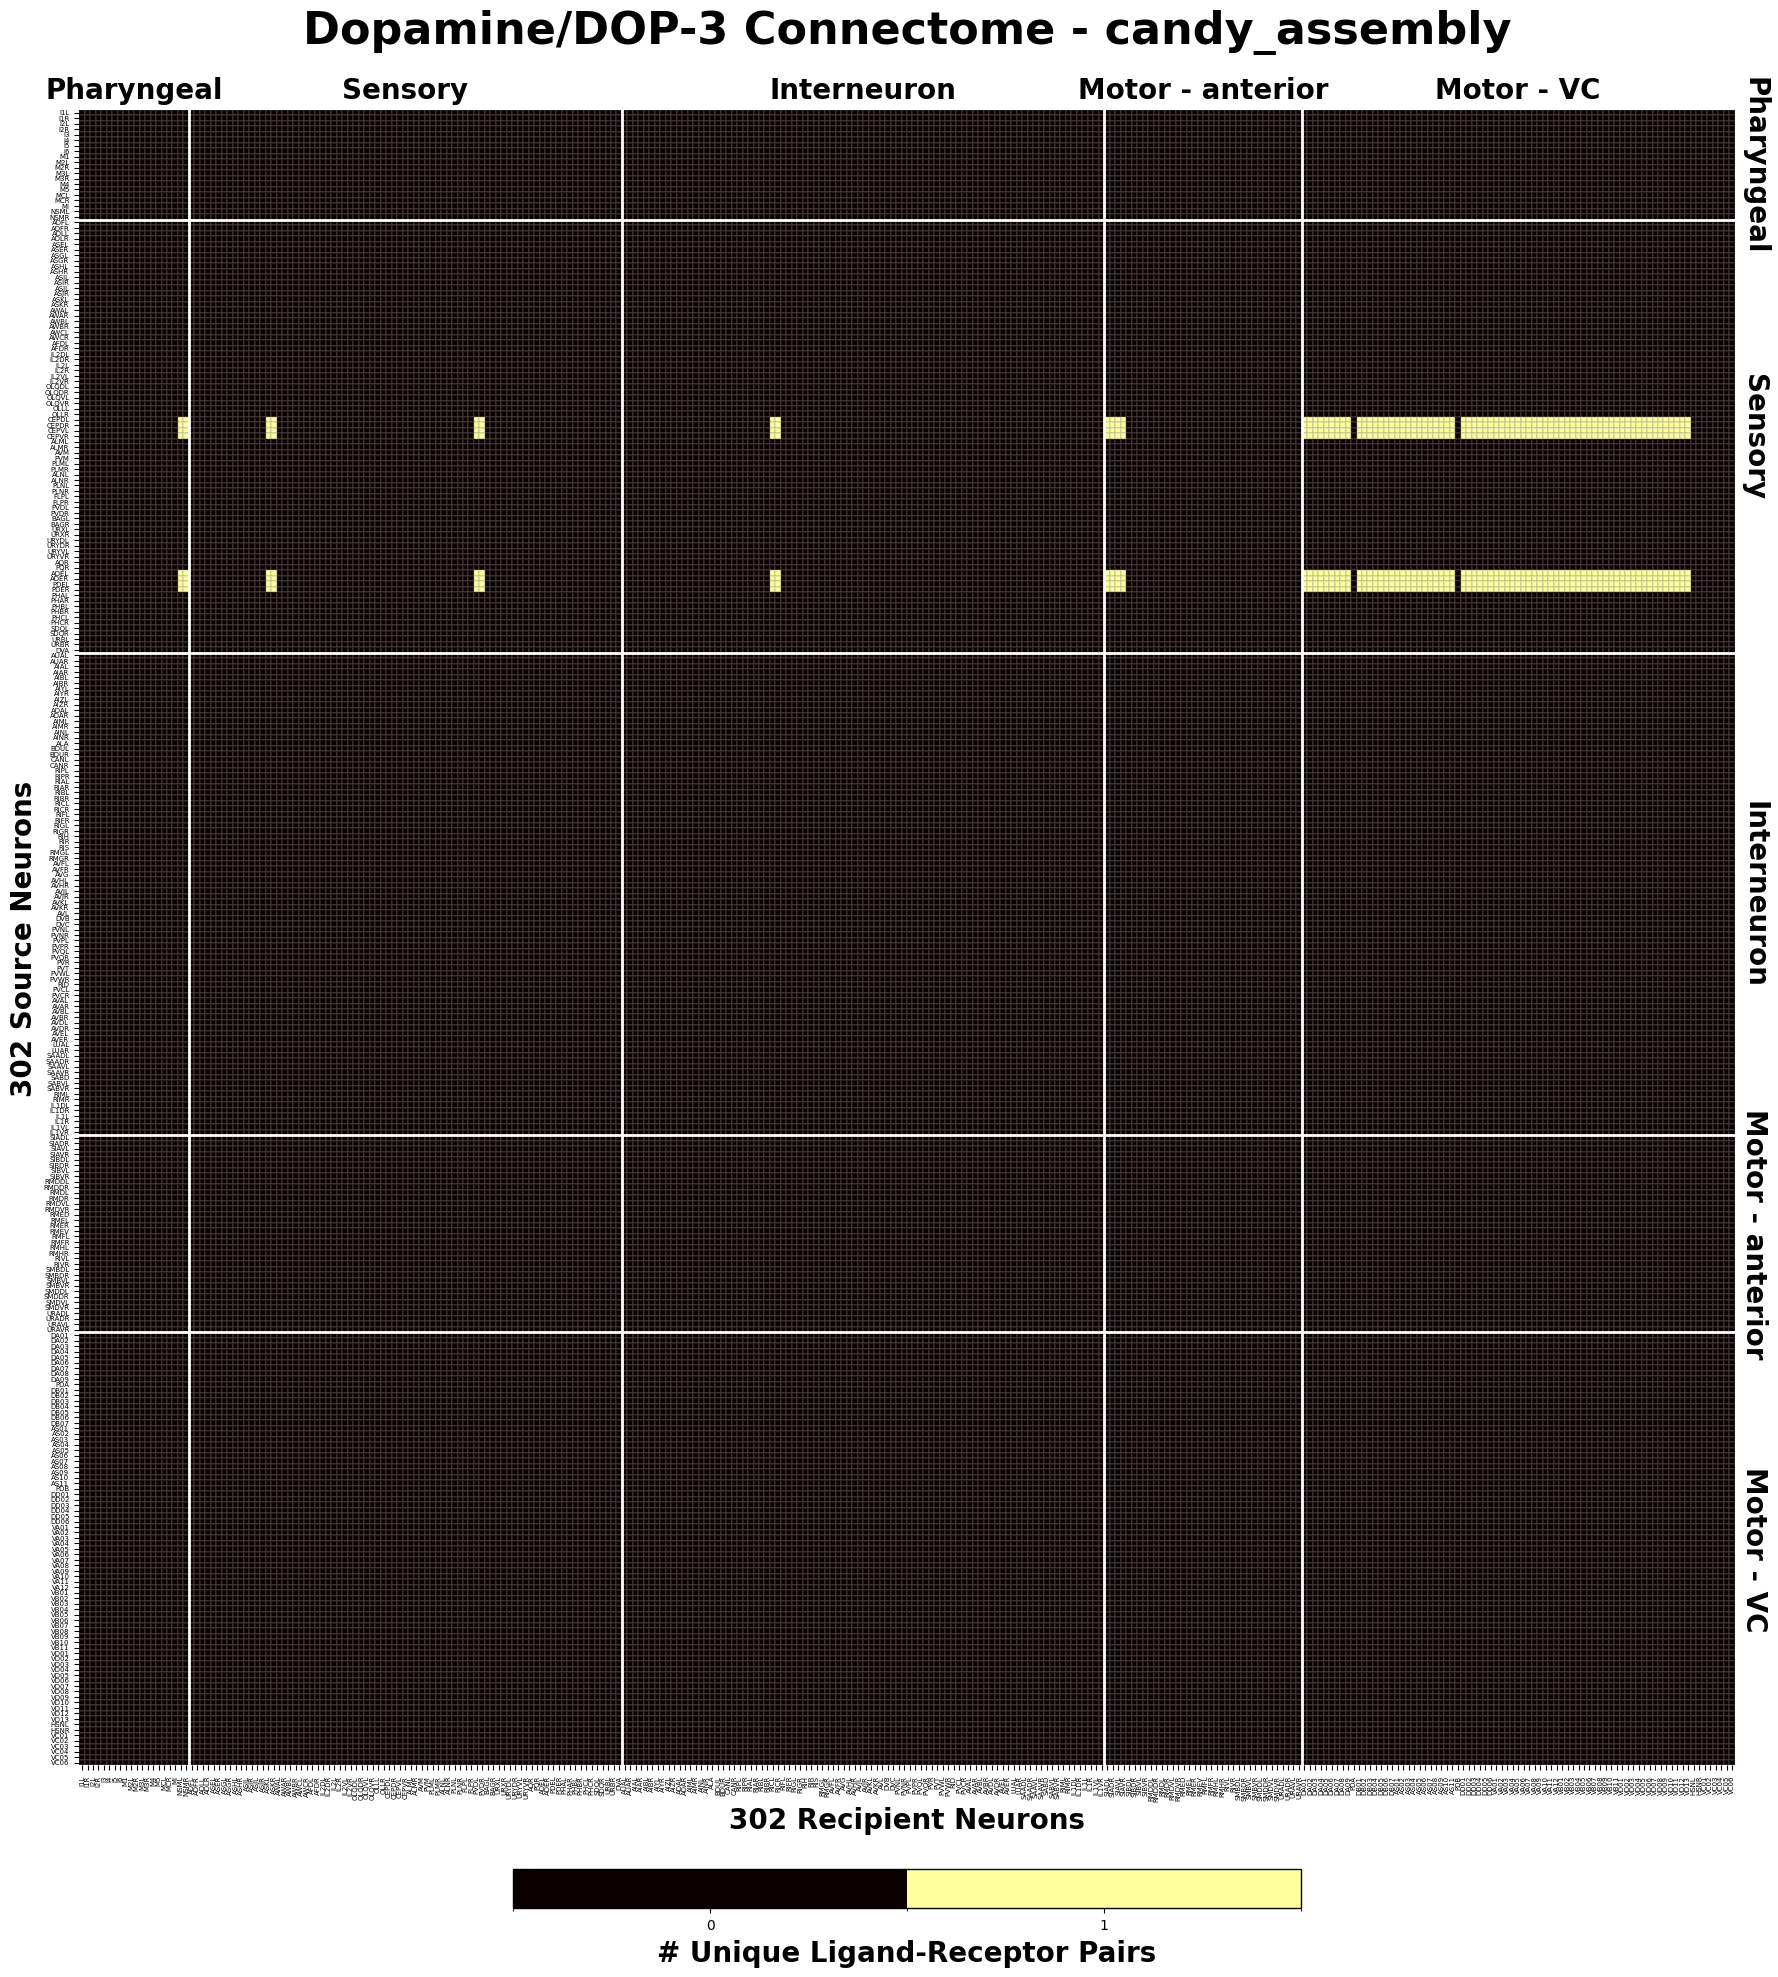

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/dopamine_01_dop-3.csv


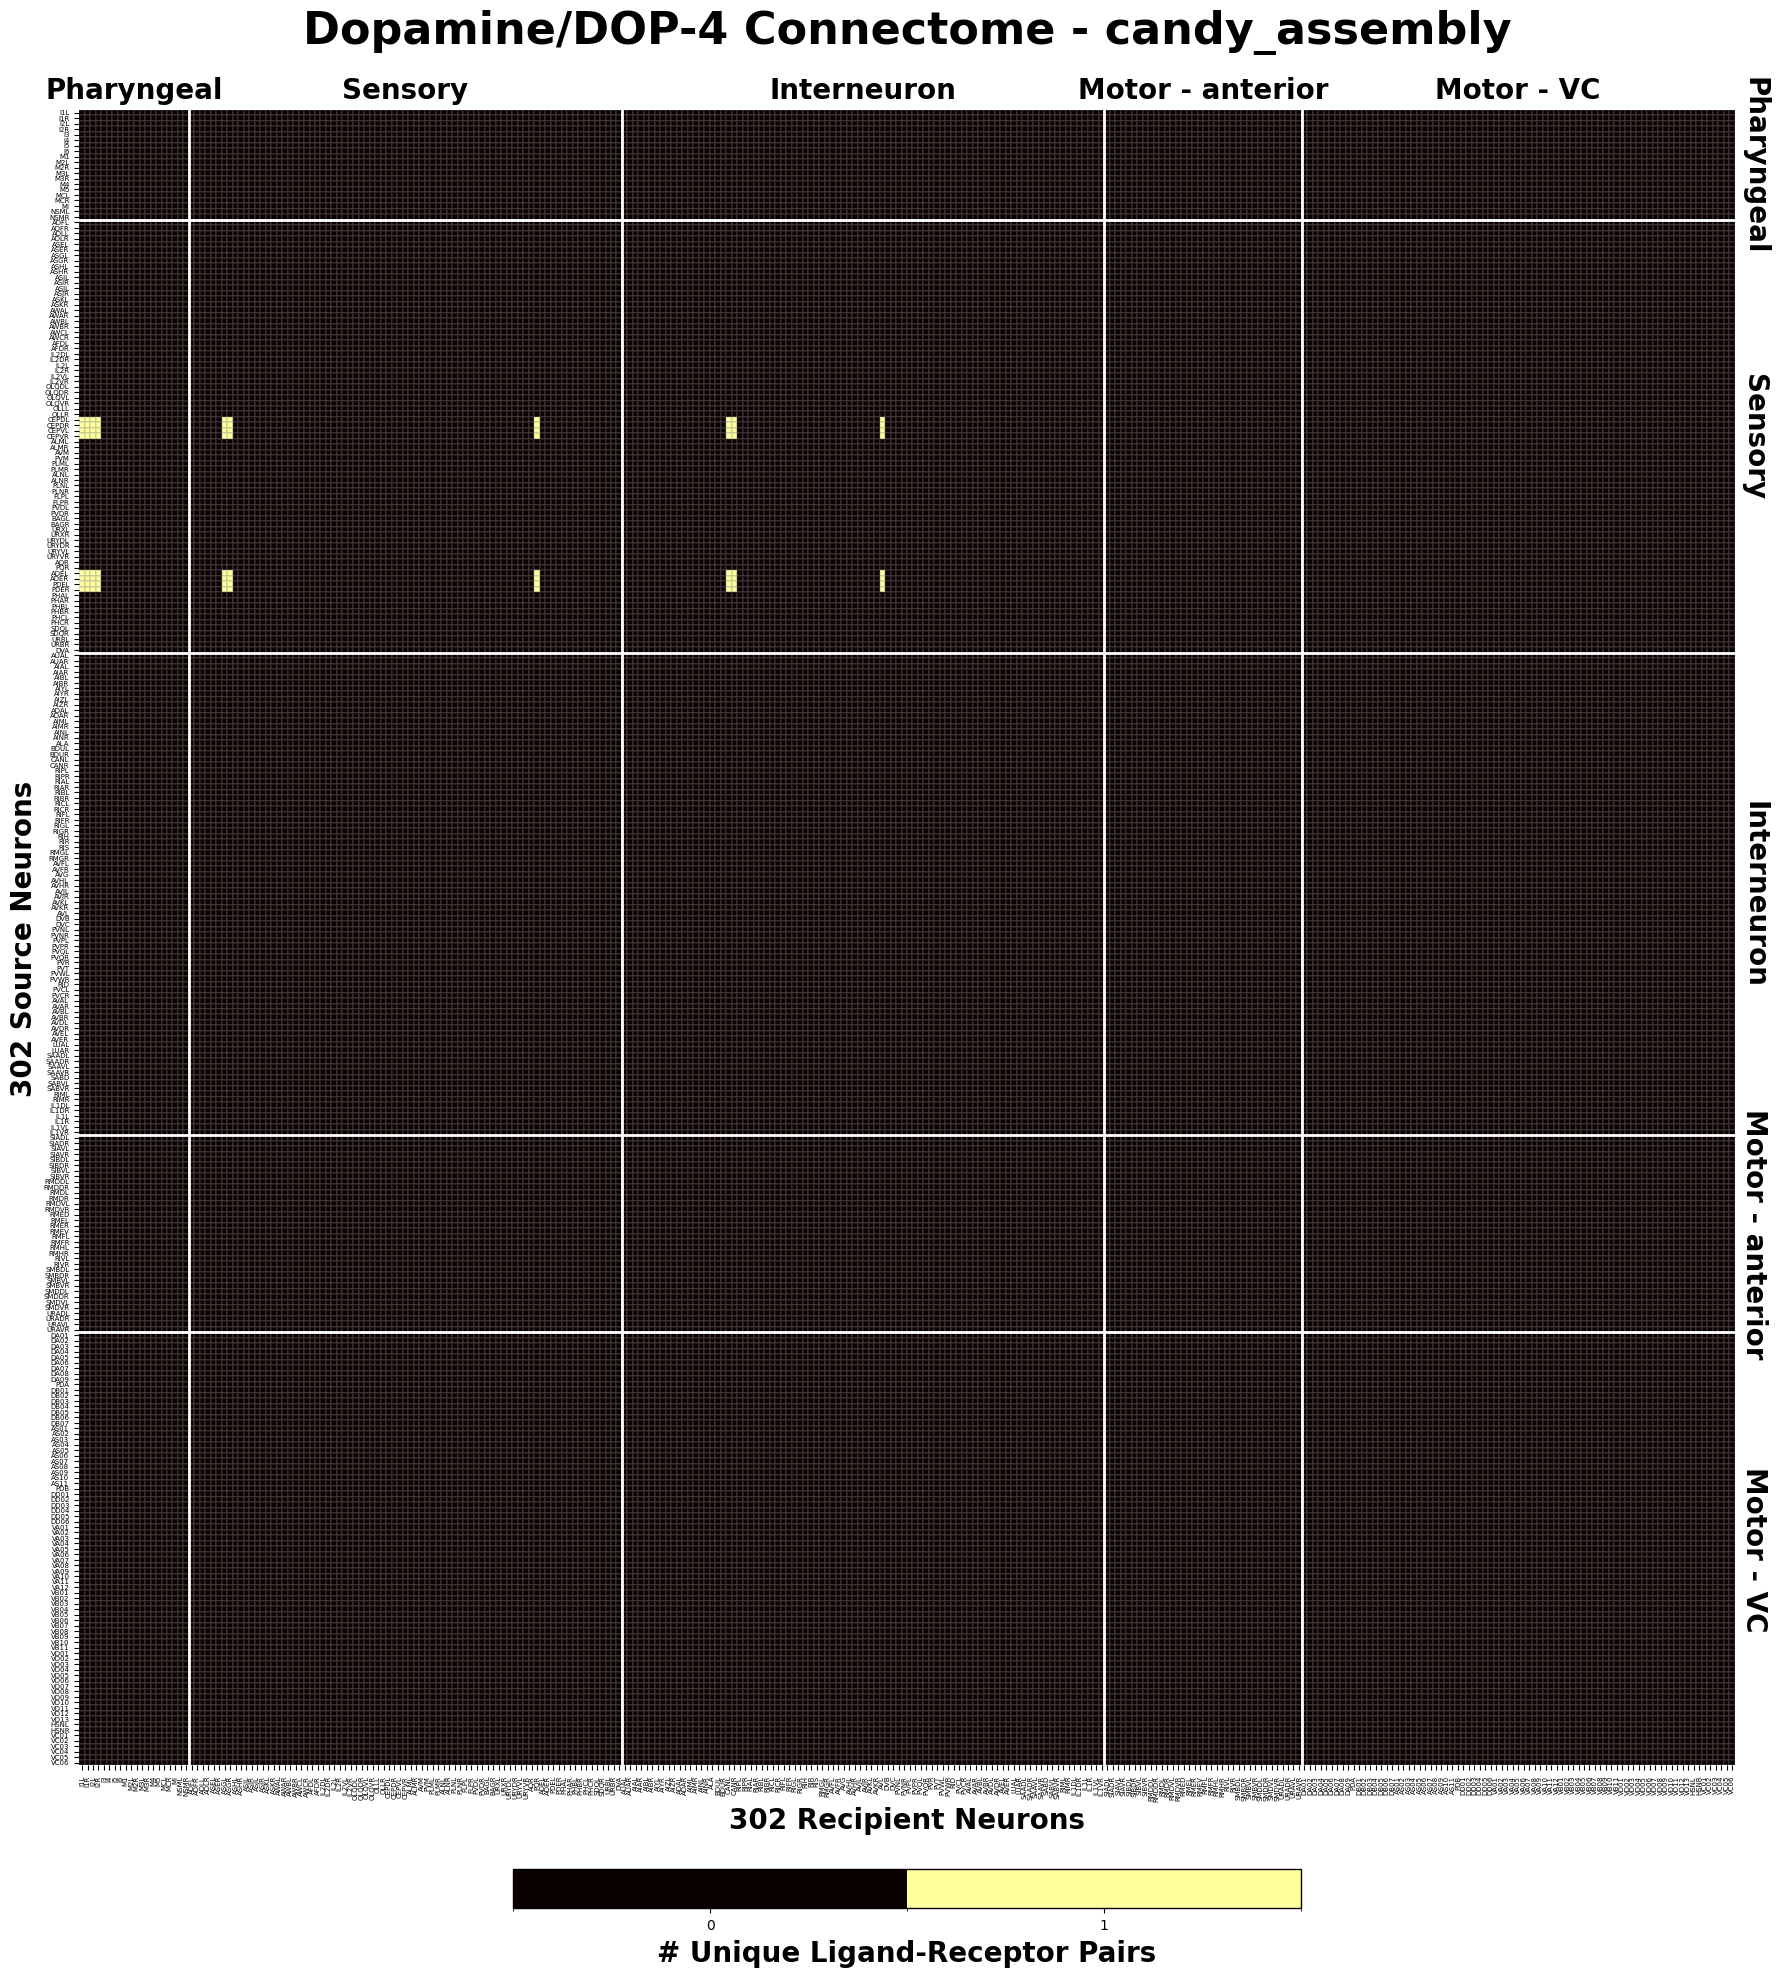

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/dopamine_01_dop-4.csv


In [ ]:
# Example 1: Dopamine connectome

molecule = 'dopamine'
release_markers = ['synthesis']                              # cat-2 marker for dopamine
release_sources = ['literature:Bentley2016']
release_gate = 'and'                                         # if there is only one data source, the gate does not matter
receptor_sources = ['reporter:Muralidhara2025']
receptor_gate = 'or'                                         # if there is only one data source, the gate does not matter

fname = f'{molecule}_01'                                     # for file saving
title = f'{username}_assembly - {fname}'                     # for visualization

# Assemble based on your choice of sources
conn = pu.assemble_nt_connectome(
    molecule,
    release_markers=release_markers,
    release_sources=release_sources,
    receptor_sources=receptor_sources
)

release_neurons = conn['binary'].index[conn['binary'].sum(axis=1) > 0].tolist()
print(f"Release sites: {release_neurons}")

# Save metadata of this assembly to JSON
metadata = {
    'created': datetime.now().isoformat(),
    'molecule': molecule,
    'release_markers': release_markers,
    'release_sources': release_sources,
    'release_gate': release_gate,
    'receptor_sources': receptor_sources,
    'receptor_gate': receptor_gate
}

path_metadata = f'../connectomes/{username}_assembly/{fname}_metadata.json'
with open(path_metadata, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Saved metadata to {path_metadata}")

# Binary and Count Format
for format in ['binary', 'count']:
    std_df = pu.standardize_dataframe(conn[format], pu.AllHermNeurons)

    if format == 'binary':
        colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'
    else:
        colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{format}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{format}.csv'
    std_df.to_csv(savepath)
    print(f"Saved custom connectome to {savepath}")

# Per receptor
for receptor, connection in conn['per_pair'].items():
    std_df = pu.standardize_dataframe(connection, pu.AllHermNeurons)
    title = f'{molecule.capitalize()}/{receptor.upper()} Connectome - {username}_assembly'
    colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{receptor}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{receptor}.csv'
    std_df.to_csv(savepath)
    print(f"Saved each ligand-receptor pair of custom connectome to {savepath}")

Release sites: ['NSML', 'NSMR', 'ADFL', 'ADFR', 'HSNL', 'HSNR']
Saved metadata to ../connectomes/candy_assembly/serotonin_01_metadata.json


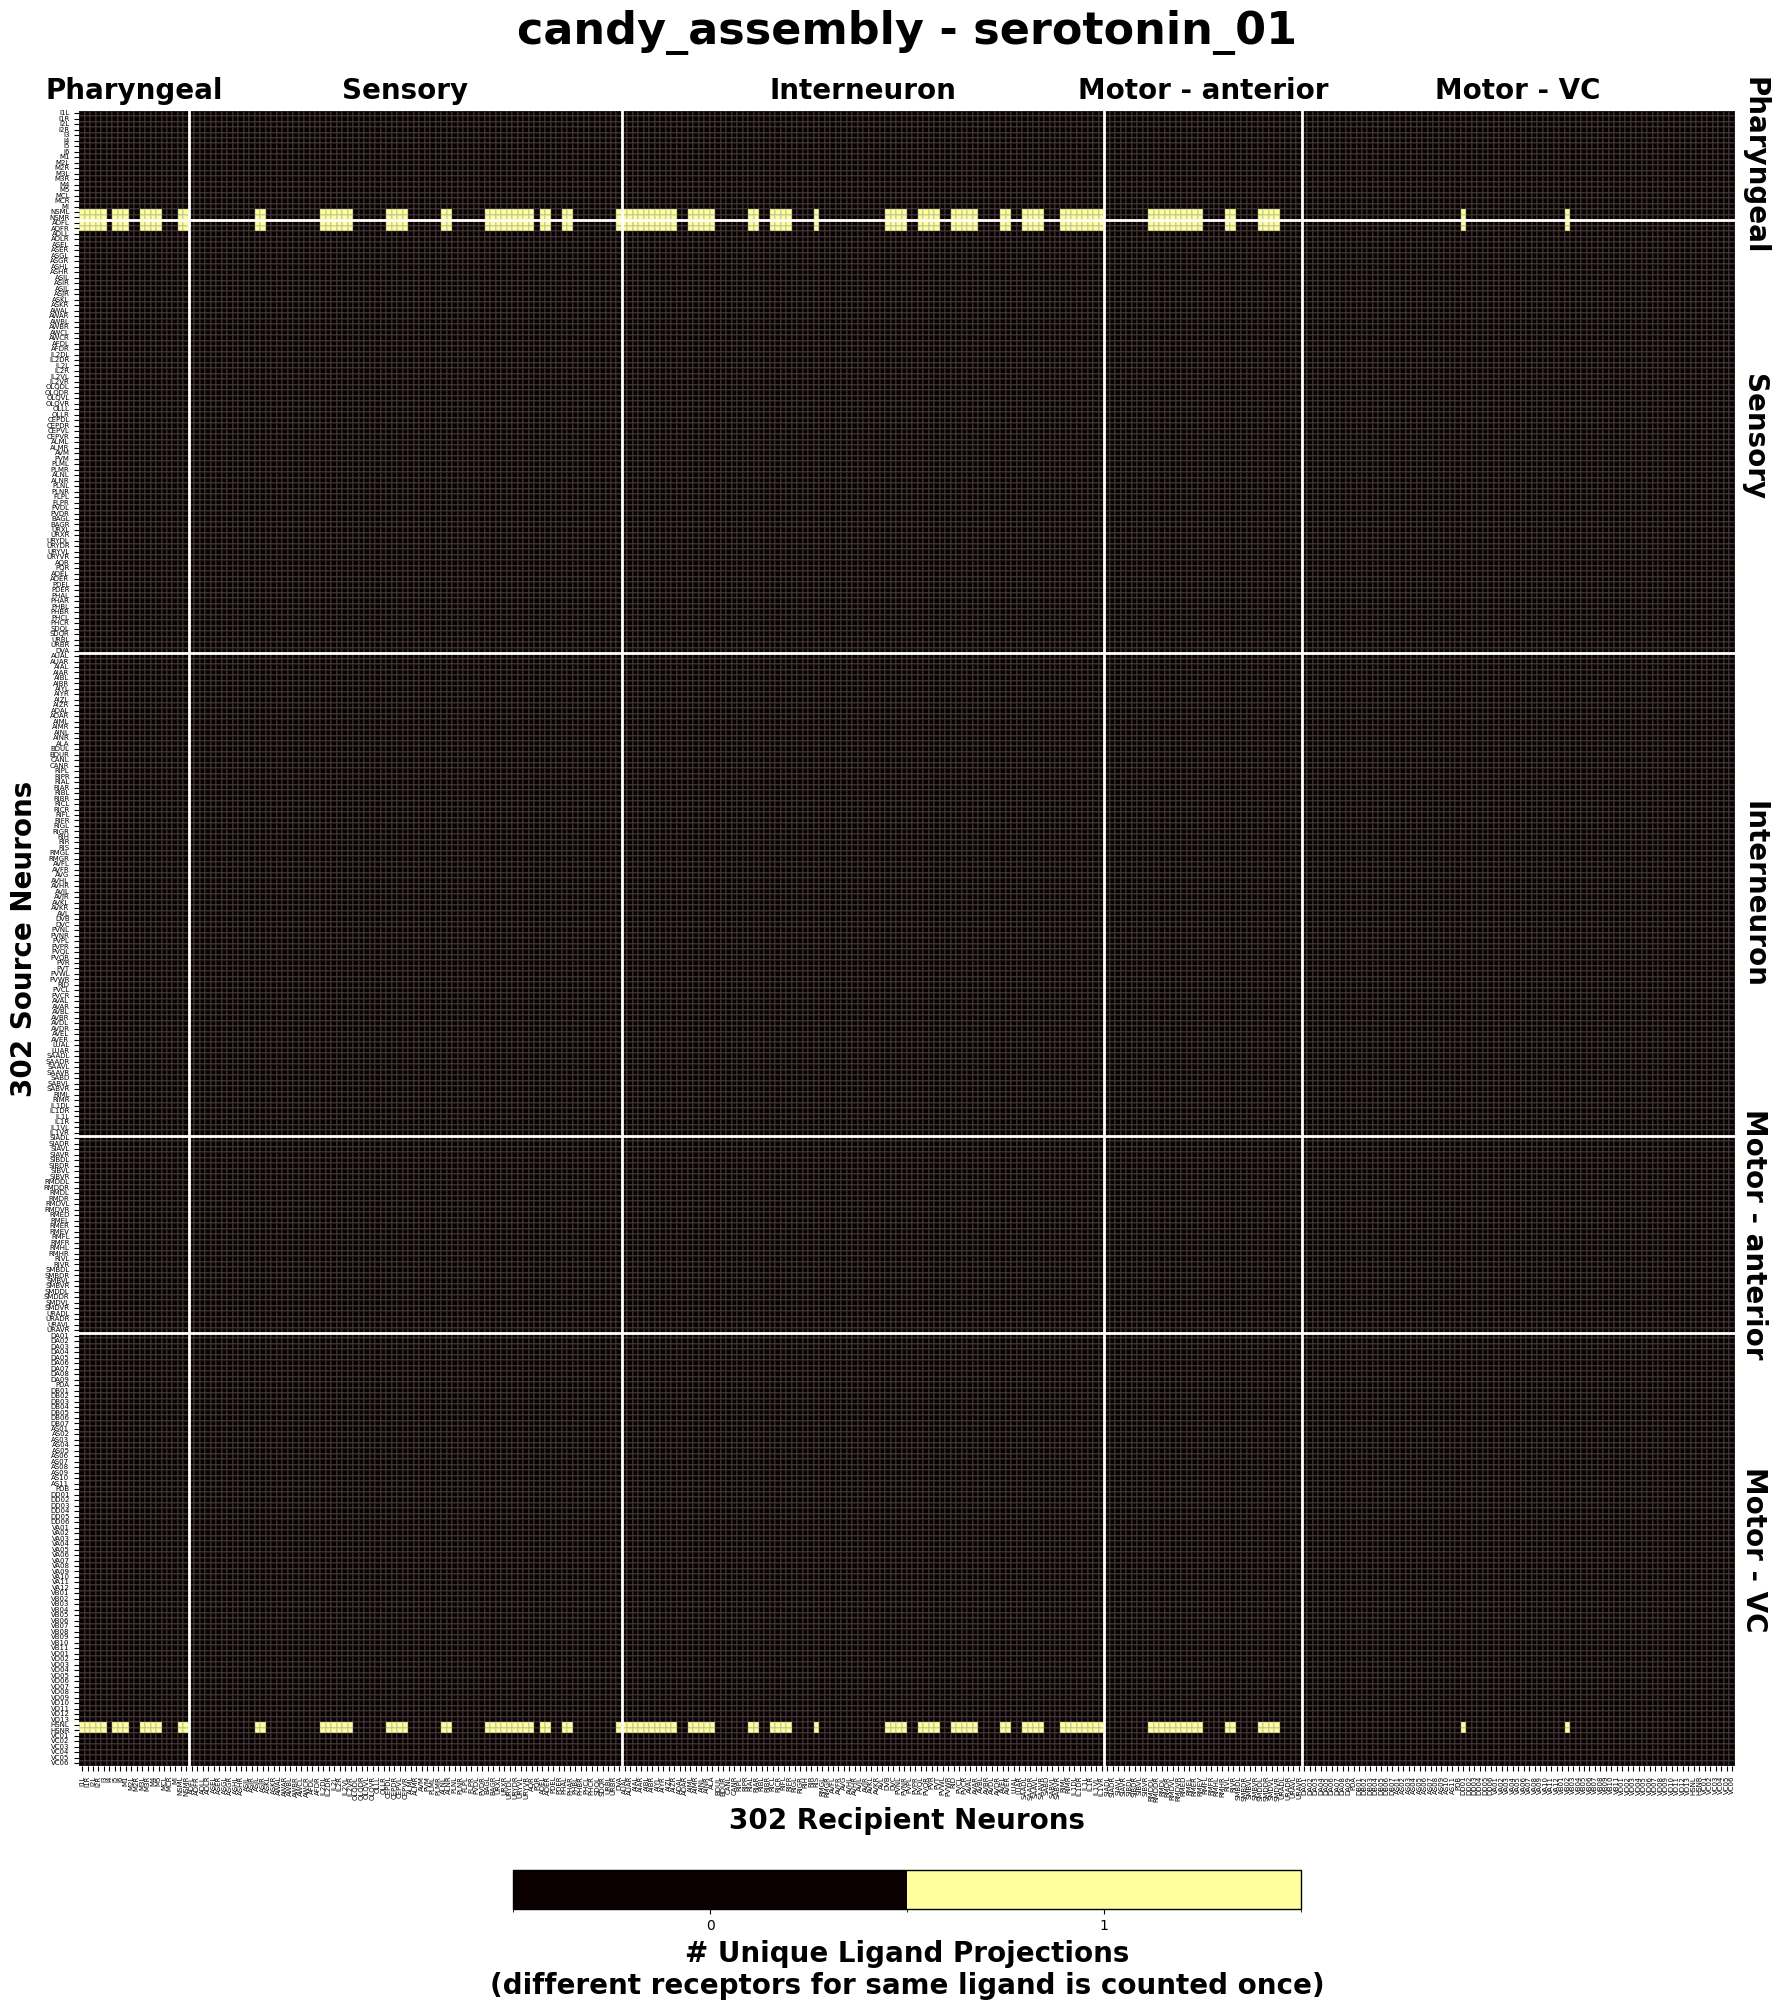

Saved custom connectome to ../connectomes/candy_assembly/serotonin_01_binary.csv


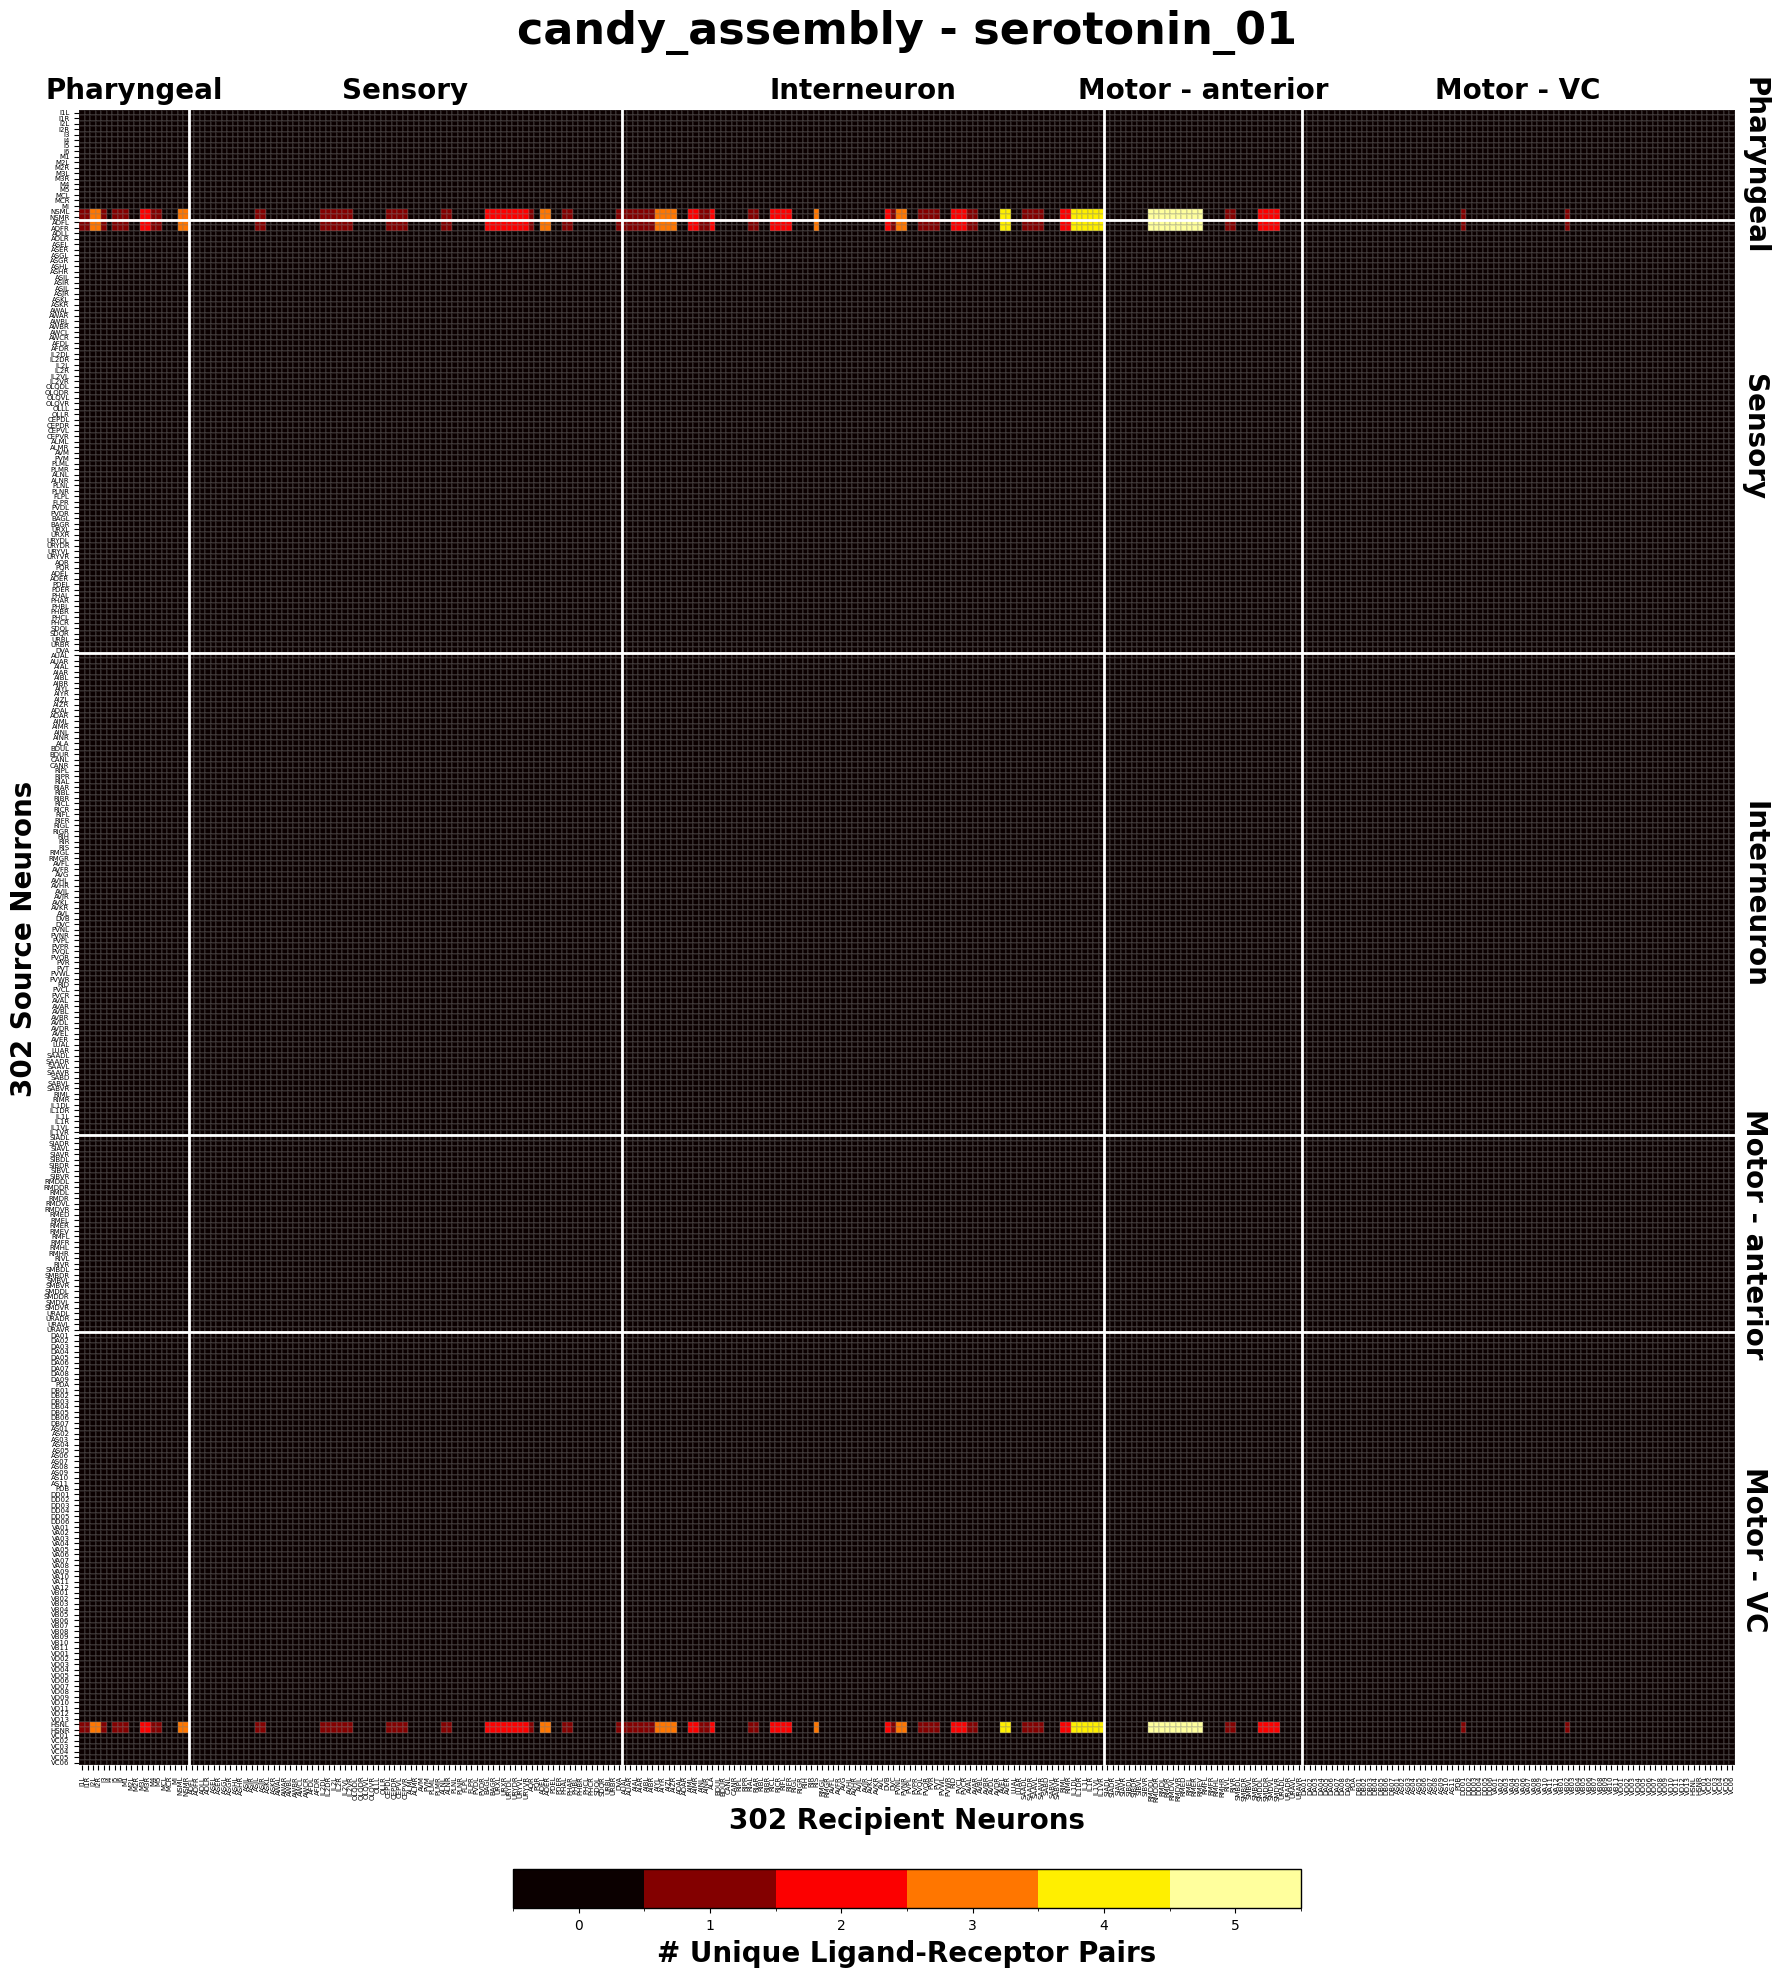

Saved custom connectome to ../connectomes/candy_assembly/serotonin_01_count.csv


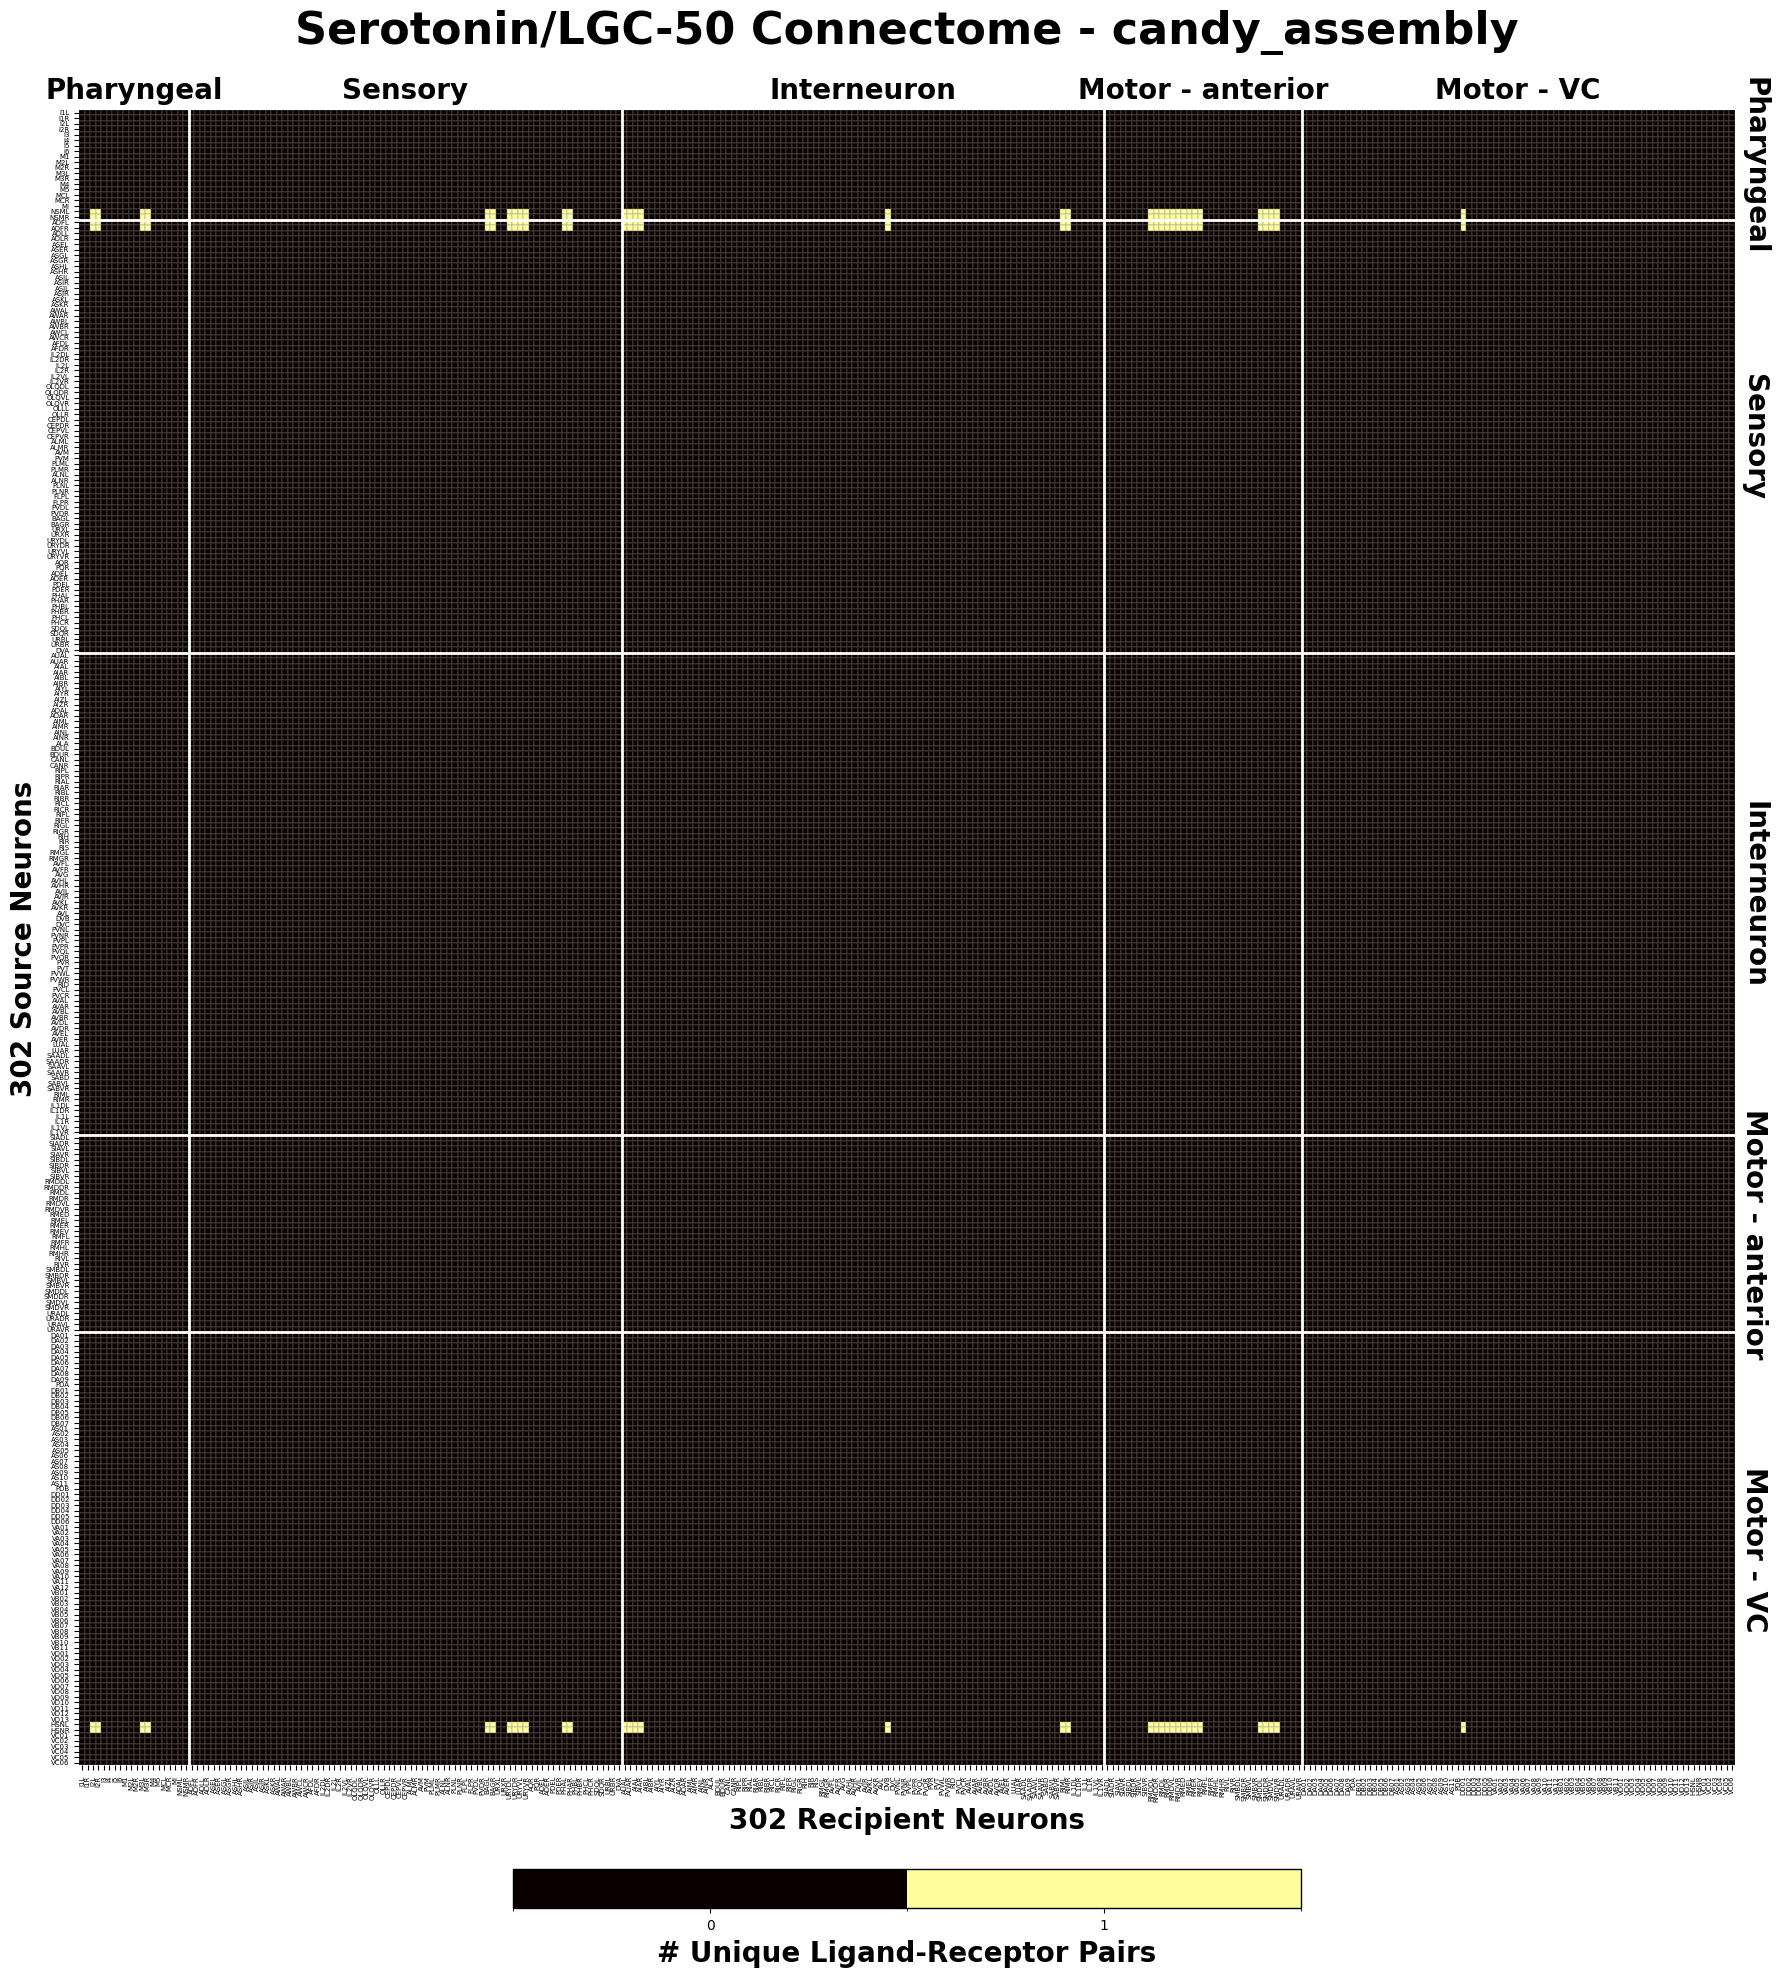

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_lgc-50.csv


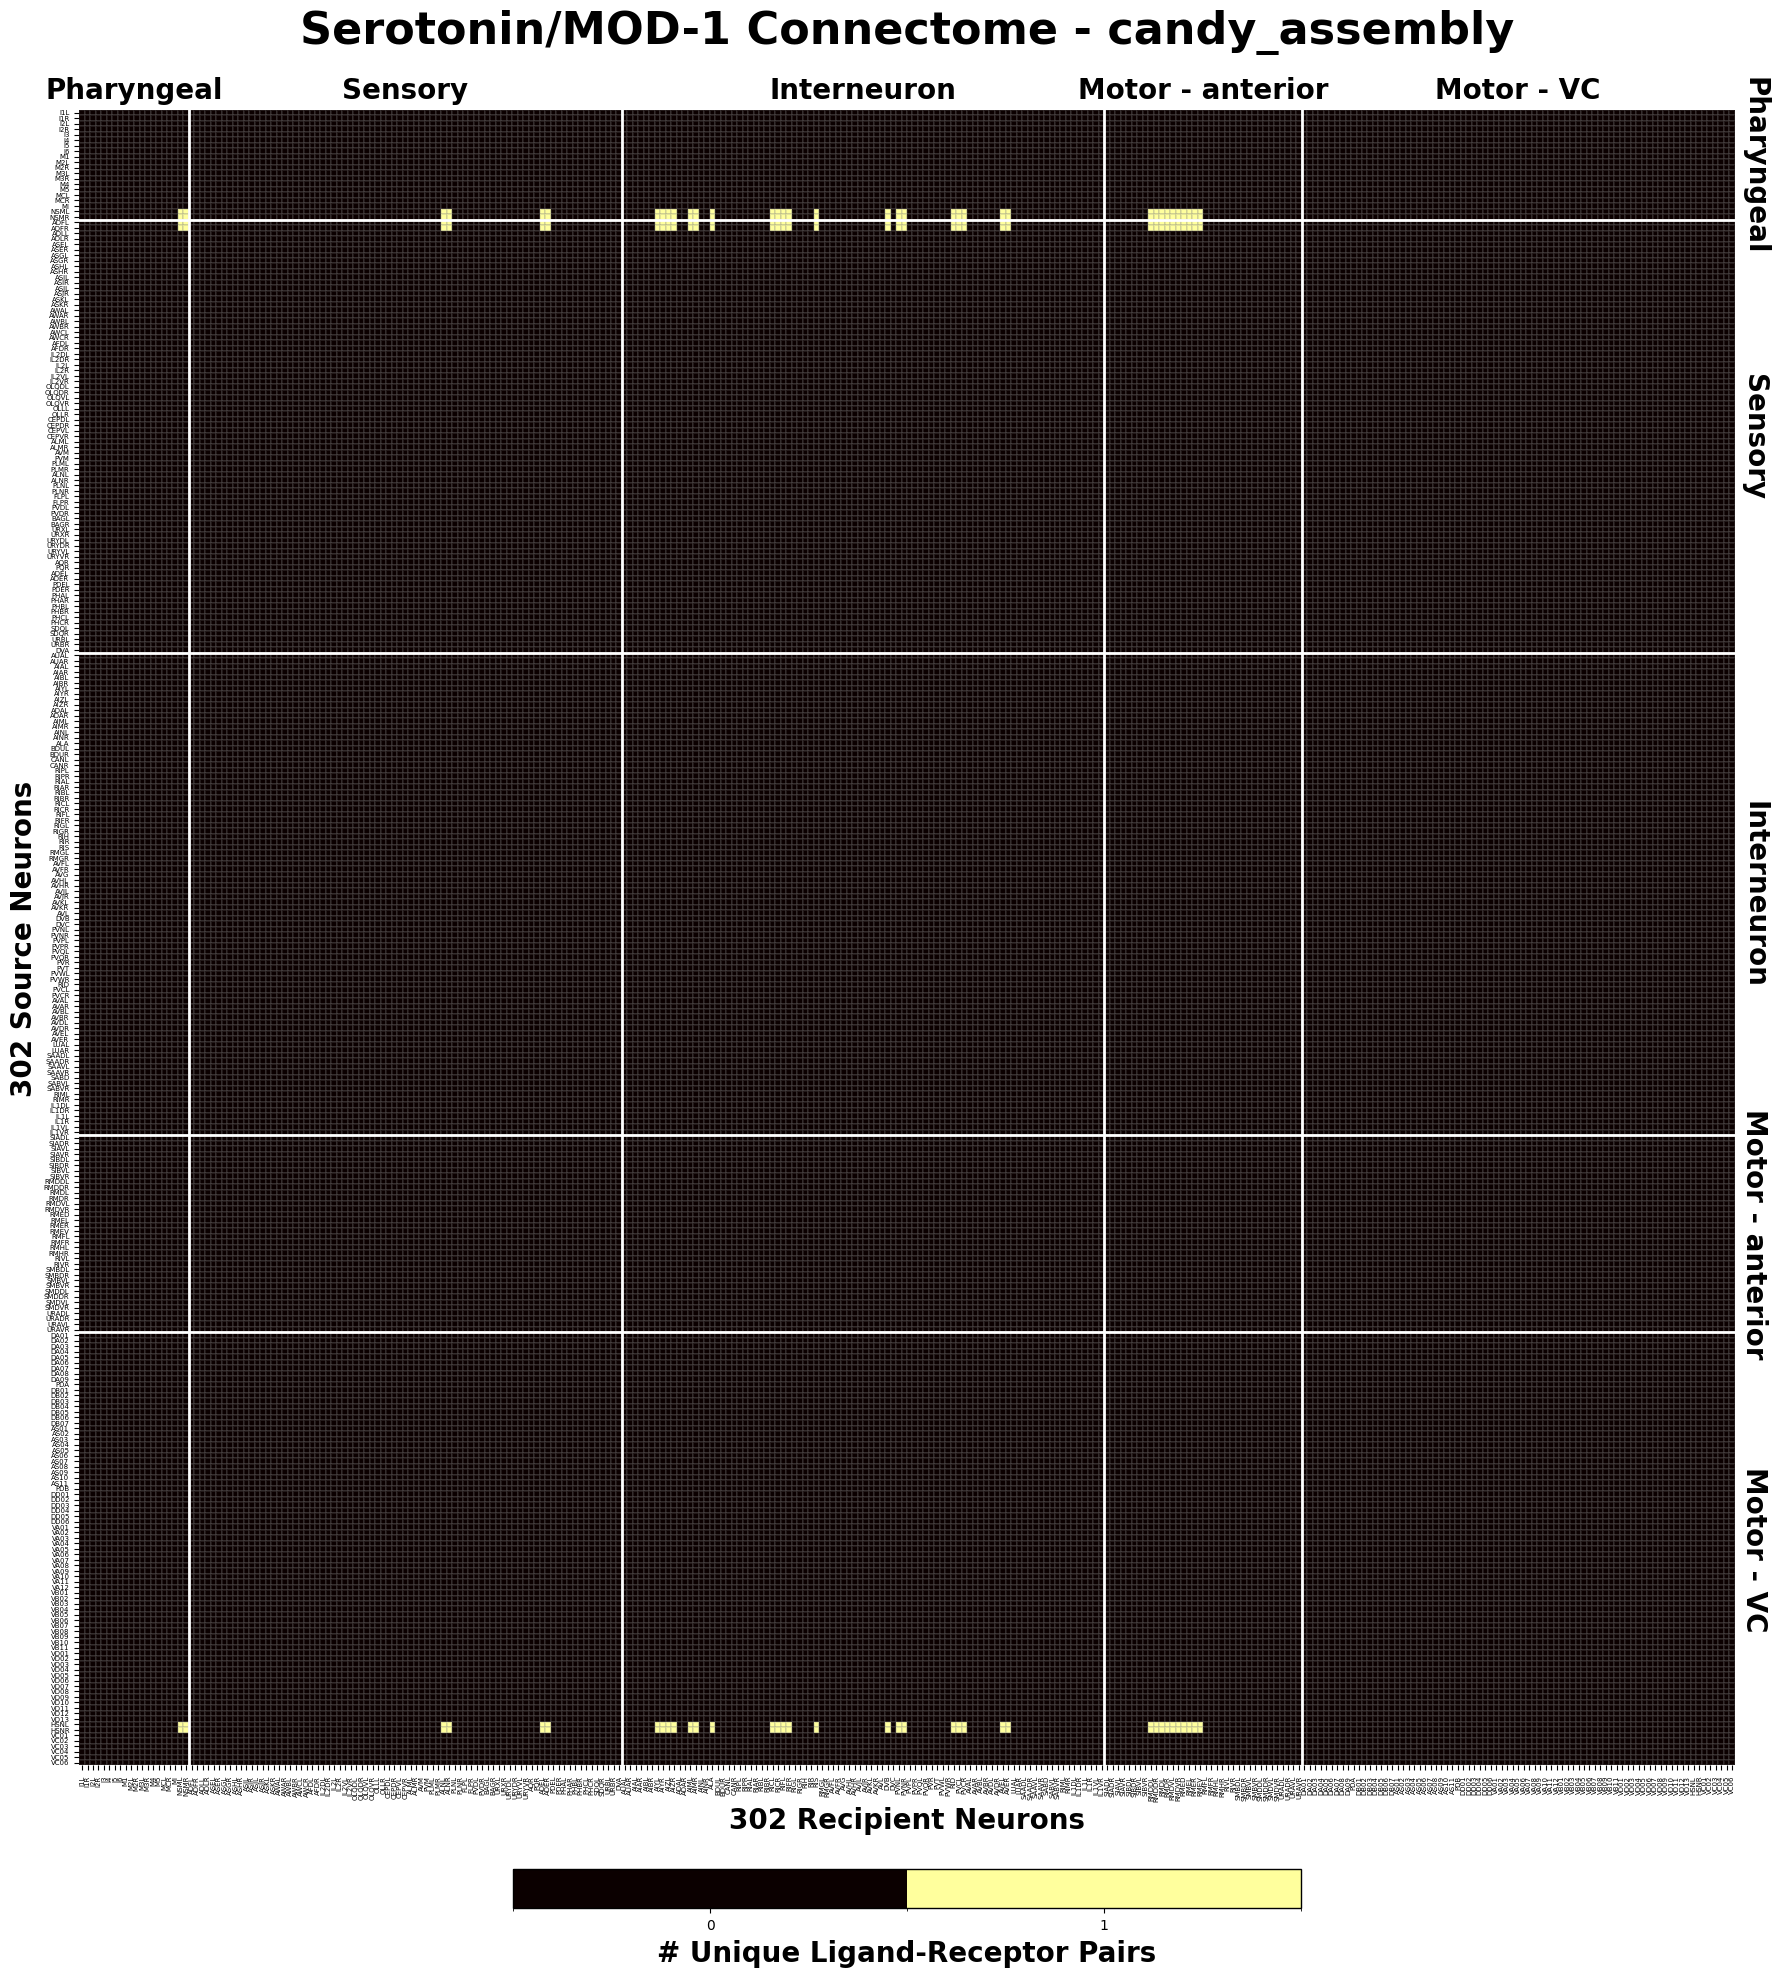

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_mod-1.csv


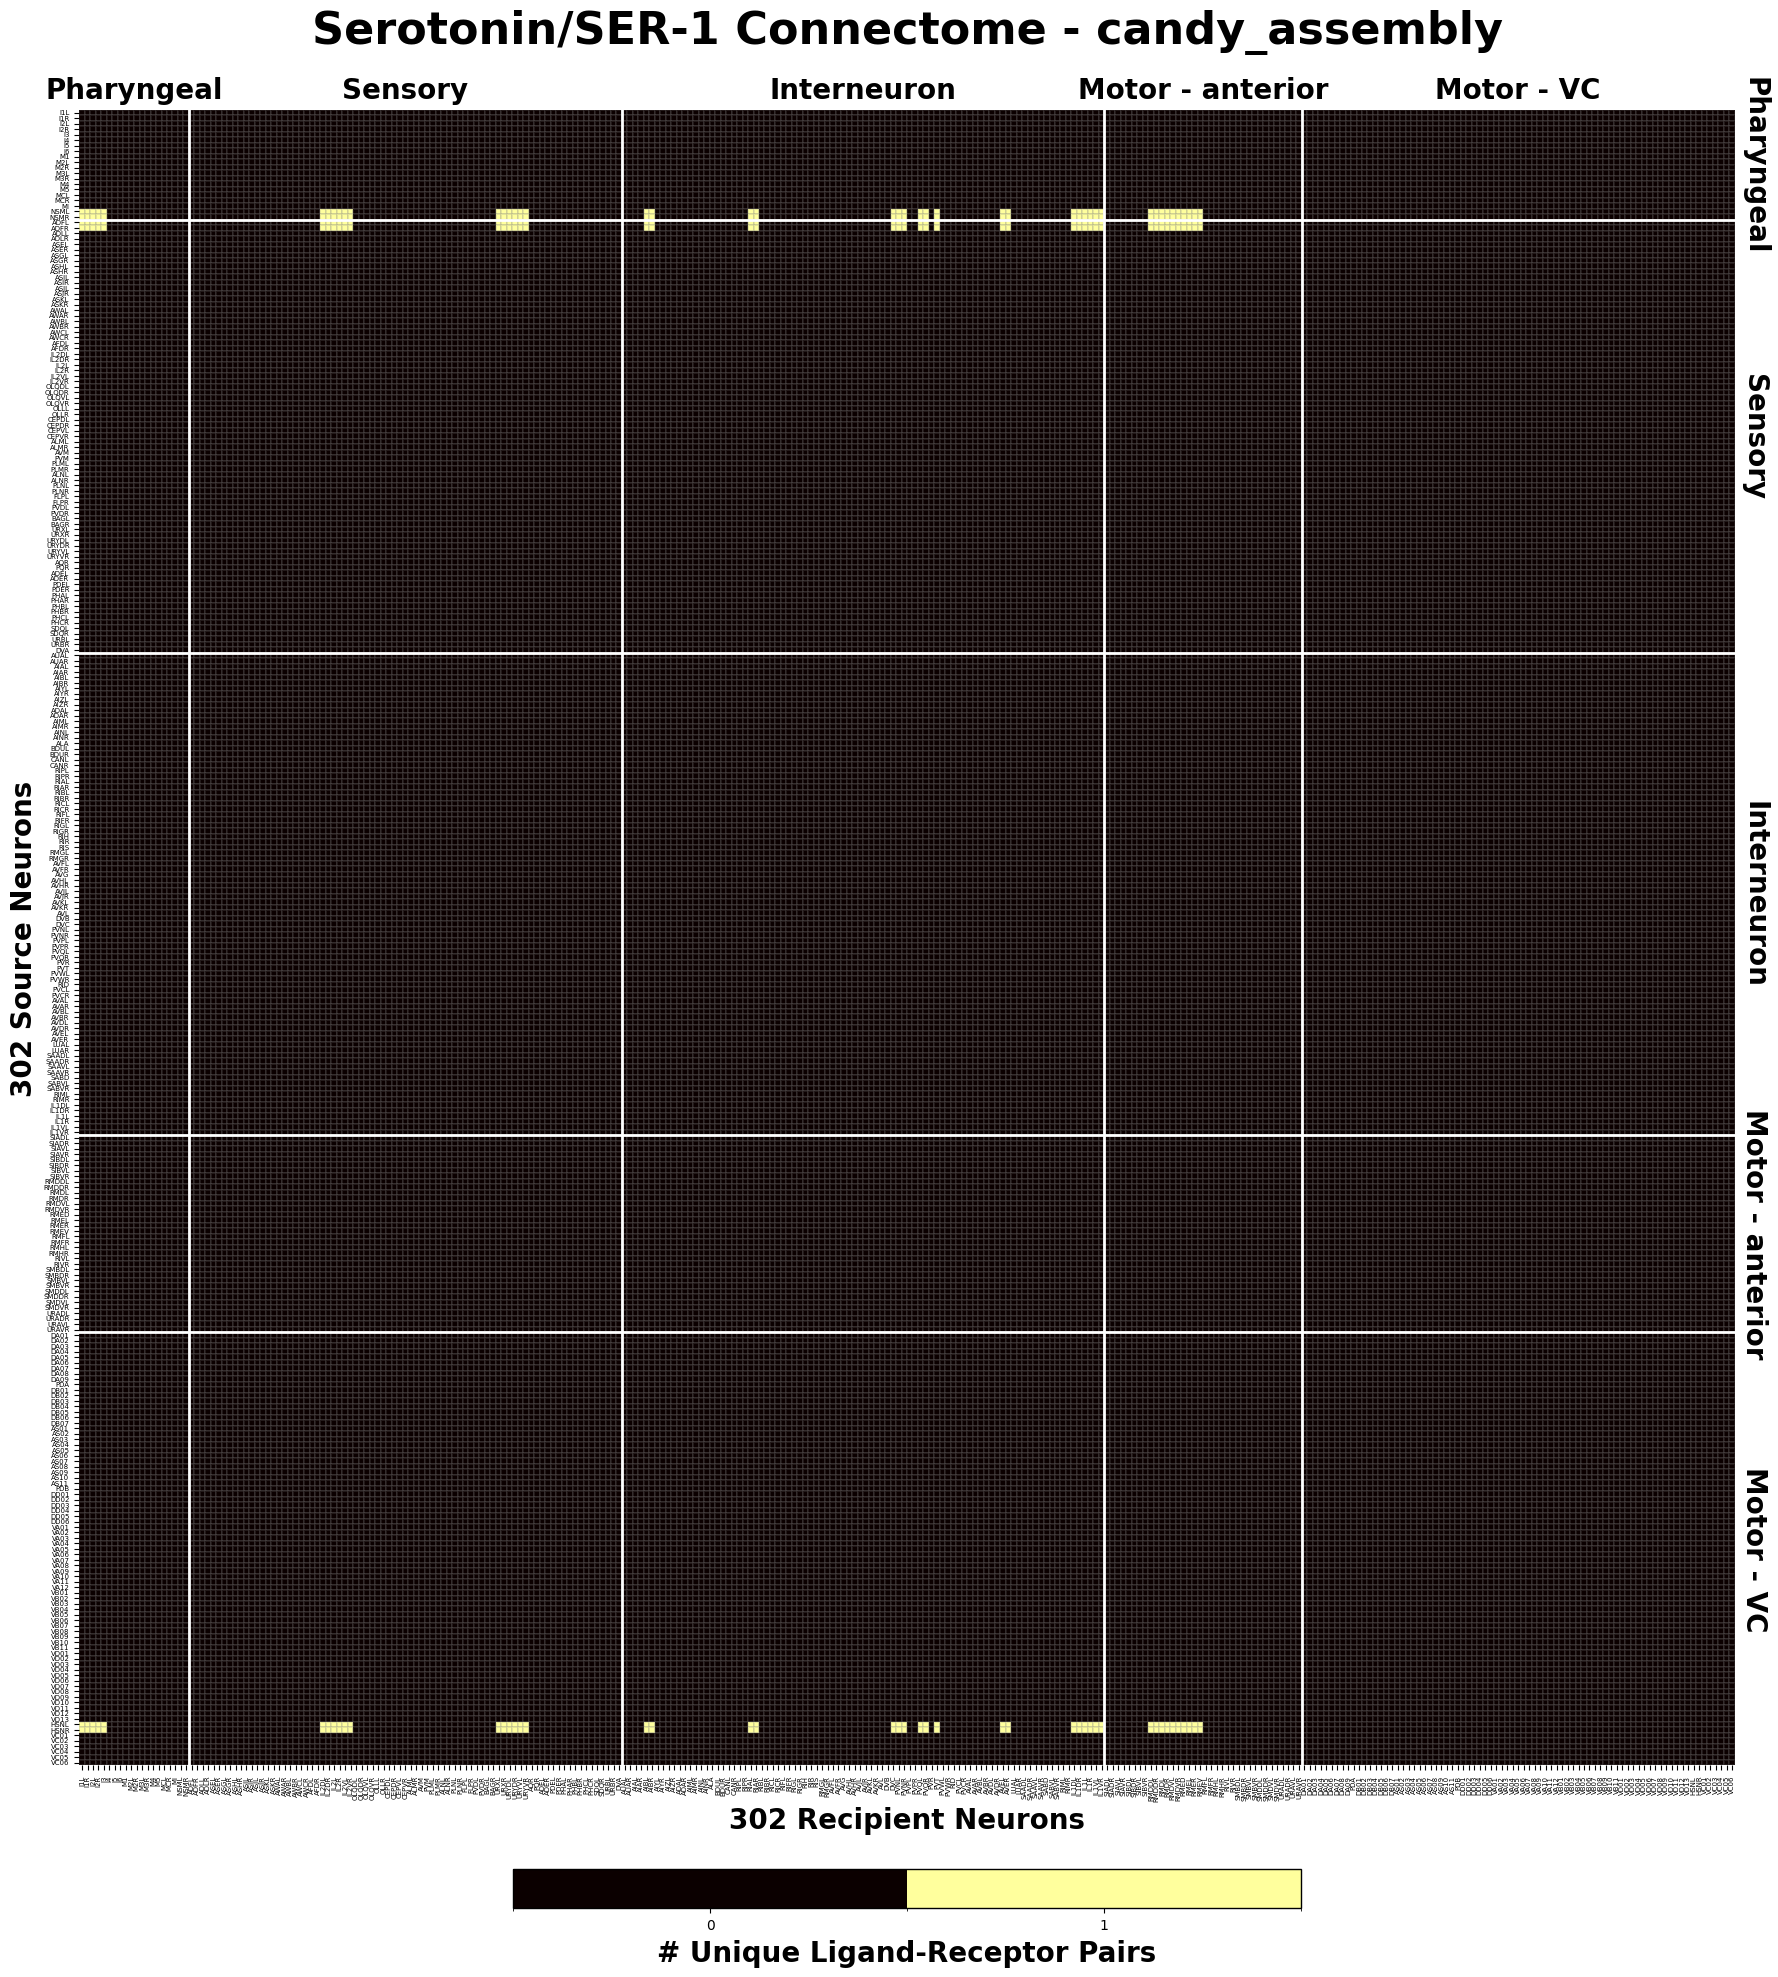

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_ser-1.csv


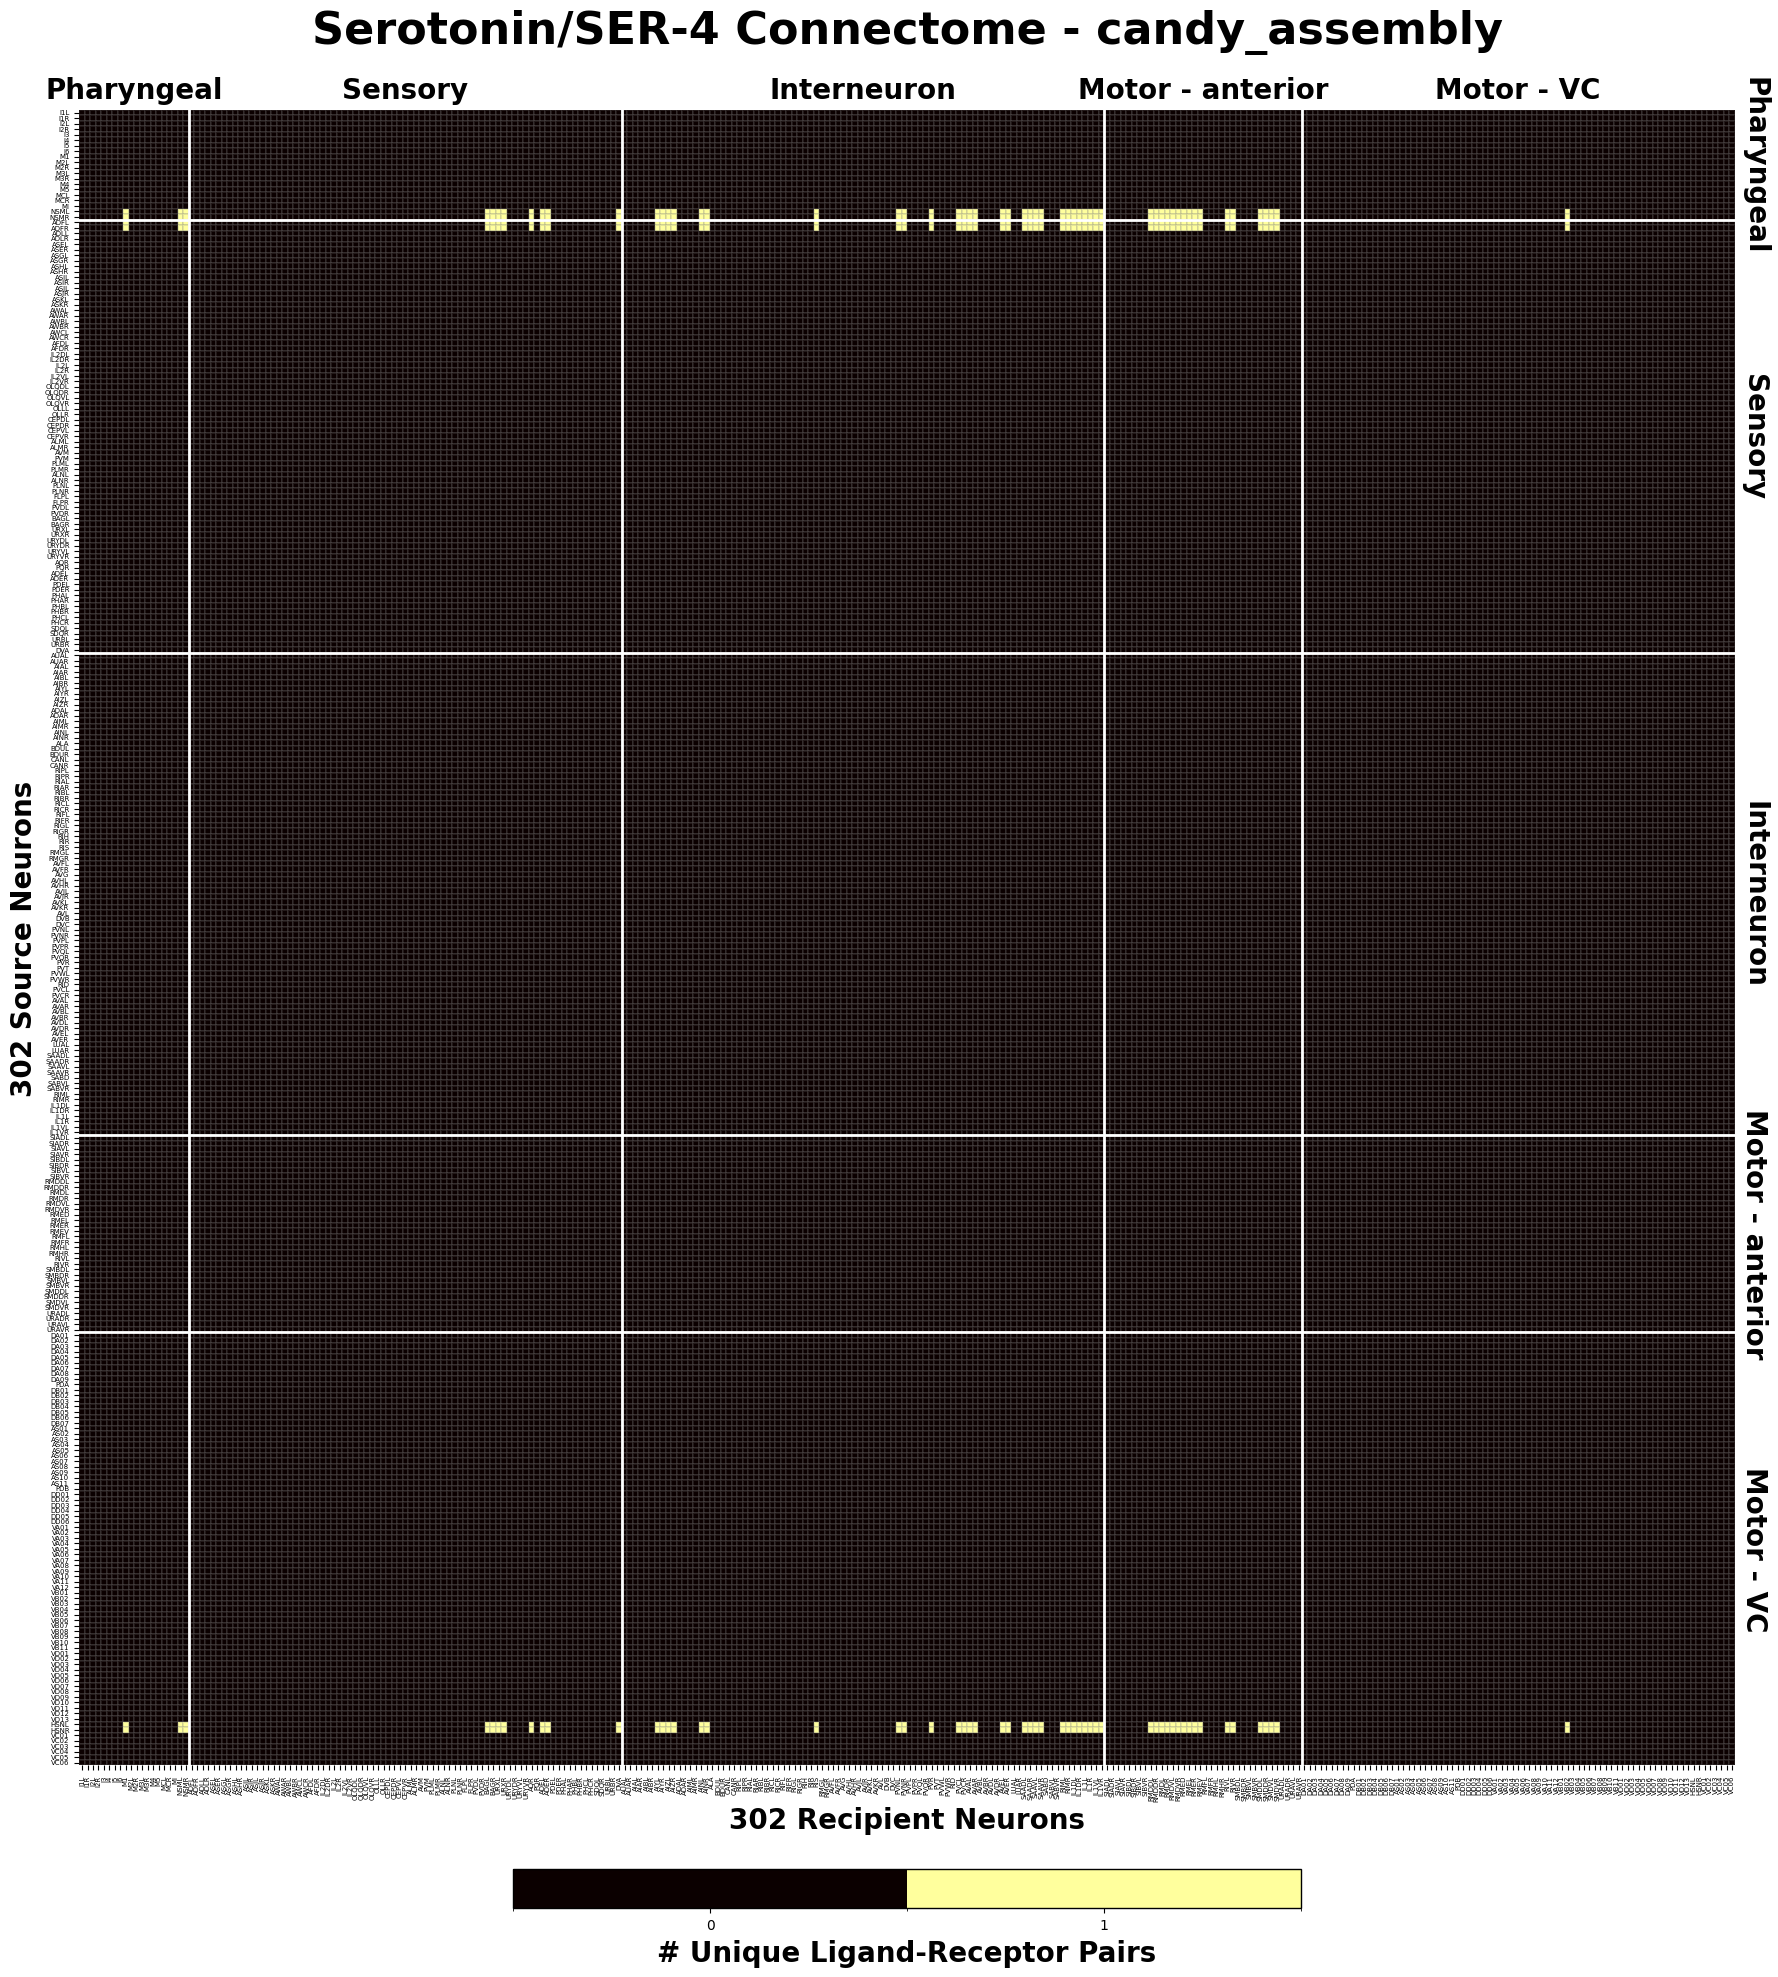

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_ser-4.csv


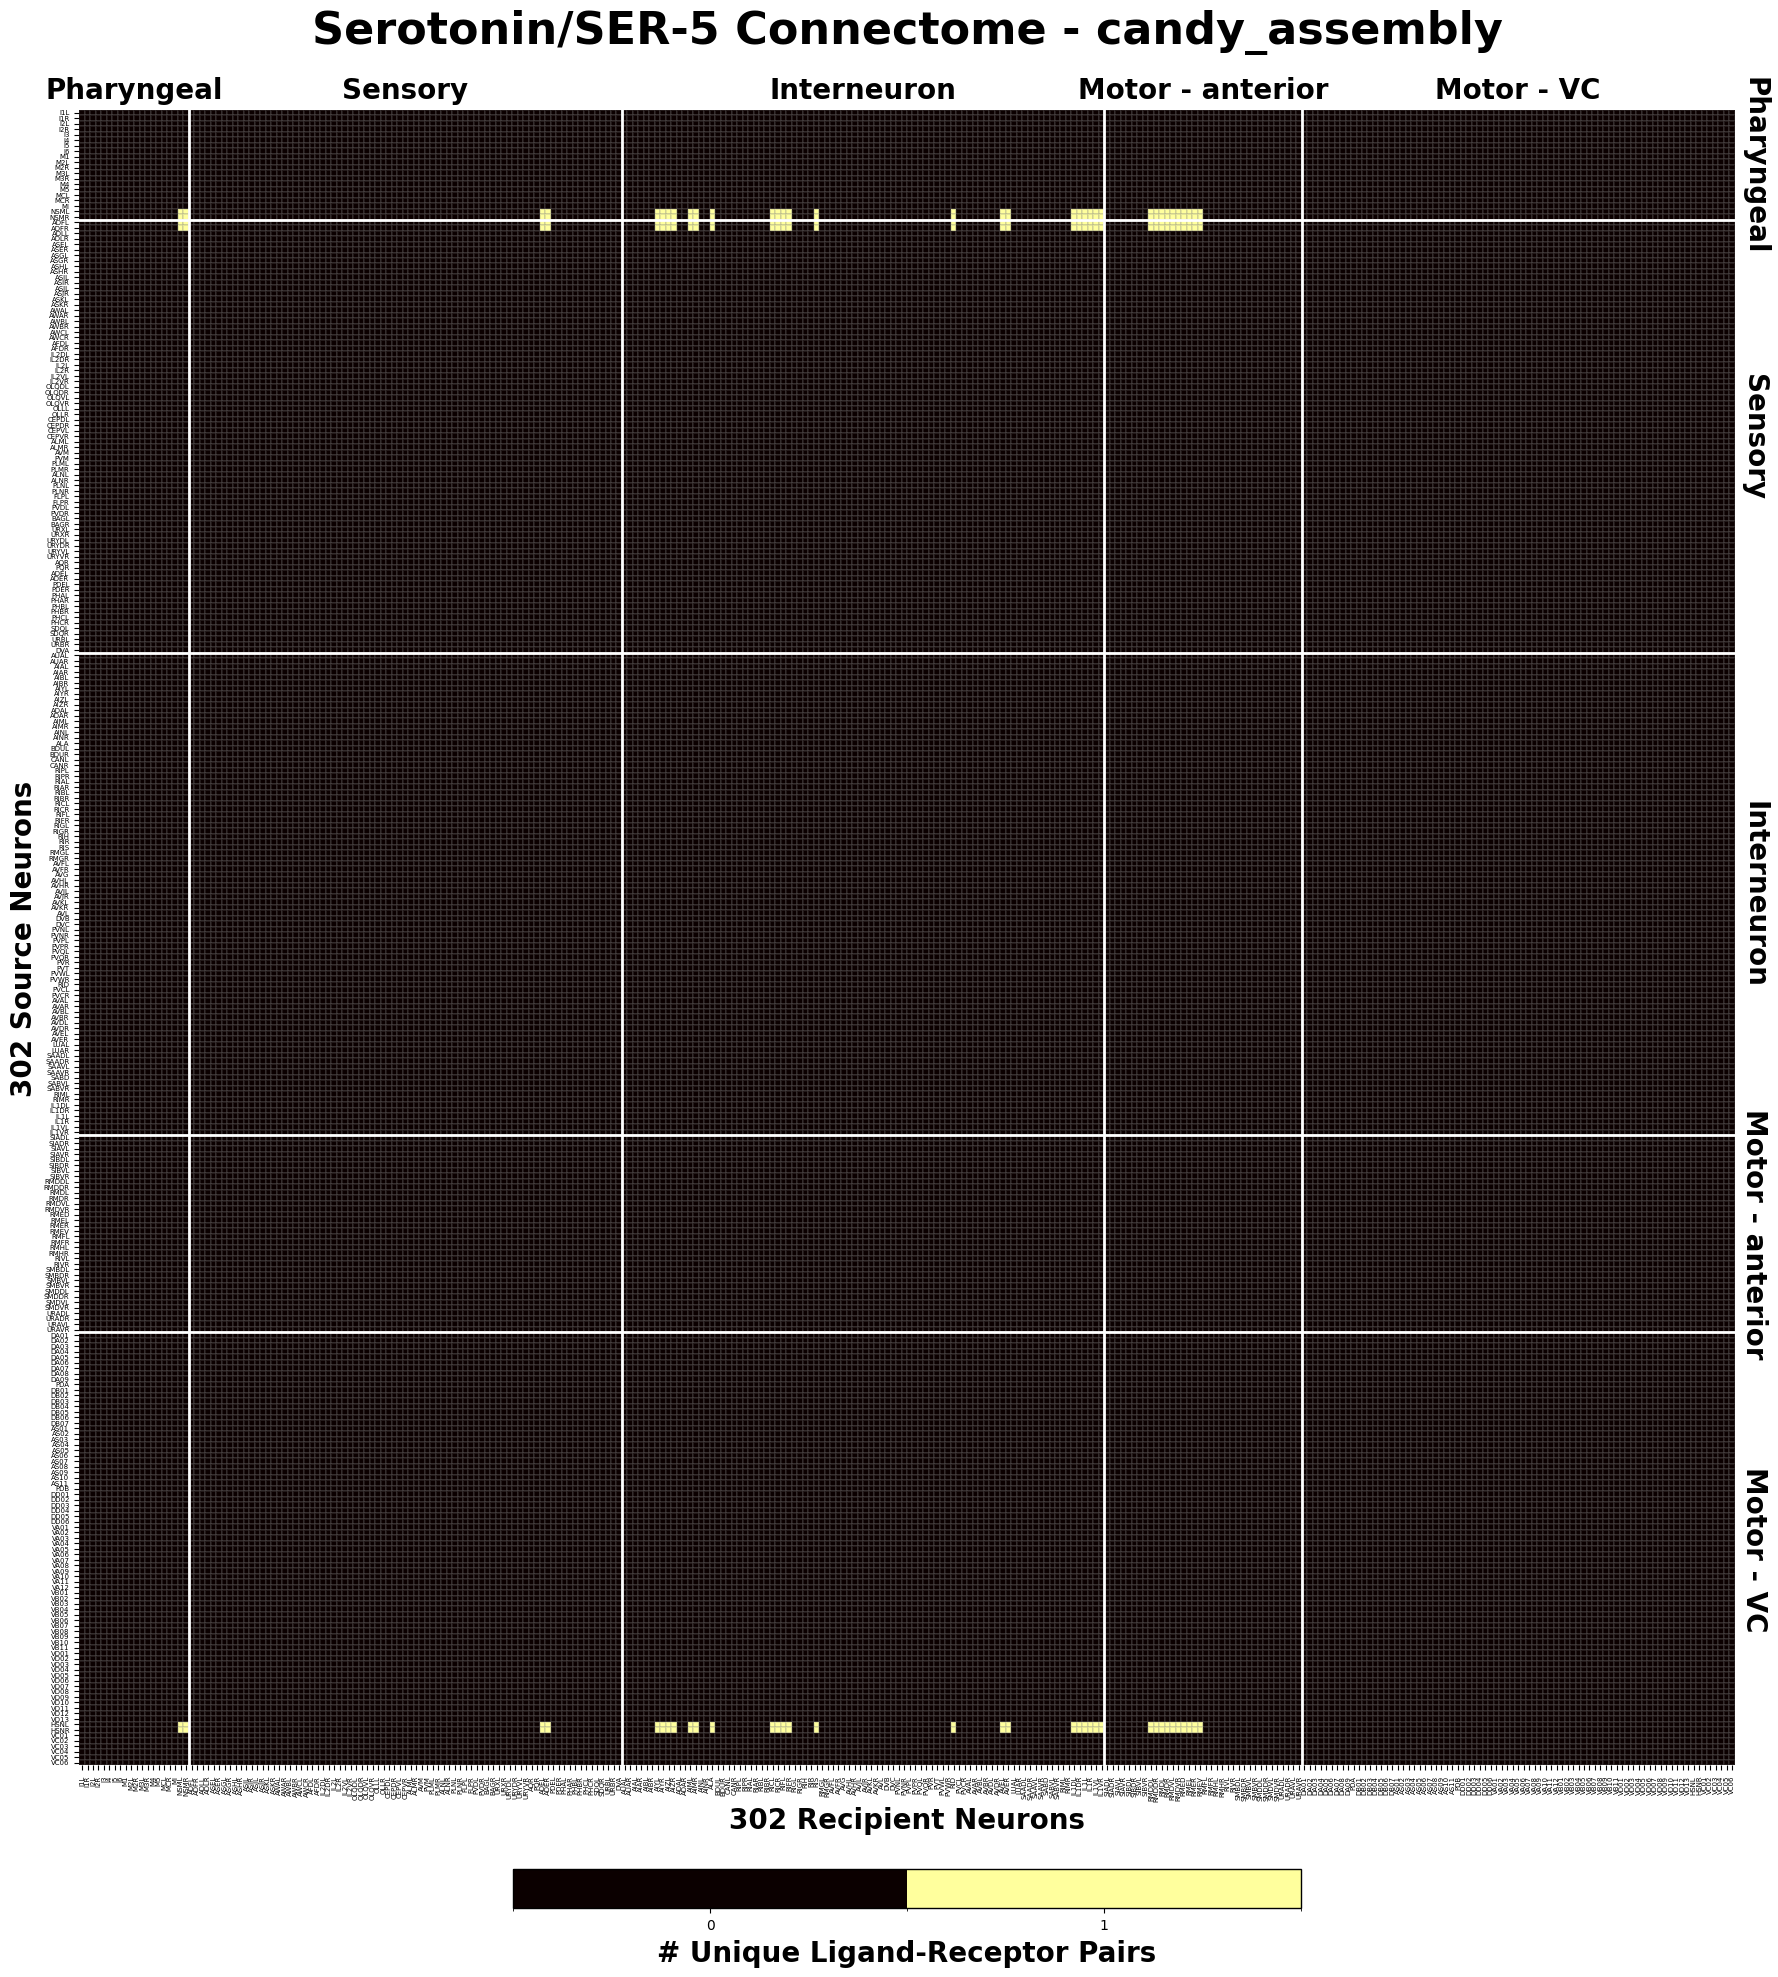

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_ser-5.csv


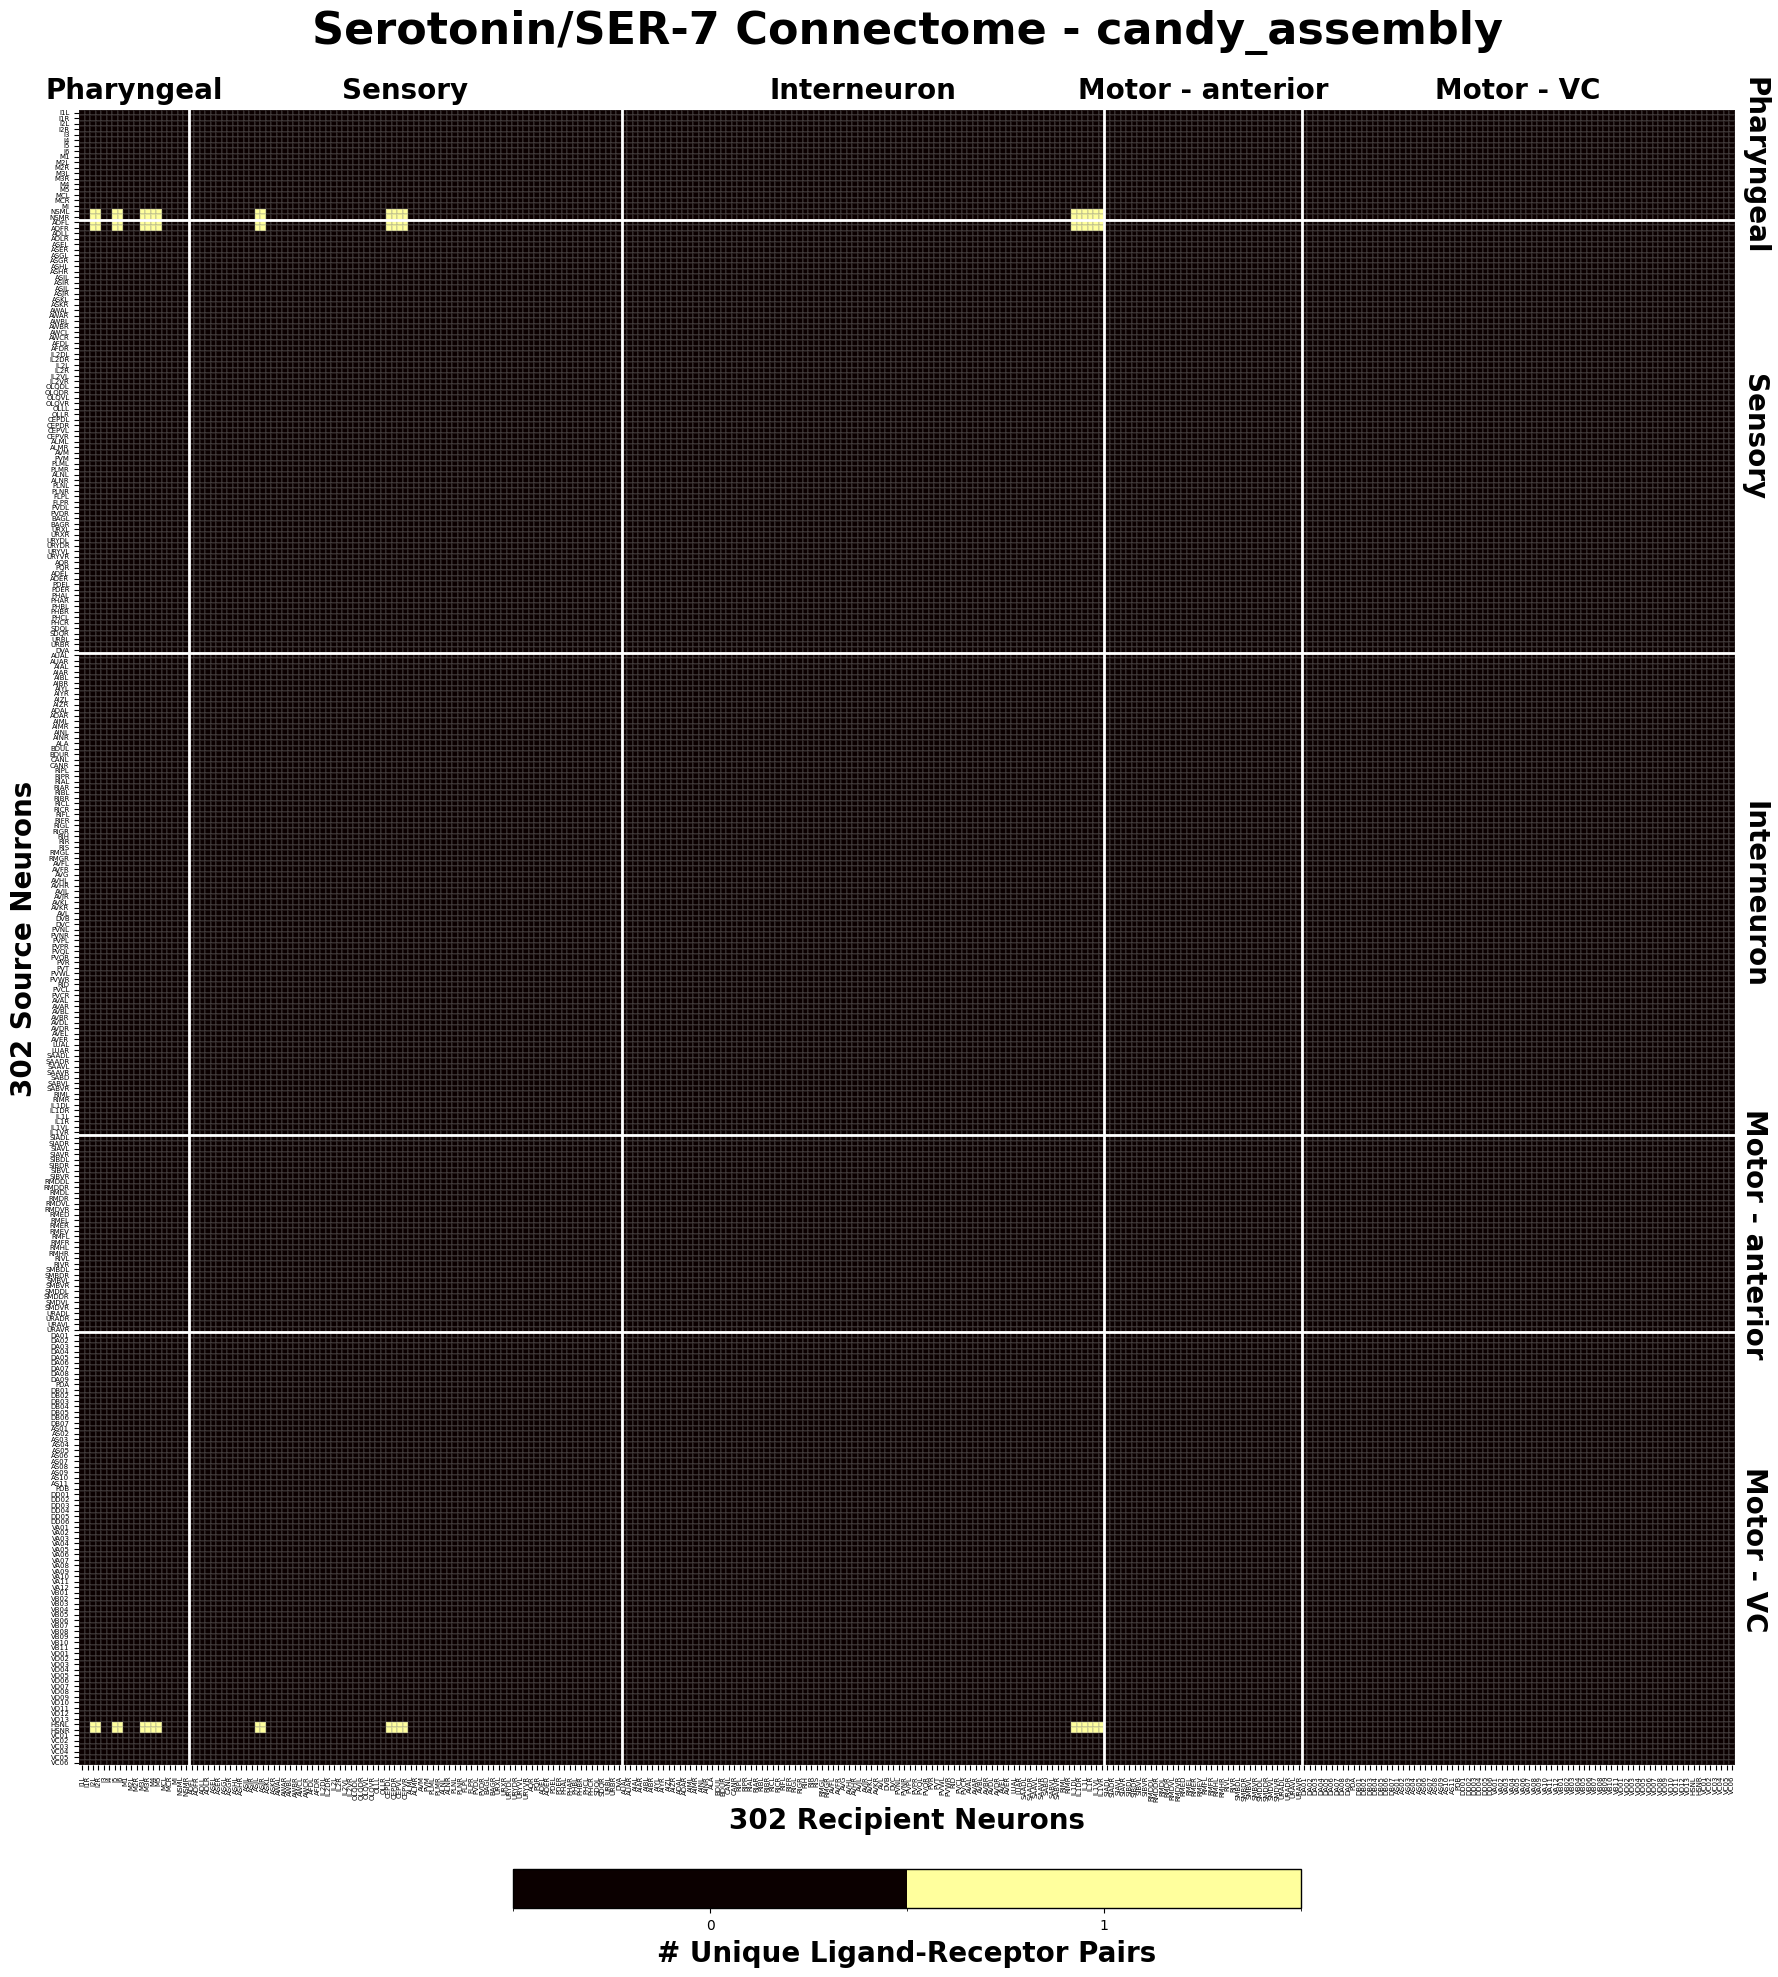

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/serotonin_01_ser-7.csv


In [2]:
# Example 2: Serotonin connectome

molecule = 'serotonin'
release_markers = ['synthesis']                              # tph-1 marker for serotonin
release_sources = ['literature:Bentley2016']
release_gate = 'and'                                         # if there is only one data source, the gate does not matter
receptor_sources = ['reporter:Dag2023']
receptor_gate = 'or'                                         # if there is only one data source, the gate does not matter

fname = f'{molecule}_01'                                     # for file saving
title = f'{username}_assembly - {fname}'                     # for visualization

# Assemble based on your choice of sources
conn = pu.assemble_nt_connectome(
    molecule,
    release_markers=release_markers,
    release_sources=release_sources,
    receptor_sources=receptor_sources
)

release_neurons = conn['binary'].index[conn['binary'].sum(axis=1) > 0].tolist()
print(f"Release sites: {release_neurons}")

# Save metadata of this assembly to JSON
metadata = {
    'created': datetime.now().isoformat(),
    'molecule': molecule,
    'release_markers': release_markers,
    'release_sources': release_sources,
    'release_gate': release_gate,
    'receptor_sources': receptor_sources,
    'receptor_gate': receptor_gate
}

path_metadata = f'../connectomes/{username}_assembly/{fname}_metadata.json'
with open(path_metadata, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Saved metadata to {path_metadata}")

# Binary and Count Format
for format in ['binary', 'count']:
    std_df = pu.standardize_dataframe(conn[format], pu.AllHermNeurons)

    if format == 'binary':
        colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'
    else:
        colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{format}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{format}.csv'
    std_df.to_csv(savepath)
    print(f"Saved custom connectome to {savepath}")

# Per receptor
for receptor, connection in conn['per_pair'].items():
    std_df = pu.standardize_dataframe(connection, pu.AllHermNeurons)
    title = f'{molecule.capitalize()}/{receptor.upper()} Connectome - {username}_assembly'
    colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{receptor}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{receptor}.csv'
    std_df.to_csv(savepath)
    print(f"Saved each ligand-receptor pair of custom connectome to {savepath}")

## 2. Neuropeptide (NPP) Connectome Assembly

### Available Data Sources

**Release sources**:
- `literature:Bentley2016` - 31 neuropeptides
- `sequencing:RipollSanchez2023` - 108 neuropeptides

**Receptor sources**:
- `literature:Bentley2016` - 13 GPCRs
- `sequencing:RipollSanchez2023` - 138 GPCRs

**Pairing info sources**:
- `Altun2013` - 42 pairs
- `Bentley2016` - 22 pairs
- `RipollSanchez2023` - 92 pairs

Release sites: ['AVKL', 'AVKR']
Saved metadata to ../connectomes/candy_assembly/flp-1_01_metadata.json


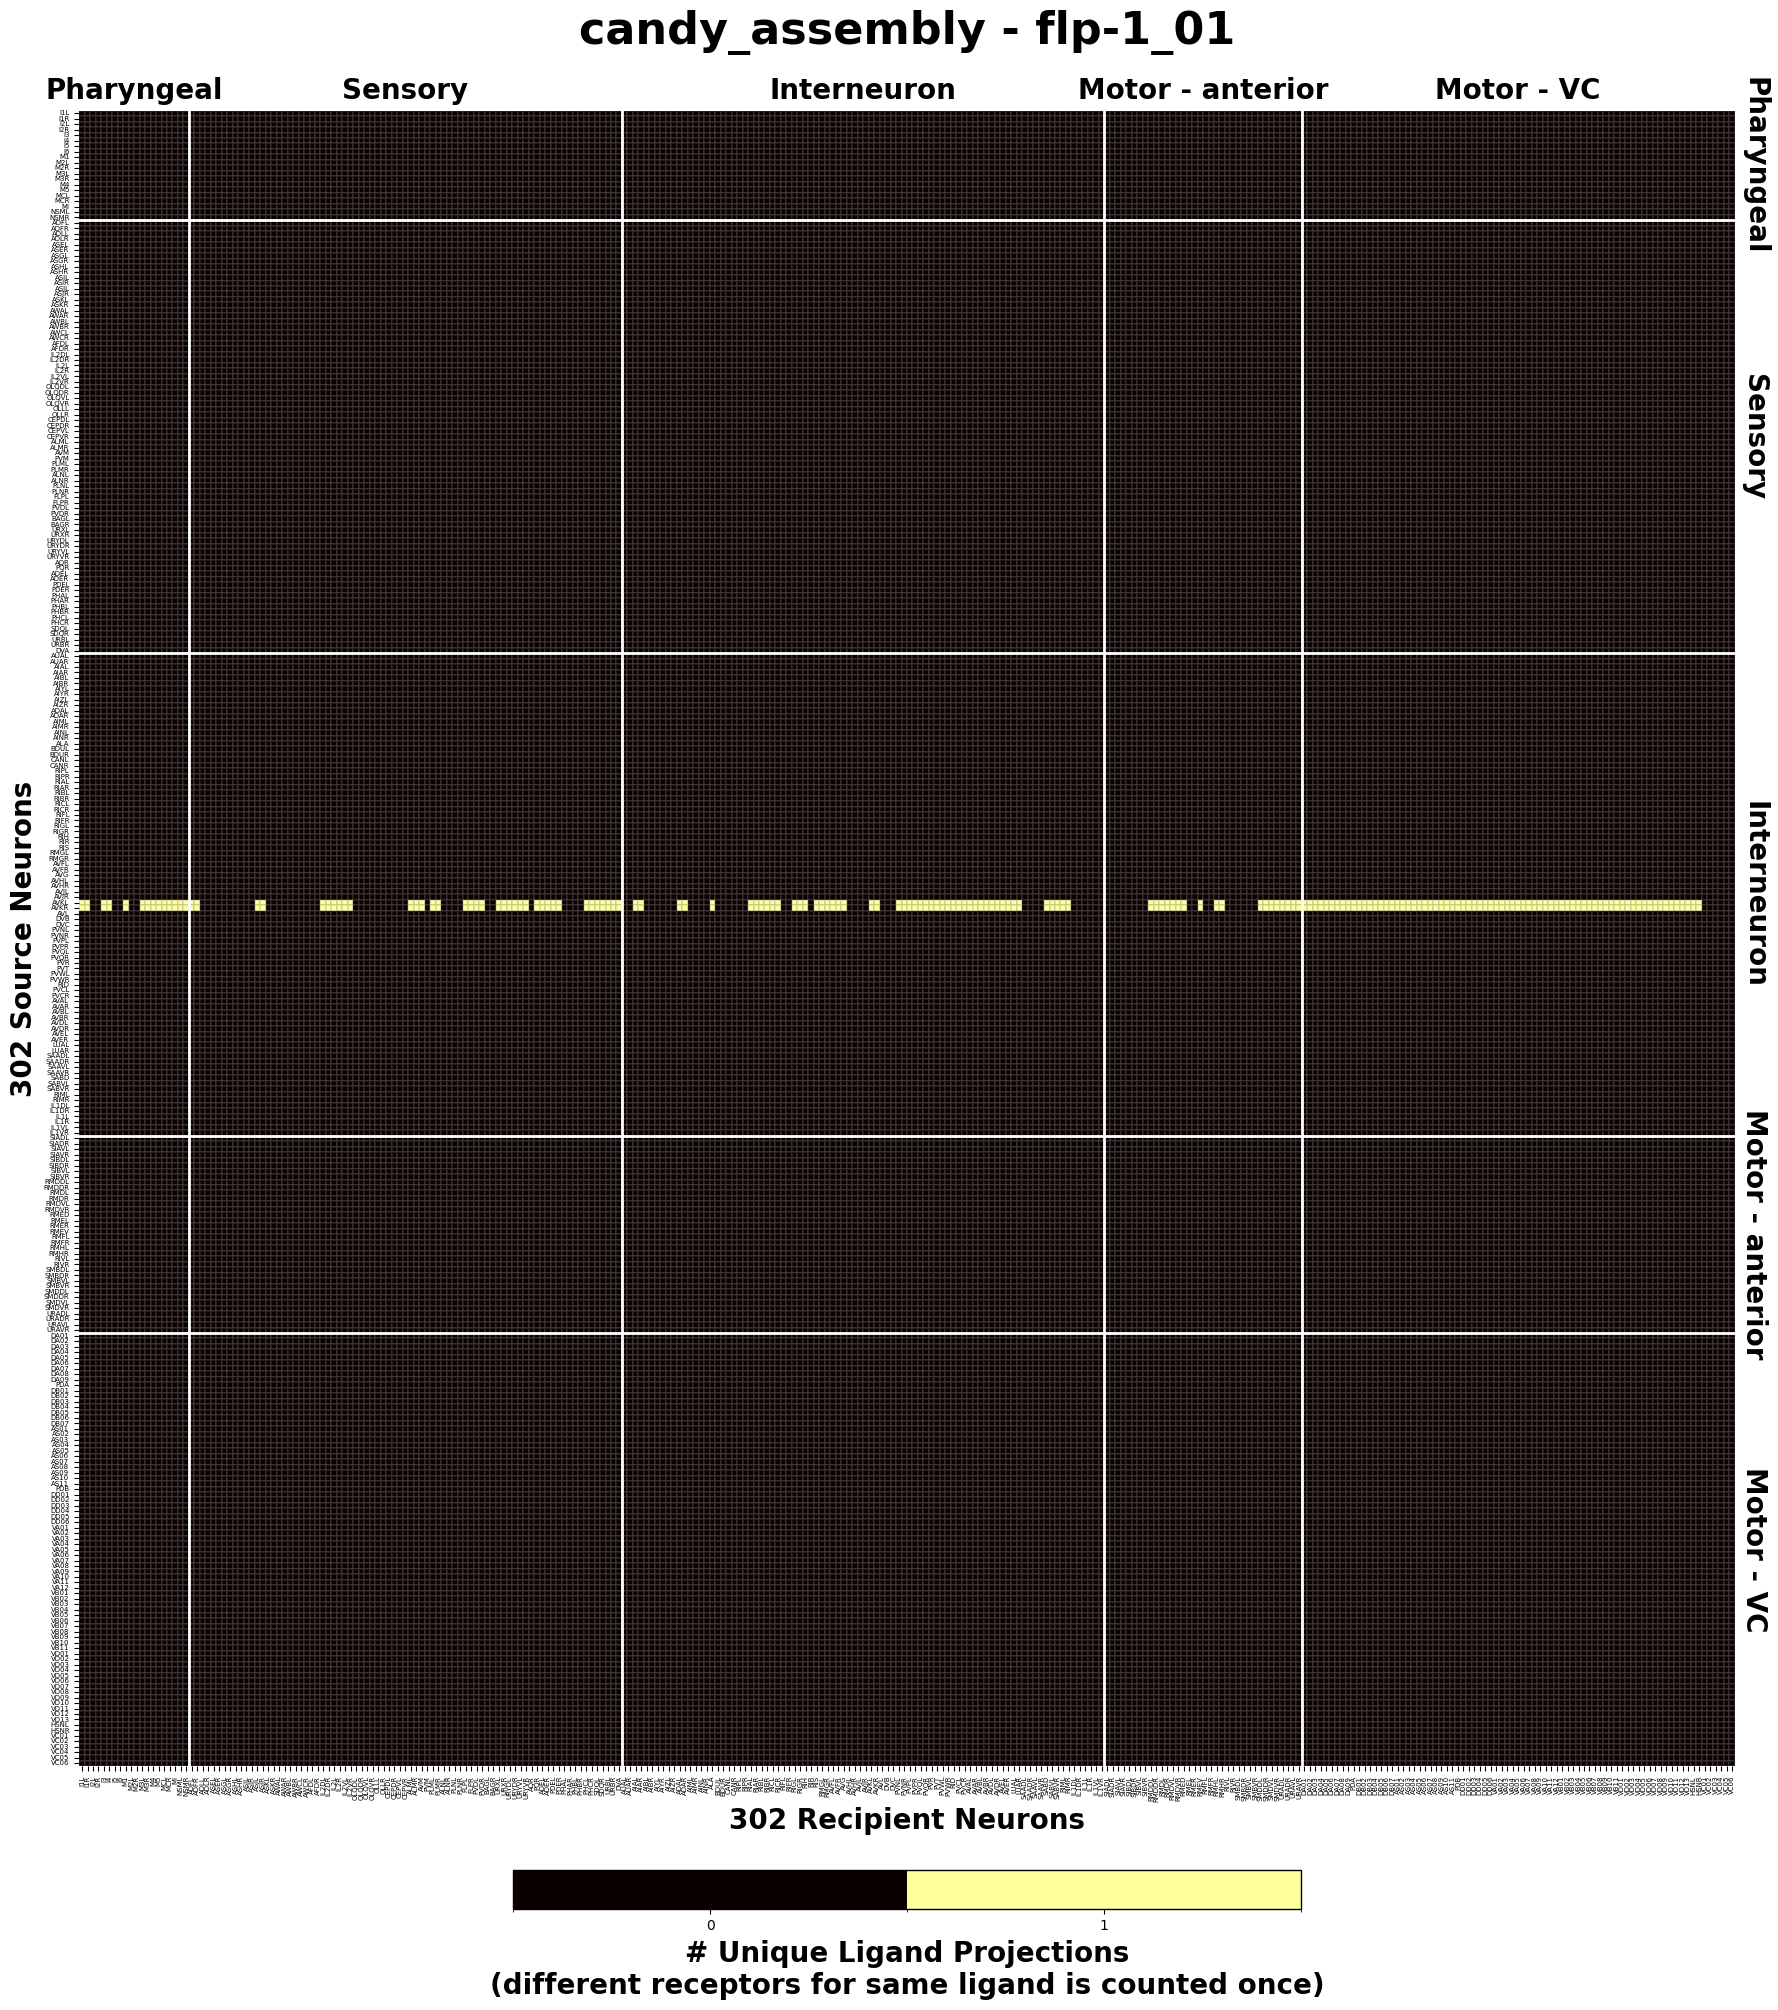

Saved custom connectome to ../connectomes/candy_assembly/flp-1_01_binary.csv


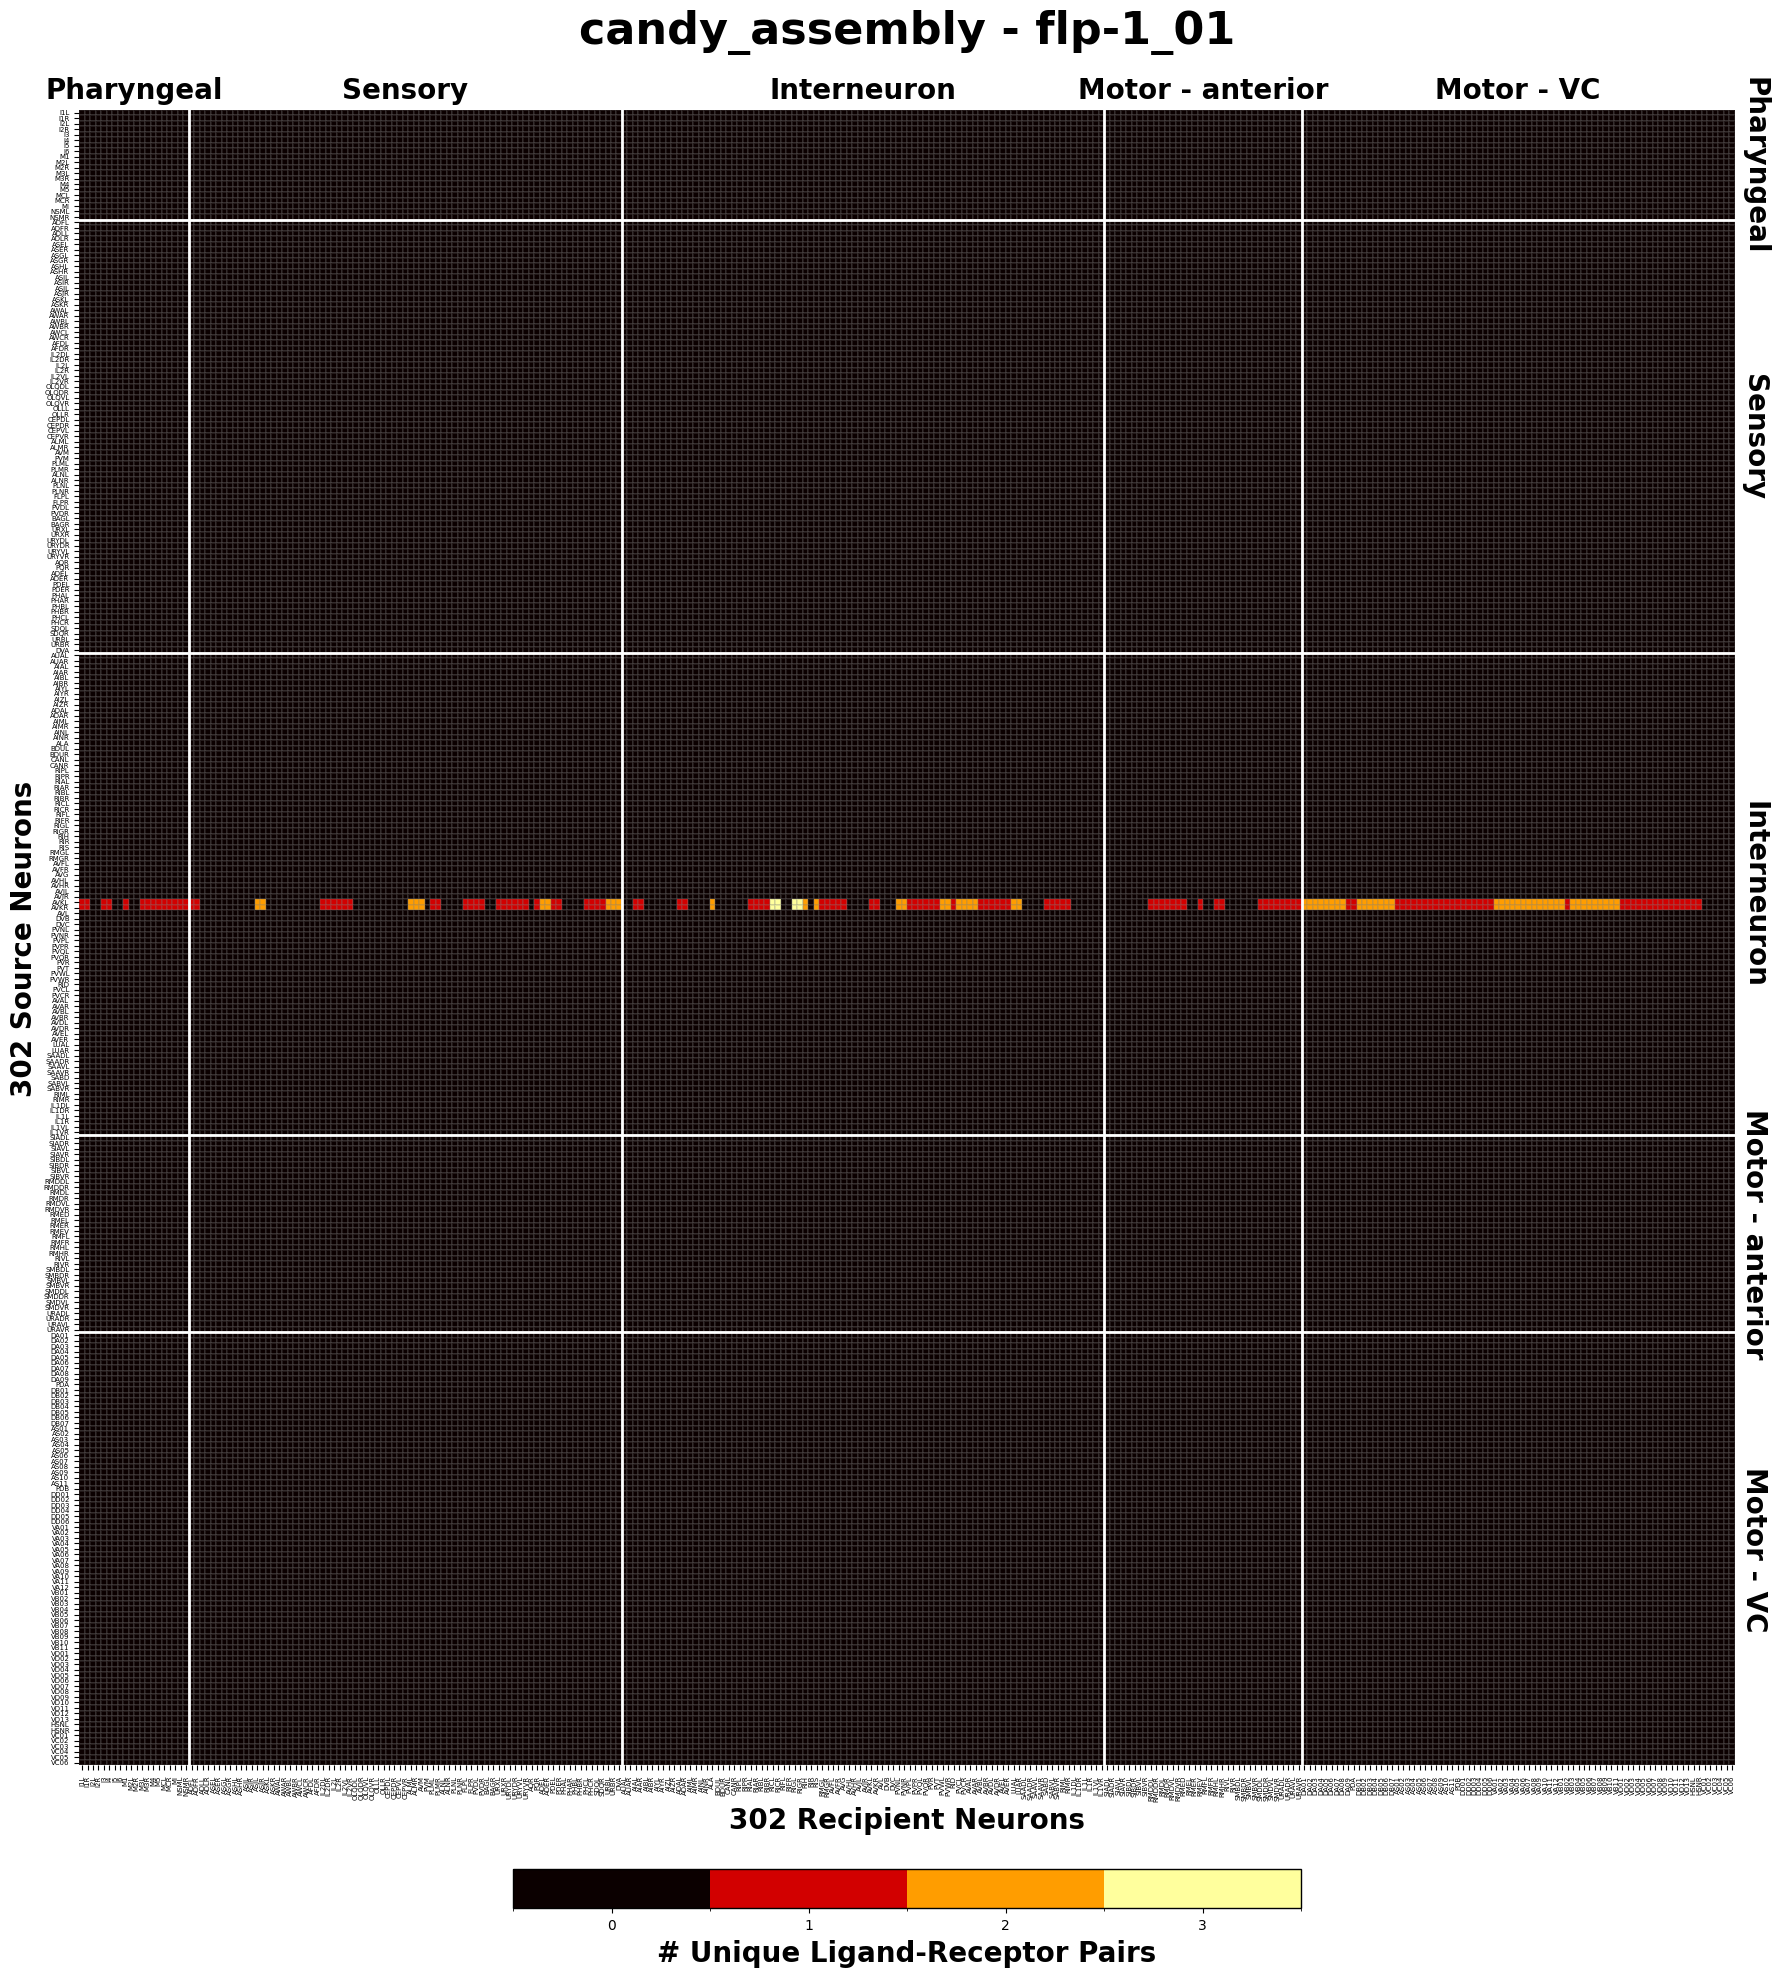

Saved custom connectome to ../connectomes/candy_assembly/flp-1_01_count.csv


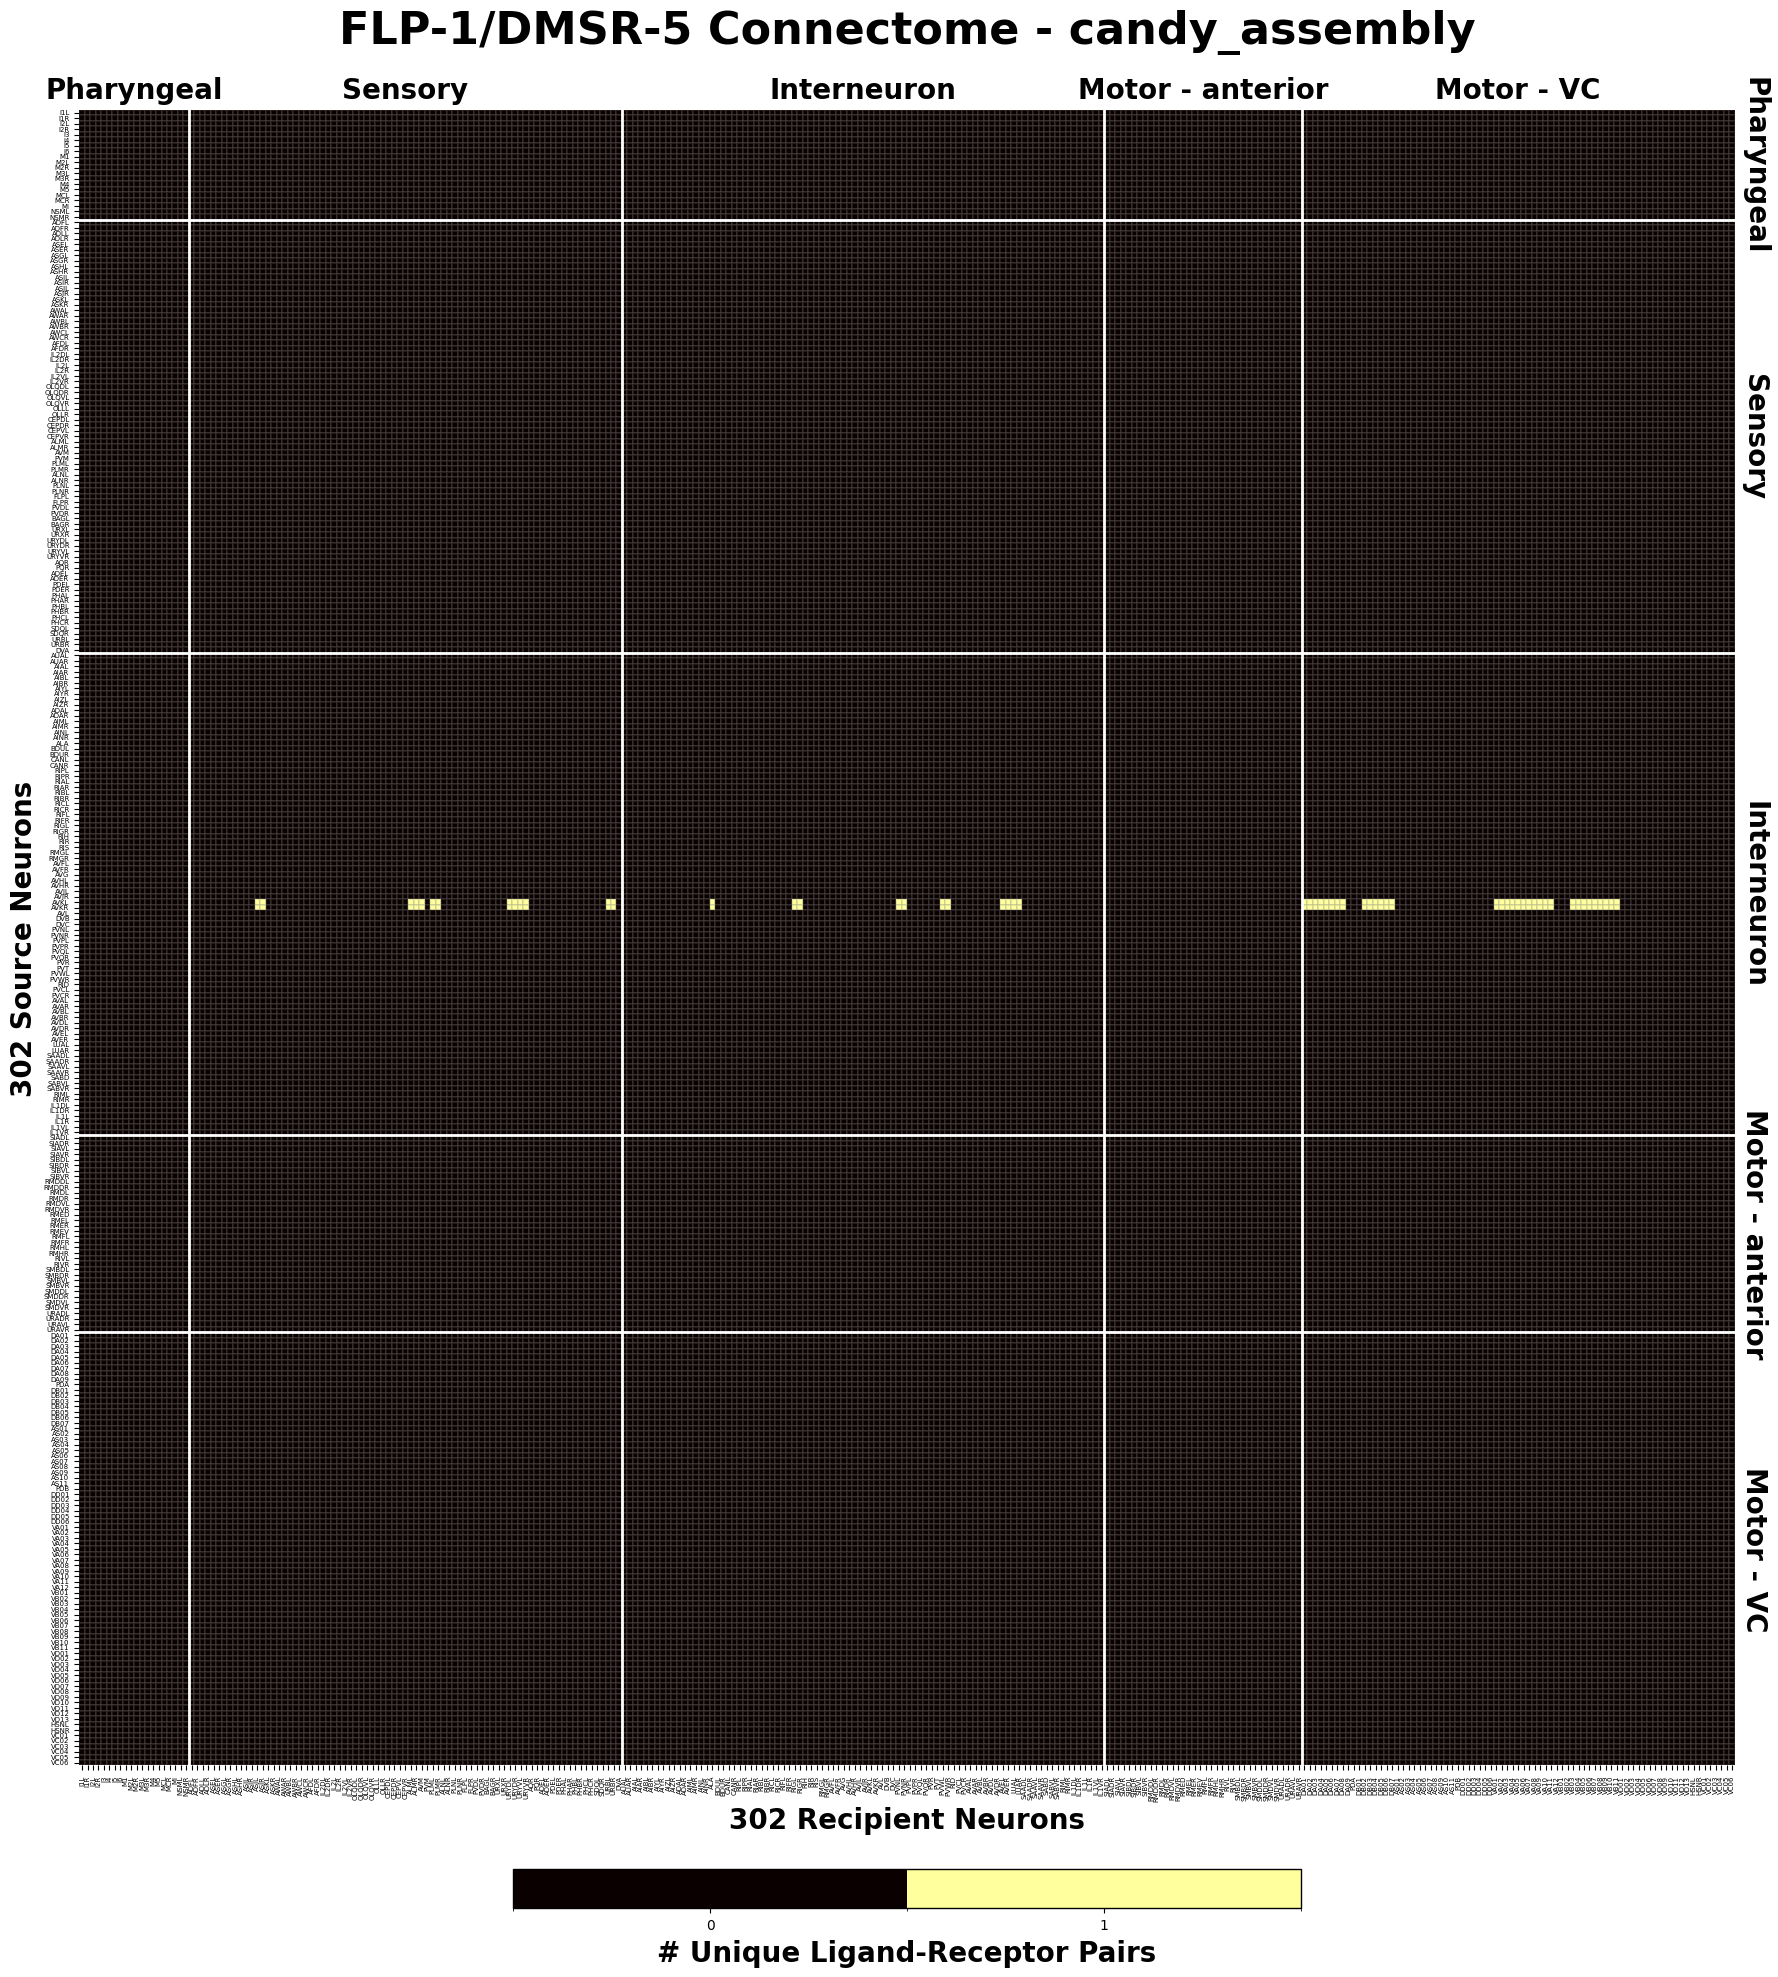

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/flp-1_01_dmsr-5.csv


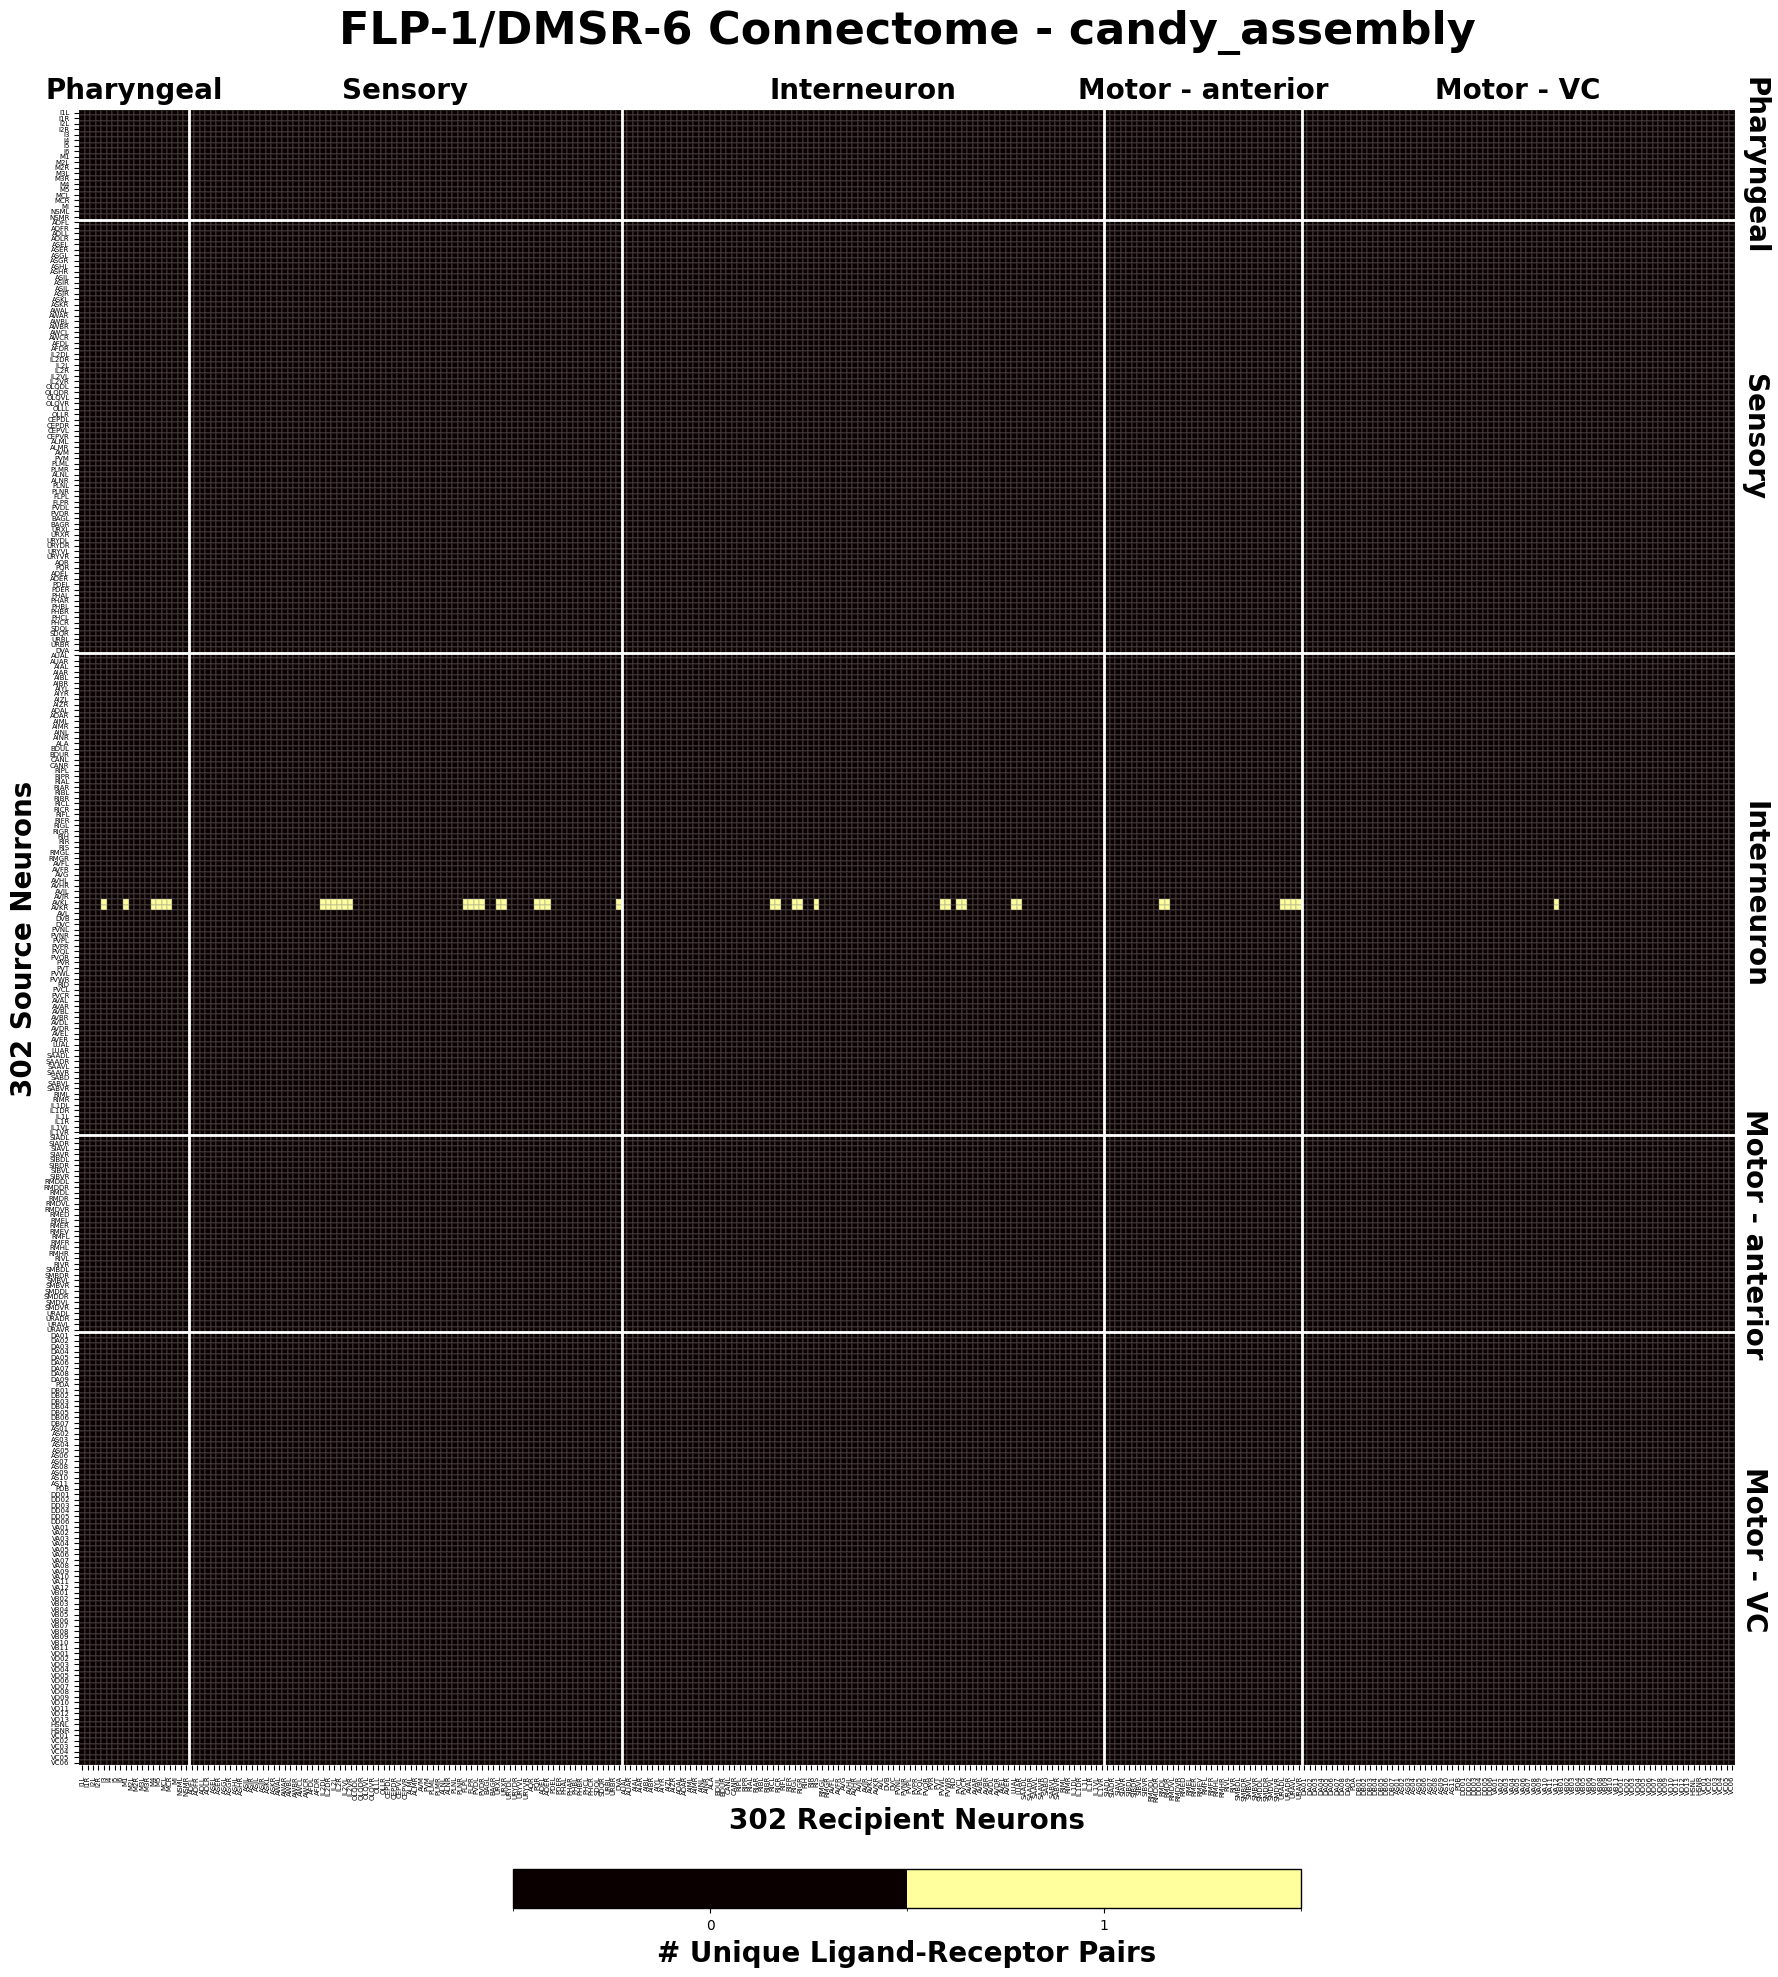

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/flp-1_01_dmsr-6.csv


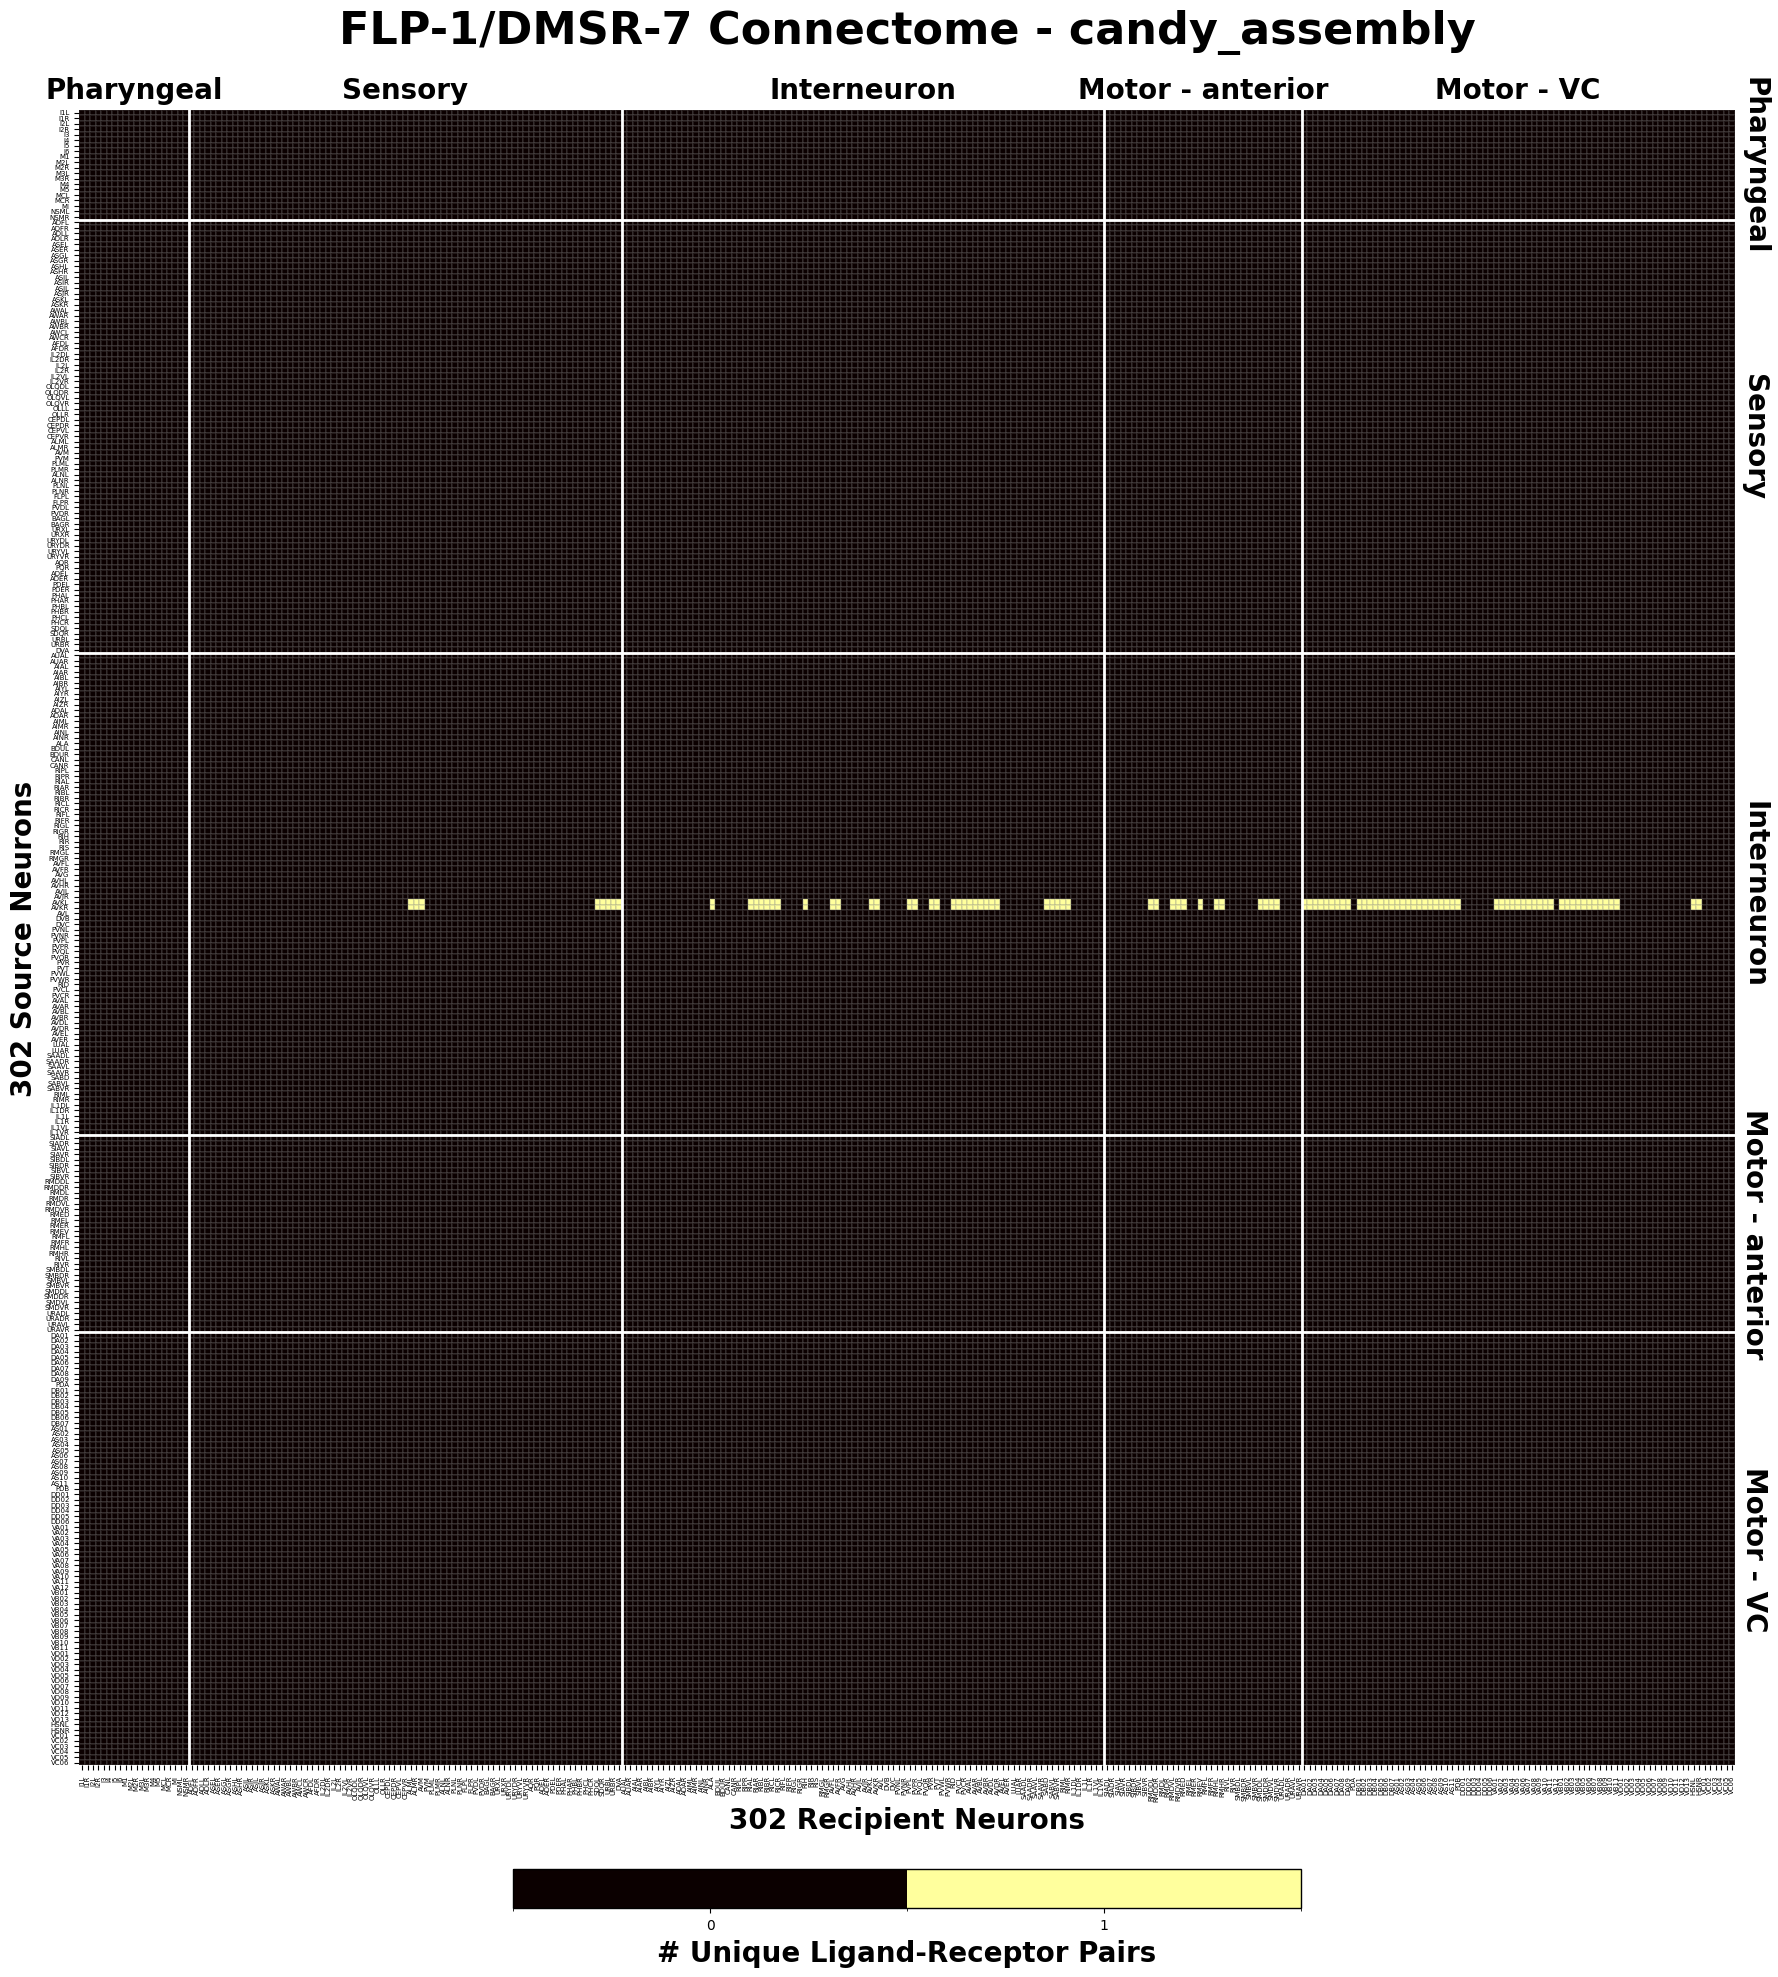

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/flp-1_01_dmsr-7.csv


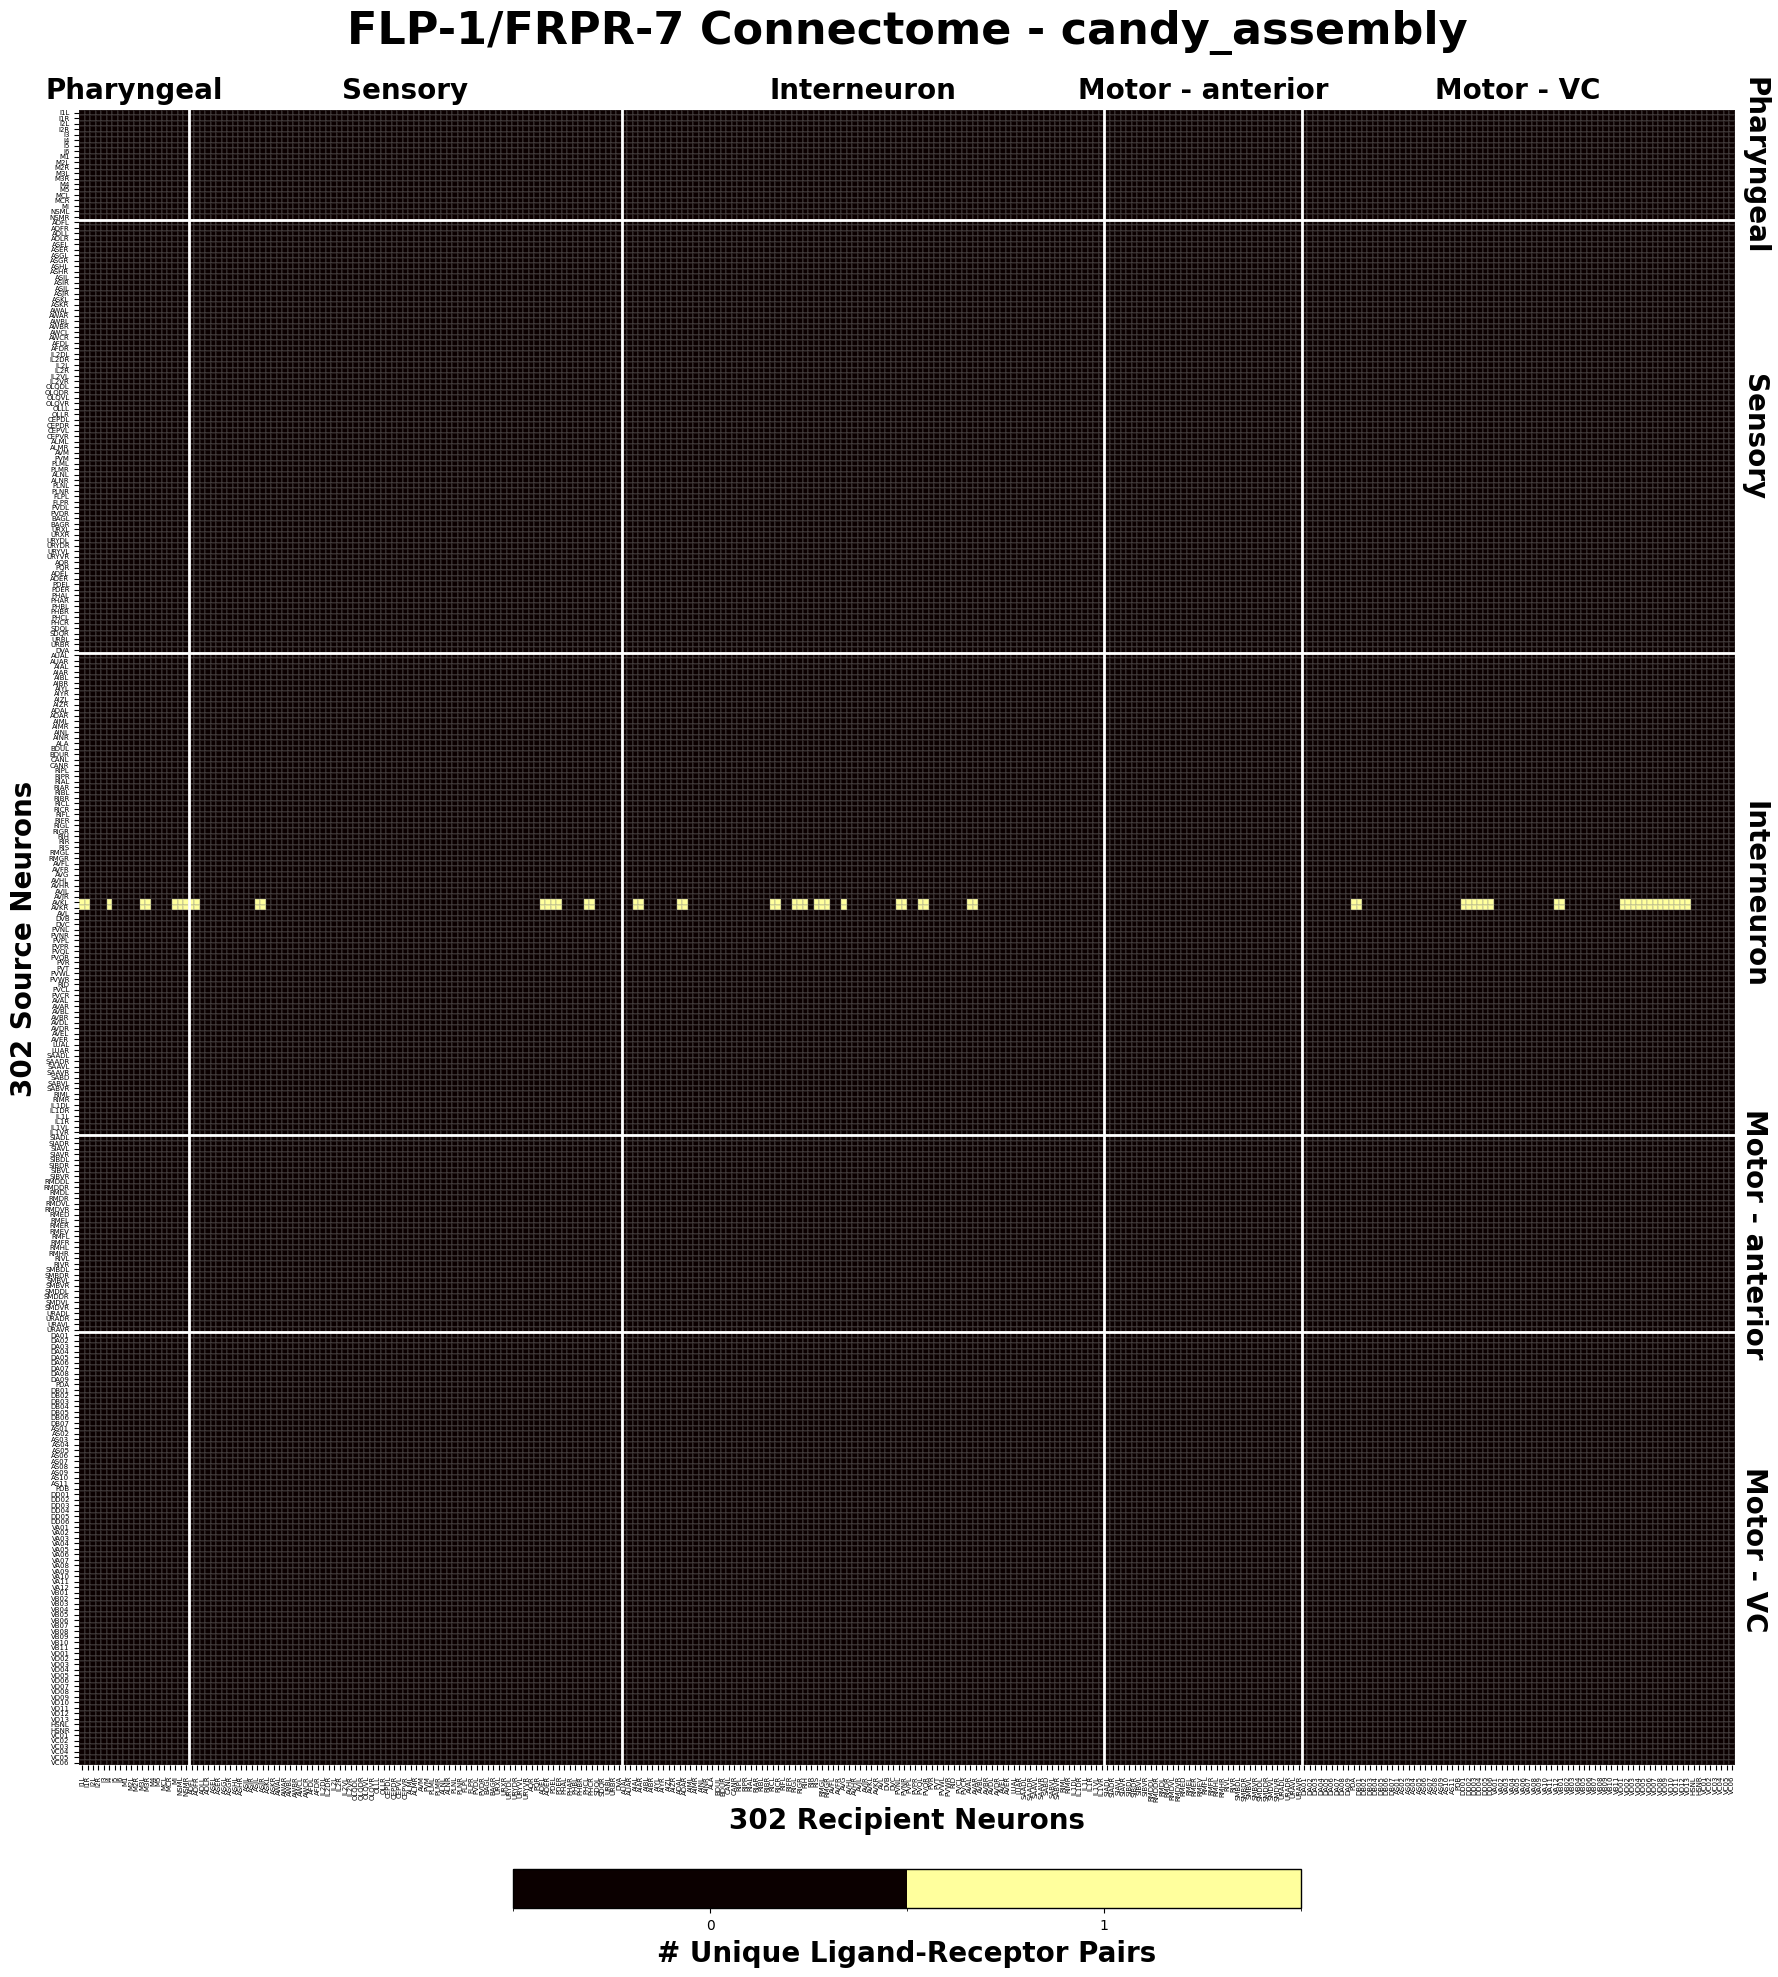

Saved each ligand-receptor pair of custom connectome to ../connectomes/candy_assembly/flp-1_01_frpr-7.csv


In [2]:
# Example 3: Single neuropeptide connectome (FLP-1)

neuropeptide = 'flp-1'
release_sources = ['sequencing:RipollSanchez2023']
release_gate = 'or'
receptor_sources = ['sequencing:RipollSanchez2023']
receptor_gate = 'or'
pairing_source = 'RipollSanchez2023'

fname = f'{neuropeptide}_01'
title = f'{username}_assembly - {fname}'

# Assemble based on your choice of sources
conn = pu.assemble_npp_connectome(
    neuropeptide,
    release_sources=release_sources,
    release_gate=release_gate,
    receptor_sources=receptor_sources,
    receptor_gate=receptor_gate,
    pairing_source=pairing_source
)

release_neurons = conn['binary'].index[conn['binary'].sum(axis=1) > 0].tolist()
print(f"Release sites: {release_neurons}")

# Save metadata of this assembly to JSON
metadata = {
    'created': datetime.now().isoformat(),
    'neuropeptide': neuropeptide,
    'release_sources': release_sources,
    'release_gate': release_gate,
    'receptor_sources': receptor_sources,
    'receptor_gate': receptor_gate,
    'pairing_source': pairing_source
}

path_metadata = f'../connectomes/{username}_assembly/{fname}_metadata.json'
with open(path_metadata, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Saved metadata to {path_metadata}")

# Binary and Count Format
for format in ['binary', 'count']:
    std_df = pu.standardize_dataframe(conn[format], pu.AllHermNeurons)

    if format == 'binary':
        colorbar_label = '# Unique Ligand Projections\n(different receptors for same ligand is counted once)'
    else:
        colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{format}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{format}.csv'
    std_df.to_csv(savepath)
    print(f"Saved custom connectome to {savepath}")

# Per receptor
for receptor, connection in conn['per_pair'].items():
    std_df = pu.standardize_dataframe(connection, pu.AllHermNeurons)
    title = f'{neuropeptide.upper()}/{receptor.upper()} Connectome - {username}_assembly'
    colorbar_label = '# Unique Ligand-Receptor Pairs'

    std_fig = pu.plot_connectome_matrix(std_df, title=title, colorbar_label=colorbar_label)
    std_fig.savefig(f'../connectomes/{username}_assembly/{fname}_{receptor}.png', dpi=600, bbox_inches='tight')
    savepath = f'../connectomes/{username}_assembly/{fname}_{receptor}.csv'
    std_df.to_csv(savepath)
    print(f"Saved each ligand-receptor pair of custom connectome to {savepath}")

## 3. Lower-Level Functions

Use `get_release_vector` and `get_receptor_matrix` to inspect intermediate data before assembly.

In [3]:
# Example 4: Inspect release vector and receptor matrix separately

# Get dopamine release vector (which neurons release dopamine)
dop_release = pu.get_release_vector(
    'dopamine',
    markers=['synthesis'],  # cat-2 marker
    sources=['literature:Bentley2016']
)
print("Dopamine-releasing neurons:")
print(dop_release[dop_release == 1].index.tolist())

# Get dopamine receptor matrix (which neurons express which receptors)
dop_receptors = pu.get_receptor_matrix(
    'dopamine',
    sources=['reporter:Muralidhara2025']
)
print(f"\nReceptor matrix shape: {dop_receptors.shape}")
print(f"Receptors: {dop_receptors.columns.tolist()}")
print(f"Neurons expressing dop-1: {int((dop_receptors['dop-1'] == 1).sum())}")

Dopamine-releasing neurons:
['CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'ADEL', 'ADER', 'PDEL', 'PDER']

Receptor matrix shape: (302, 4)
Receptors: ['dop-1', 'dop-2', 'dop-3', 'dop-4']
Neurons expressing dop-1: 72


## 4. Compare two connectomes

Given the path to csv of 2 connectomes that follow the same format, compare their dimensions and connections

In [ ]:
result = pu.compare_connectomes(                                                                                                                                       
      '../connectomes/preassembled/FLP-1_DMSR-7_RipollSanchez2023_longRange.csv',       # preassembled by RipollSanchez2023                                                                                                                                 
      '../connectomes/candy_assembly/flp-1_01_dmsr-7.csv',                              # custom assembly by candy                                                                                                          
      names=('preassembled', 'candy_assembly'),  # optional, defaults to filenames                                                                                                               
      threshold=0        # connections where value > threshold                                                                                                           
  )                                                                                                                                                                      
                                                                                                                                                                         
print(result['summary'])

                          Metric  Value
0               Neurons (common)  302.0
1    Connections in preassembled  204.0
2  Connections in candy_assembly  204.0
3              Overlap (in both)  204.0
4           Only in preassembled    0.0
5         Only in candy_assembly    0.0
6             Jaccard similarity    1.0
7            Pearson correlation    1.0


## 5. Aggregating Multiple Connectomes

Combine multiple single-molecule connectomes into an aggregate.

dopamine: 1480 connections
serotonin: 504 connections
tyramine: 208 connections
octopamine: 102 connections

Aggregate monoamine connectome: 2294 total connections


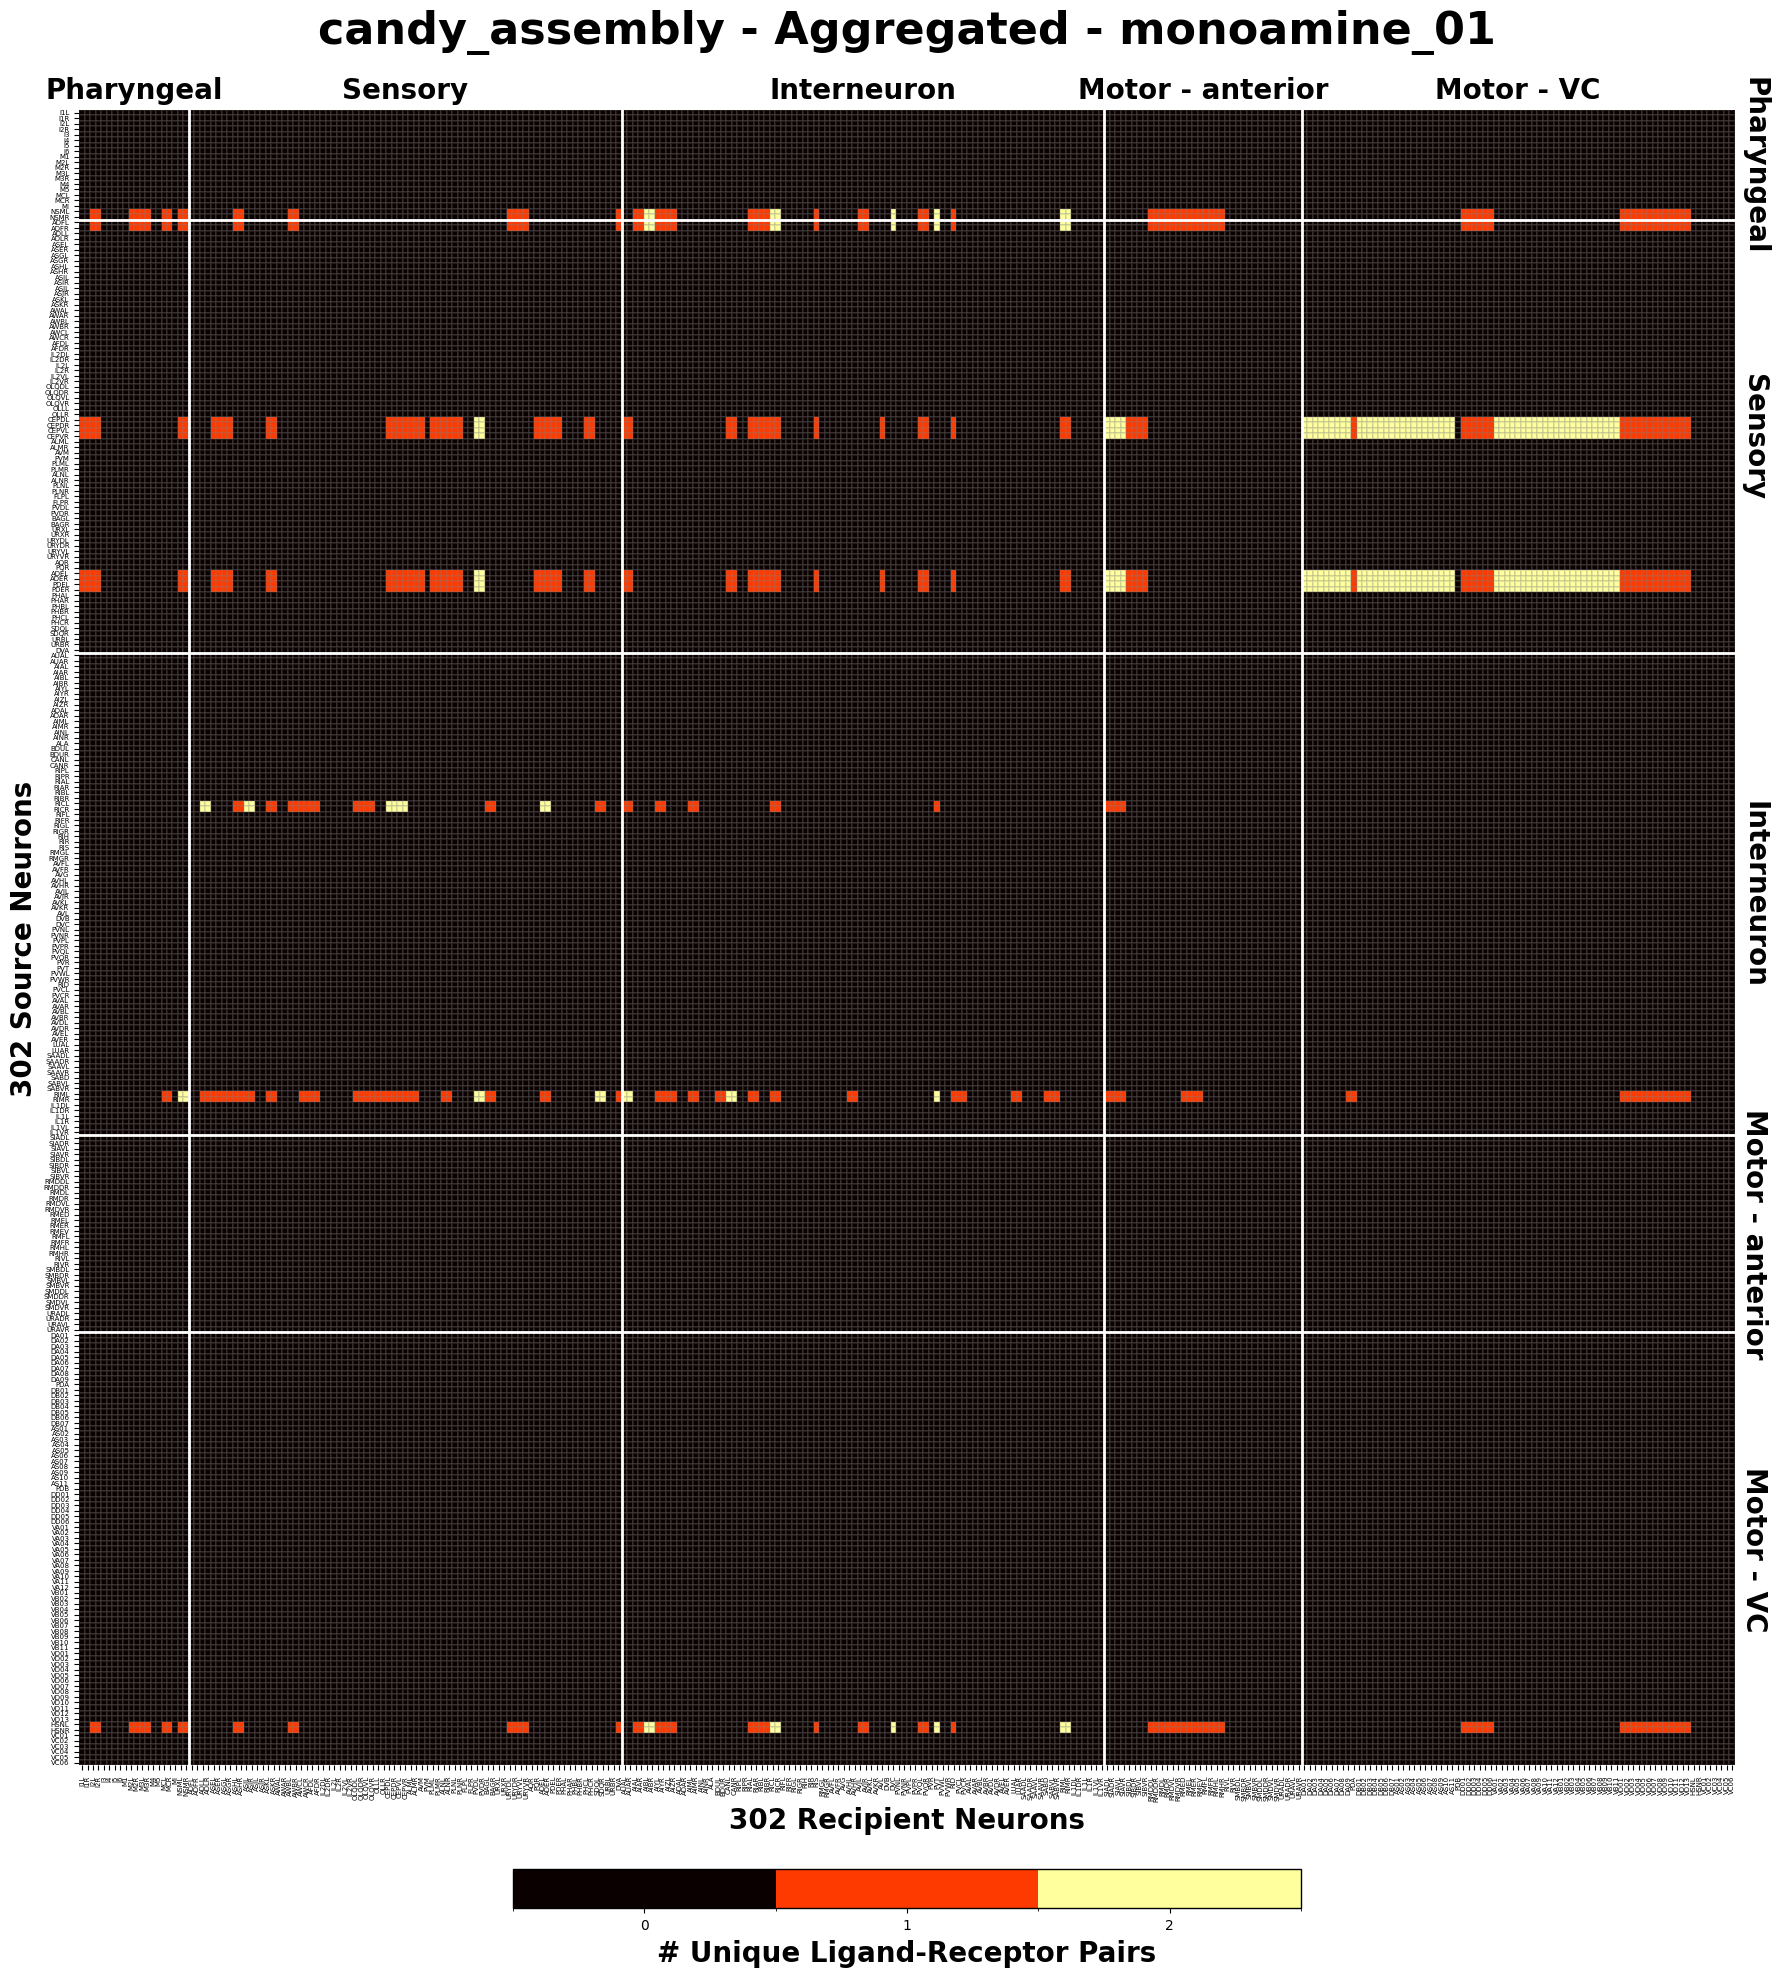

Saved metadata to ../connectomes/candy_assembly/monoamine_01_metadata.json
Saved aggregated monoamine connectome to ../connectomes/candy_assembly/monoamine_01_count.csv


In [5]:
# Example 5: Aggregate all monoamine connectomes

monoamines = ['dopamine', 'serotonin', 'tyramine', 'octopamine']
aggregate = pd.DataFrame(0.0, index=pu.AllHermNeurons, columns=pu.AllHermNeurons)
fname = 'monoamine_01'
title = f'{username}_assembly - Aggregated - {fname}'

for nt in monoamines:
    try:
        conn = pu.assemble_nt_connectome(
            nt,
            release_markers=['synthesis'],
            release_sources=['literature:Bentley2016'],
            receptor_sources=['literature:Bentley2016'],
        )
        aggregate = aggregate.add(conn['count'].fillna(0))
        print(f"{nt}: {int(conn['count'].sum().sum())} connections")
    except Exception as e:
        print(f"{nt}: skipped ({e})")

print(f"\nAggregate monoamine connectome: {int(aggregate.sum().sum())} total connections")

fig = pu.plot_connectome_matrix(aggregate, title=title)

# Save metadata for aggregated monoamine connectome
metadata = {
    'created': datetime.now().isoformat(),
    'molecules': monoamines,
    'release_markers': ['synthesis'],
    'release_sources': ['literature:Bentley2016'],
    'release_gate': 'and',
    'receptor_sources': ['literature:Bentley2016'],
    'receptor_gate': 'or',
    'format': 'count'
}

path_metadata = f'../connectomes/{username}_assembly/{fname}_metadata.json'
with open(path_metadata, 'w') as f:
    json.dump(metadata, f, indent=2)
print(f"Saved metadata to {path_metadata}")

# Save aggregated connectome to CSV
savepath = f'../connectomes/{username}_assembly/{fname}_count.csv'
aggregate.to_csv(savepath)
print(f"Saved aggregated monoamine connectome to {savepath}")